# P4 Segmentations Clients

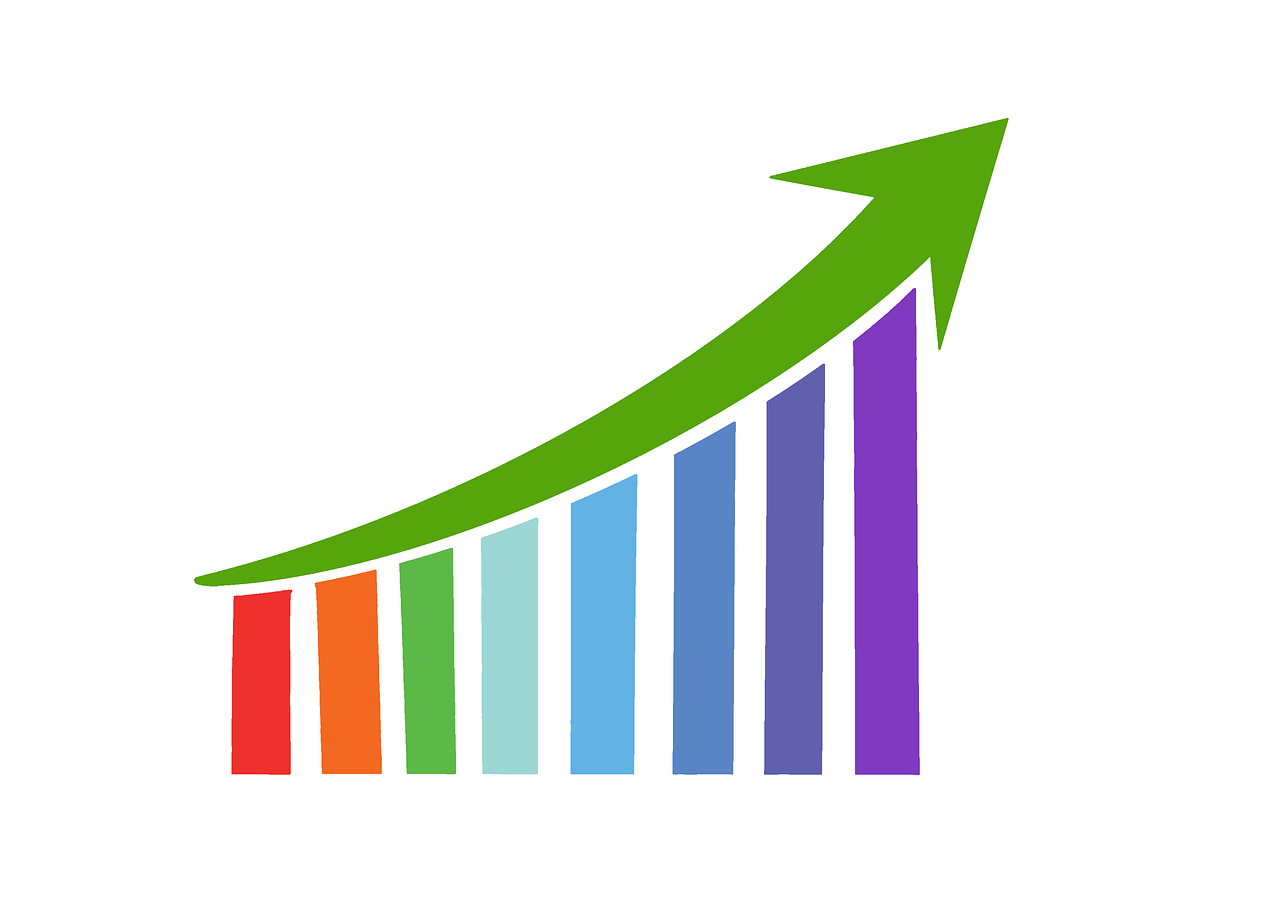

In [1]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [2]:
import chart_studio
import plotly
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---

## 📍 Import des données

---

In [3]:
customers_data = pd.read_csv("olist_customers_dataset.csv")
geolocation_data = pd.read_csv("olist_geolocation_dataset.csv")
order_items_data = pd.read_csv("olist_order_items_dataset.csv")
order_payments_data = pd.read_csv("olist_order_payments_dataset.csv")
order_reviews_data = pd.read_csv("olist_order_reviews_dataset.csv")
orders_data = pd.read_csv("olist_orders_dataset.csv")
products_data = pd.read_csv("olist_products_dataset.csv")
sellers_data = pd.read_csv("olist_sellers_dataset.csv")
prod_categ_name_trans = pd.read_csv("product_category_name_translation.csv")

---

# ⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐

---

# 💎 Découverte rapide des Dataframes avant fusion :

---

# ⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐

---

# 📌 TABLE 1 : customers_data

---

In [4]:
customers_data.shape

(99441, 5)

In [5]:
customers_data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

---

## Inspection des clés :

### 🌠 "customer_id" différents :

In [6]:
customers_data["customer_id"].nunique()

99441

### 🌠 "customer_unique_id" différents :

In [7]:
customers_data["customer_unique_id"].nunique()

96096

#### 📌 1 "customer_id" pour 1 "order_id"
#### 📌 1 "customer_unique_id" par client différent identifié

---

### 🌠 Découverte rapide des variables :

In [8]:
num_cols = customers_data.select_dtypes(include = ['int', 'float']).columns.tolist()
cat_cols = customers_data.select_dtypes(exclude = ['int', 'float']).columns.tolist()

In [9]:
print("\n\033[1;30m Signification des variables numériques : \033[0m \n")
for col in customers_data[num_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m', "---------", customers_data[col].dtype)
    
print("\n\033[1;30m Signification des variables numériques catégoriques : \033[0m \n")
for col in customers_data[cat_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m', "---------", customers_data[col].dtype)


 Signification des variables numériques :  

customer_zip_code_prefix : --------- int64

 Signification des variables numériques catégoriques :  

customer_id : --------- object
customer_unique_id : --------- object
customer_city : --------- object
customer_state : --------- object


### 🌠 Aperçu des variables catégoriques :

In [10]:
print("\n\033[1;30m Valeurs uniques de chaque variable : \033[0m \n")
for col in customers_data[cat_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m',"\n", (customers_data[col].unique()))
    print("\n")


 Valeurs uniques de chaque variable :  

customer_id : 
 ['06b8999e2fba1a1fbc88172c00ba8bc7' '18955e83d337fd6b2def6b18a428ac77'
 '4e7b3e00288586ebd08712fdd0374a03' ... '5e28dfe12db7fb50a4b2f691faecea5e'
 '56b18e2166679b8a959d72dd06da27f9' '274fa6071e5e17fe303b9748641082c8']


customer_unique_id : 
 ['861eff4711a542e4b93843c6dd7febb0' '290c77bc529b7ac935b93aa66c333dc3'
 '060e732b5b29e8181a18229c7b0b2b5e' ... 'e9f50caf99f032f0bf3c55141f019d99'
 '73c2643a0a458b49f58cea58833b192e' '84732c5050c01db9b23e19ba39899398']


customer_city : 
 ['franca' 'sao bernardo do campo' 'sao paulo' ... 'monte bonito'
 'sao rafael' 'eugenio de castro']


customer_state : 
 ['SP' 'SC' 'MG' 'PR' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF'
 'RN' 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR']




### 🌠 Approche statistique :

In [11]:
customers_data.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### 🌠 Cellules vides :

In [12]:
customers_data.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

---

# 📌 TABLE 2 : geolocation_data

---

In [13]:
geolocation_data.shape

(1000163, 5)

In [14]:
geolocation_data.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

---

## Inspection des clés :

### 🌠 "geolocation_state" différents :

In [15]:
geolocation_data["geolocation_state"].nunique()

27

### 🌠 "geolocation_city" différents :

In [16]:
geolocation_data["geolocation_city"].nunique()

8011

### 🌠 "geolocation_zip_code_prefix" différents :

In [17]:
geolocation_data["geolocation_zip_code_prefix"].nunique()

19015

---

### 🌠 Découverte rapide des variables :

In [18]:
num_cols = geolocation_data.select_dtypes(include = ['int', 'float']).columns.tolist()
cat_cols = geolocation_data.select_dtypes(exclude = ['int', 'float']).columns.tolist()

In [19]:
print("\n\033[1;30m Signification des variables numériques : \033[0m \n")
for col in geolocation_data[num_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m', "---------", geolocation_data[col].dtype)
    
print("\n\033[1;30m Signification des variables numériques catégoriques : \033[0m \n")
for col in geolocation_data[cat_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m', "---------", geolocation_data[col].dtype)


 Signification des variables numériques :  

geolocation_zip_code_prefix : --------- int64
geolocation_lat : --------- float64
geolocation_lng : --------- float64

 Signification des variables numériques catégoriques :  

geolocation_city : --------- object
geolocation_state : --------- object


### 🌠 Aperçu des variables catégoriques :

In [20]:
print("\n\033[1;30m Valeurs uniques de chaque variable : \033[0m \n")
for col in geolocation_data[cat_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m',"\n", (geolocation_data[col].unique()))
    print("\n")


 Valeurs uniques de chaque variable :  

geolocation_city : 
 ['sao paulo' 'são paulo' 'sao bernardo do campo' ... 'ciríaco' 'estação'
 'vila lângaro']


geolocation_state : 
 ['SP' 'RN' 'AC' 'RJ' 'ES' 'MG' 'BA' 'SE' 'PE' 'AL' 'PB' 'CE' 'PI' 'MA'
 'PA' 'AP' 'AM' 'RR' 'DF' 'GO' 'RO' 'TO' 'MT' 'MS' 'RS' 'PR' 'SC']




### 🌠 Approche statistique :

In [21]:
geolocation_data.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


### 🌠 Cellules vides :

In [22]:
geolocation_data.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

---

In [23]:
geolocation_data.groupby(["geolocation_state","geolocation_city","geolocation_zip_code_prefix"]).sum()

geolocation_lat  \
geolocation_state geolocation_city geolocation_zip_code_prefix                    
AC                acrelandia       69945                             -60.321637   
                  acrelândia       69945                             -20.153358   
                  assis brasil     69935                            -142.156373   
                  brasileia        69932                             -88.079116   
                  brasiléia        69932                             -54.998113   
...                                                                         ...   
TO                tupirama         77704                             -26.914588   
                  wanderlandia     77860                             -41.101517   
                  wanderlândia     77860                             -13.703591   
                  xambioa          77880                            -121.974672   
                  xambioá          77880                             -32.058471   

                                                                geolocation_lng  
geolocation_state geolocation_city geolocation_zip_code_prefix                   
AC                acrelandia       69945                            -402.192758  
                  acrelândia       69945                            -134.107129  
                  assis brasil     69935                            -904.251801  
                  brasileia        69932                            -549.977474  
                  brasiléia        69932                            -343.761805  
...                                                                         ...  
TO                tupirama         77704                            -144.564783  
                  wanderlandia     77860                            -287.792235  
                  wanderlândia     77860                             -95.930194  
                  xambioa          77880                            -922.116195  
                  xambioá          77880                            -242.674838  

[27912 rows x 2 columns]

---

# 📌 TABLE 3 : order_items_data

---

In [24]:
order_items_data.shape

(112650, 7)

In [25]:
order_items_data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

---

## Inspection des clés :

### 🌠 "order_id" différents :

In [26]:
order_items_data.order_id.nunique()

98666

### 🌠 "order_item_id" différents :

In [27]:
order_items_data.order_item_id.nunique()

21

### 🌠 "seller_id" différents :

In [28]:
order_items_data.seller_id.nunique()

3095

### 🌠 Découverte rapide des variables :

In [29]:
num_cols = order_items_data.select_dtypes(include = ['int', 'float']).columns.tolist()
cat_cols = order_items_data.select_dtypes(exclude = ['int', 'float']).columns.tolist()

In [30]:
print("\n\033[1;30m Signification des variables numériques : \033[0m \n")
for col in order_items_data[num_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m', "---------", order_items_data[col].dtype)
    
print("\n\033[1;30m Signification des variables numériques catégoriques : \033[0m \n")
for col in order_items_data[cat_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m', "---------", order_items_data[col].dtype)


 Signification des variables numériques :  

order_item_id : --------- int64
price : --------- float64
freight_value : --------- float64

 Signification des variables numériques catégoriques :  

order_id : --------- object
product_id : --------- object
seller_id : --------- object
shipping_limit_date : --------- object


### 🌠 Aperçu des variables catégoriques :

In [31]:
print("\n\033[1;30m Valeurs uniques de chaque variable : \033[0m \n")
for col in order_items_data[cat_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m',"\n", (order_items_data[col].unique()))
    print("\n")


 Valeurs uniques de chaque variable :  

order_id : 
 ['00010242fe8c5a6d1ba2dd792cb16214' '00018f77f2f0320c557190d7a144bdd3'
 '000229ec398224ef6ca0657da4fc703e' ... 'fffce4705a9662cd70adb13d4a31832d'
 'fffe18544ffabc95dfada21779c9644f' 'fffe41c64501cc87c801fd61db3f6244']


product_id : 
 ['4244733e06e7ecb4970a6e2683c13e61' 'e5f2d52b802189ee658865ca93d83a8f'
 'c777355d18b72b67abbeef9df44fd0fd' ... 'dd469c03ad67e201bc2179ef077dcd48'
 'bbe7651fef80287a816ead73f065fc4b' '350688d9dc1e75ff97be326363655e01']


seller_id : 
 ['48436dade18ac8b2bce089ec2a041202' 'dd7ddc04e1b6c2c614352b383efe2d36'
 '5b51032eddd242adc84c38acab88f23d' ... '3fefda3299e6dfaea3466ef346a3571a'
 '80ceebb4ee9b31afb6c6a916a574a1e2' '3e35a8bb43569389d3cebef0ce820f69']


shipping_limit_date : 
 ['2017-09-19 09:45:35' '2017-05-03 11:05:13' '2018-01-18 14:48:30' ...
 '2017-10-30 17:14:25' '2017-08-21 00:04:32' '2018-06-12 17:10:13']




### 🌠 Approche statistique :

In [32]:
order_items_data.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### 🌠 Cellules vides :

In [33]:
order_items_data.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

### 🌠 Passage au format datetime des variables temporelles :

In [34]:
# Convertir les colonnes au format datetime
order_items_data['shipping_limit_date'] = pd.to_datetime(order_items_data['shipping_limit_date'])

---

# 📌 TABLE 4 : order_payments_data

---

In [35]:
order_payments_data.shape

(103886, 5)

In [36]:
order_payments_data.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

---

## Inspection des clés :

### 🌠 "order_id" différents :

In [37]:
order_payments_data.order_id.nunique()

99440

### 🌠 Découverte rapide des variables :

In [38]:
num_cols = order_payments_data.select_dtypes(include = ['int', 'float']).columns.tolist()
cat_cols = order_payments_data.select_dtypes(exclude = ['int', 'float']).columns.tolist()

In [39]:
print("\n\033[1;30m Signification des variables numériques : \033[0m \n")
for col in order_payments_data[num_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m', "---------", order_payments_data[col].dtype)
    
print("\n\033[1;30m Signification des variables numériques catégoriques : \033[0m \n")
for col in order_payments_data[cat_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m', "---------", order_payments_data[col].dtype)


 Signification des variables numériques :  

payment_sequential : --------- int64
payment_installments : --------- int64
payment_value : --------- float64

 Signification des variables numériques catégoriques :  

order_id : --------- object
payment_type : --------- object


### 🌠 Aperçu des variables catégoriques :

In [40]:
print("\n\033[1;30m Valeurs uniques de chaque variable : \033[0m \n")
for col in order_payments_data[cat_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m',"\n", (order_payments_data[col].unique()))
    print("\n")


 Valeurs uniques de chaque variable :  

order_id : 
 ['b81ef226f3fe1789b1e8b2acac839d17' 'a9810da82917af2d9aefd1278f1dcfa0'
 '25e8ea4e93396b6fa0d3dd708e76c1bd' ... '32609bbb3dd69b3c066a6860554a77bf'
 'b8b61059626efa996a60be9bb9320e10' '28bbae6599b09d39ca406b747b6632b1']


payment_type : 
 ['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']




### 🌠 Approche statistique :

In [41]:
order_payments_data.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### 🌠 Cellules vides :

In [42]:
order_payments_data.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

---

# 📌 TABLE 5 : order_reviews_data

---

In [43]:
order_reviews_data.shape

(99224, 7)

In [44]:
order_reviews_data.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

---

## Inspection des clés :

### 🌠 "review_id" différents :

In [45]:
order_reviews_data.review_id.nunique()

98410

### 🌠 "order_id" différents :

In [46]:
order_reviews_data.order_id.nunique()

98673

### 🌠 Découverte rapide des variables :

In [47]:
num_cols = order_reviews_data.select_dtypes(include = ['int', 'float']).columns.tolist()
cat_cols = order_reviews_data.select_dtypes(exclude = ['int', 'float']).columns.tolist()

In [48]:
print("\n\033[1;30m Signification des variables numériques : \033[0m \n")
for col in order_reviews_data[num_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m', "---------", order_reviews_data[col].dtype)
    
print("\n\033[1;30m Signification des variables numériques catégoriques : \033[0m \n")
for col in order_reviews_data[cat_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m', "---------", order_reviews_data[col].dtype)


 Signification des variables numériques :  

review_score : --------- int64

 Signification des variables numériques catégoriques :  

review_id : --------- object
order_id : --------- object
review_comment_title : --------- object
review_comment_message : --------- object
review_creation_date : --------- object
review_answer_timestamp : --------- object


### 🌠 Aperçu des variables catégoriques :

In [49]:
print("\n\033[1;30m Valeurs uniques de chaque variable : \033[0m \n")
for col in order_reviews_data[cat_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m',"\n", (order_reviews_data[col].unique()))
    print("\n")


 Valeurs uniques de chaque variable :  

review_id : 
 ['7bc2406110b926393aa56f80a40eba40' '80e641a11e56f04c1ad469d5645fdfde'
 '228ce5500dc1d8e020d8d1322874b6f0' ... 'b3de70c89b1510c4cd3d0649fd302472'
 '1adeb9d84d72fe4e337617733eb85149' 'efe49f1d6f951dd88b51e6ccd4cc548f']


order_id : 
 ['73fc7af87114b39712e6da79b0a377eb' 'a548910a1c6147796b98fdf73dbeba33'
 'f9e4b658b201a9f2ecdecbb34bed034b' ... '55d4004744368f5571d1f590031933e4'
 '7725825d039fc1f0ceb7635e3f7d9206' '90531360ecb1eec2a1fbb265a0db0508']


review_comment_title : 
 [nan 'recomendo' 'Super recomendo' ... 'Não foi entregue o pedido'
 'OTIMA EMBALAGEM' 'Foto enganosa ']


review_comment_message : 
 [nan 'Recebi bem antes do prazo estipulado.'
 'Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa'
 ...
 'O produto não foi enviado com NF, não existe venda sem NF, com certeza fico no aguardo do envio da NF podendo ser por e-mail.'
 'Excelente mochila, entrega super rápida. Super r

### 🌠 Approche statistique :

In [50]:
order_reviews_data.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### 🌠 Cellules vides :

In [51]:
order_reviews_data.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

### 🌠 Passage au format datetime variables temporelles :

In [52]:
# Convertir les colonnes au format datetime
order_reviews_data['review_creation_date'] = pd.to_datetime(order_reviews_data['review_creation_date'])
order_reviews_data['review_answer_timestamp'] = pd.to_datetime(order_reviews_data['review_answer_timestamp'])

##### 📌 Créer feature de review score moyen pour chaque customer

In [53]:
order_reviews_data.review_score.unique()

array([4, 5, 1, 3, 2], dtype=int64)

---

# 📌 TABLE 6 : orders_data

---

In [54]:
orders_data.shape

(99441, 8)

In [55]:
orders_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

---

## Inspection des clés :

### 🌠 "order_id" différents :

In [56]:
orders_data.order_id.nunique()

99441

### 🌠 "customer_id" différents :

In [57]:
orders_data.customer_id.nunique()

99441

### 🌠 Découverte rapide des variables :

In [58]:
num_cols = orders_data.select_dtypes(include = ['int', 'float']).columns.tolist()
cat_cols = orders_data.select_dtypes(exclude = ['int', 'float']).columns.tolist()

In [59]:
print("\n\033[1;30m Signification des variables numériques : \033[0m \n")
for col in orders_data[num_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m', "---------", orders_data[col].dtype)
    
print("\n\033[1;30m Signification des variables numériques catégoriques : \033[0m \n")
for col in orders_data[cat_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m', "---------", orders_data[col].dtype)


 Signification des variables numériques :  


 Signification des variables numériques catégoriques :  

order_id : --------- object
customer_id : --------- object
order_status : --------- object
order_purchase_timestamp : --------- object
order_approved_at : --------- object
order_delivered_carrier_date : --------- object
order_delivered_customer_date : --------- object
order_estimated_delivery_date : --------- object


### 🌠 Aperçu des variables catégoriques :

In [60]:
print("\n\033[1;30m Valeurs uniques de chaque variable : \033[0m \n")
for col in orders_data[cat_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m',"\n", (orders_data[col].unique()))
    print("\n")


 Valeurs uniques de chaque variable :  

order_id : 
 ['e481f51cbdc54678b7cc49136f2d6af7' '53cdb2fc8bc7dce0b6741e2150273451'
 '47770eb9100c2d0c44946d9cf07ec65d' ... '83c1379a015df1e13d02aae0204711ab'
 '11c177c8e97725db2631073c19f07b62' '66dea50a8b16d9b4dee7af250b4be1a5']


customer_id : 
 ['9ef432eb6251297304e76186b10a928d' 'b0830fb4747a6c6d20dea0b8c802d7ef'
 '41ce2a54c0b03bf3443c3d931a367089' ... '1aa71eb042121263aafbe80c1b562c9c'
 'b331b74b18dc79bcdf6532d51e1637c1' 'edb027a75a1449115f6b43211ae02a24']


order_status : 
 ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


order_purchase_timestamp : 
 ['2017-10-02 10:56:33' '2018-07-24 20:41:37' '2018-08-08 08:38:49' ...
 '2017-08-27 14:46:43' '2018-01-08 21:28:27' '2018-03-08 20:57:30']


order_approved_at : 
 ['2017-10-02 11:07:15' '2018-07-26 03:24:27' '2018-08-08 08:55:23' ...
 '2017-08-27 15:04:16' '2018-01-08 21:36:21' '2018-03-09 11:20:28']


order_delivered_carrier_date : 
 ['2017-10

### 🌠 Approche statistique :

In [61]:
orders_data.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### 🌠 Cellules vides :

In [62]:
orders_data.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### 🌠 Passage au format datetime des variables temporelles :

In [63]:
# Convertir les colonnes au format datetime
orders_data['order_purchase_timestamp'] = pd.to_datetime(orders_data['order_purchase_timestamp'])
orders_data['order_approved_at'] = pd.to_datetime(orders_data['order_approved_at'])
orders_data['order_delivered_carrier_date'] = pd.to_datetime(orders_data['order_delivered_carrier_date'])
orders_data['order_delivered_customer_date'] = pd.to_datetime(orders_data['order_delivered_customer_date'])
orders_data['order_estimated_delivery_date'] = pd.to_datetime(orders_data['order_estimated_delivery_date'])

---

# 📌 TABLE 7 : products_data

---

In [64]:
products_data.shape

(32951, 9)

In [65]:
products_data.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

---

## Inspection des clés :

### 🌠 "product_id" différents :

In [66]:
products_data["product_id"].nunique()

32951

### 🌠 "product_category_name" différents :

In [67]:
products_data["product_category_name"].nunique()

73

### 🌠 Découverte rapide des variables :

In [68]:
num_cols = products_data.select_dtypes(include = ['int', 'float']).columns.tolist()
cat_cols = products_data.select_dtypes(exclude = ['int', 'float']).columns.tolist()

In [69]:
print("\n\033[1;30m Signification des variables numériques : \033[0m \n")
for col in products_data[num_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m', "---------", products_data[col].dtype)
    
print("\n\033[1;30m Signification des variables numériques catégoriques : \033[0m \n")
for col in products_data[cat_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m', "---------", products_data[col].dtype)


 Signification des variables numériques :  

product_name_lenght : --------- float64
product_description_lenght : --------- float64
product_photos_qty : --------- float64
product_weight_g : --------- float64
product_length_cm : --------- float64
product_height_cm : --------- float64
product_width_cm : --------- float64

 Signification des variables numériques catégoriques :  

product_id : --------- object
product_category_name : --------- object


### 🌠 Aperçu des variables catégoriques :

In [70]:
print("\n\033[1;30m Valeurs uniques de chaque variable : \033[0m \n")
for col in products_data[cat_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m',"\n", (products_data[col].unique()))
    print("\n")


 Valeurs uniques de chaque variable :  

product_id : 
 ['1e9e8ef04dbcff4541ed26657ea517e5' '3aa071139cb16b67ca9e5dea641aaa2f'
 '96bd76ec8810374ed1b65e291975717f' ... '9a7c6041fa9592d9d9ef6cfe62a71f8c'
 '83808703fc0706a22e264b9d75f04a2e' '106392145fca363410d287a815be6de4']


product_category_name : 
 ['perfumaria' 'artes' 'esporte_lazer' 'bebes' 'utilidades_domesticas'
 'instrumentos_musicais' 'cool_stuff' 'moveis_decoracao'
 'eletrodomesticos' 'brinquedos' 'cama_mesa_banho'
 'construcao_ferramentas_seguranca' 'informatica_acessorios'
 'beleza_saude' 'malas_acessorios' 'ferramentas_jardim'
 'moveis_escritorio' 'automotivo' 'eletronicos' 'fashion_calcados'
 'telefonia' 'papelaria' 'fashion_bolsas_e_acessorios' 'pcs'
 'casa_construcao' 'relogios_presentes'
 'construcao_ferramentas_construcao' 'pet_shop' 'eletroportateis'
 'agro_industria_e_comercio' nan 'moveis_sala' 'sinalizacao_e_seguranca'
 'climatizacao' 'consoles_games' 'livros_interesse_geral'
 'construcao_ferramentas_ferramentas'

### 🌠 Approche statistique :

In [71]:
products_data.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### 🌠 Cellules vides :

In [72]:
products_data.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

---

# 📌 TABLE 8 : sellers_data

---

In [73]:
sellers_data.shape

(3095, 4)

In [74]:
sellers_data.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

---

## Inspection des clés :

### 🌠 "seller_id" différents :

In [75]:
sellers_data['seller_id'].nunique()

3095

### 🌠 "seller_state" différents :

In [76]:
sellers_data['seller_state'].nunique()

23

### 🌠 "seller_city" différents :

In [77]:
sellers_data['seller_city'].nunique()

611

### 🌠 "seller_zip_code_prefix" différents :

In [78]:
sellers_data['seller_zip_code_prefix'].nunique()

2246

### 🌠 Découverte rapide des variables :

In [79]:
num_cols = sellers_data.select_dtypes(include = ['int', 'float']).columns.tolist()
cat_cols = sellers_data.select_dtypes(exclude = ['int', 'float']).columns.tolist()

In [80]:
print("\n\033[1;30m Signification des variables numériques : \033[0m \n")
for col in sellers_data[num_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m', "---------", sellers_data[col].dtype)
    
print("\n\033[1;30m Signification des variables numériques catégoriques : \033[0m \n")
for col in sellers_data[cat_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m', "---------", sellers_data[col].dtype)


 Signification des variables numériques :  

seller_zip_code_prefix : --------- int64

 Signification des variables numériques catégoriques :  

seller_id : --------- object
seller_city : --------- object
seller_state : --------- object


### 🌠 Aperçu des variables catégoriques :

In [81]:
print("\n\033[1;30m Valeurs uniques de chaque variable : \033[0m \n")
for col in sellers_data[cat_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m',"\n", (sellers_data[col].unique()))
    print("\n")


 Valeurs uniques de chaque variable :  

seller_id : 
 ['3442f8959a84dea7ee197c632cb2df15' 'd1b65fc7debc3361ea86b5f14c68d2e2'
 'ce3ad9de960102d0677a81f5d0bb7b2d' ... '74871d19219c7d518d0090283e03c137'
 'e603cf3fec55f8697c9059638d6c8eb5' '9e25199f6ef7e7c347120ff175652c3b']


seller_city : 
 ['campinas' 'mogi guacu' 'rio de janeiro' 'sao paulo' 'braganca paulista'
 'brejao' 'penapolis' 'curitiba' 'anapolis' 'itirapina' 'tubarao'
 'lauro de freitas' 'imbituba' 'brasilia' 'porto seguro' 'guaruja'
 'tabatinga' 'salto' 'tres de maio' 'belo horizonte' 'arapongas'
 'sao bernardo do campo' 'tatui' 'garopaba' 'camanducaia' 'tupa'
 'guarulhos' 'sao jose dos pinhais' 'sao ludgero' 'sao jose' 'piracicaba'
 'porto alegre' 'congonhal' 'santo andre' 'osasco' 'valinhos' 'joinville'
 'saquarema' 'barra velha' 'petropolis' 'santo antonio da patrulha'
 'ponta grossa' 'santana de parnaiba' 'sao carlos' 'ibitinga' 'barueri'
 'caxias do sul' 'araguari' 'contagem' 'jaragua do sul' 'lages - sc'
 'bento goncal

### 🌠 Approche statistique :

In [82]:
sellers_data.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### 🌠 Cellules vides :

In [83]:
sellers_data.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

---

# 📌 TABLE 9 : prod_categ_name_trans

---

In [84]:
prod_categ_name_trans.shape

(71, 2)

In [85]:
prod_categ_name_trans.columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

---

## Inspection des clés :

### 🌠 "product_category_name" différents :

In [86]:
prod_categ_name_trans['product_category_name'].nunique()

71

### 🌠 Découverte rapide des variables :

In [87]:
num_cols = prod_categ_name_trans.select_dtypes(include = ['int', 'float']).columns.tolist()
cat_cols = prod_categ_name_trans.select_dtypes(exclude = ['int', 'float']).columns.tolist()

In [88]:
print("\n\033[1;30m Signification des variables numériques : \033[0m \n")
for col in prod_categ_name_trans[num_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m', "---------", prod_categ_name_trans[col].dtype)
    
print("\n\033[1;30m Signification des variables numériques catégoriques : \033[0m \n")
for col in prod_categ_name_trans[cat_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m', "---------", prod_categ_name_trans[col].dtype)


 Signification des variables numériques :  


 Signification des variables numériques catégoriques :  

product_category_name : --------- object
product_category_name_english : --------- object


### 🌠 Aperçu des variables catégoriques :

In [89]:
print("\n\033[1;30m Valeurs uniques de chaque variable : \033[0m \n")
for col in prod_categ_name_trans[cat_cols]:
    print('\033[94m\033[1m' + col + ' :\033[0m',"\n", (prod_categ_name_trans[col].unique()))
    print("\n")


 Valeurs uniques de chaque variable :  

product_category_name : 
 ['beleza_saude' 'informatica_acessorios' 'automotivo' 'cama_mesa_banho'
 'moveis_decoracao' 'esporte_lazer' 'perfumaria' 'utilidades_domesticas'
 'telefonia' 'relogios_presentes' 'alimentos_bebidas' 'bebes' 'papelaria'
 'tablets_impressao_imagem' 'brinquedos' 'telefonia_fixa'
 'ferramentas_jardim' 'fashion_bolsas_e_acessorios' 'eletroportateis'
 'consoles_games' 'audio' 'fashion_calcados' 'cool_stuff'
 'malas_acessorios' 'climatizacao' 'construcao_ferramentas_construcao'
 'moveis_cozinha_area_de_servico_jantar_e_jardim'
 'construcao_ferramentas_jardim' 'fashion_roupa_masculina' 'pet_shop'
 'moveis_escritorio' 'market_place' 'eletronicos' 'eletrodomesticos'
 'artigos_de_festas' 'casa_conforto' 'construcao_ferramentas_ferramentas'
 'agro_industria_e_comercio' 'moveis_colchao_e_estofado' 'livros_tecnicos'
 'casa_construcao' 'instrumentos_musicais' 'moveis_sala'
 'construcao_ferramentas_iluminacao' 'industria_comercio_e_ne

### 🌠 Approche statistique :

In [90]:
prod_categ_name_trans.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### 🌠 Cellules vides :

In [91]:
prod_categ_name_trans.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

---
---
---
---
---

## BILAN D'ANALYSE PRÉLIMINAIRE :

---

### Beaucoup de tables peuvent potentiellement s'interconnectées cependant en conservant notre objectif actuel comme cible principale de nos actions nous utiliserons majoritairement les tables suivantes :

### 📌 customers_data
### 📌 geolocation_data
### 📌 order_items_data
### 📌 order_payments_data
### 📌 order_reviews_data
### 📌 orders_data
### 📌 products_data
### 📌 prod_categ_name_trans

---

## L'objectif principal étant de pouvoir découvrir les meilleurs clients et les moins bons, nous osculterons d'abord :

### 📌 customers_data
### 📌 orders_data
### 📌 order_items_data

## L'objectif secondaire était de pouvoir découvrir les meilleurs clients et les moins bons en terme de satisfaction nous osculterons donc :

### 📌 customers_data
### 📌 order_items_data
### 📌 order_reviews_data
### 📌 orders_data
### 📌 products_data
### 📌 prod_categ_name_trans

---

#### Nous profiterons de cette seconde analyse pour comprendre les raisons profondes qui font qu'un client donne cette note à un produit et nous analyserons autant sur la satisfaction à différents niveau empiriques :
##### 📌 point de vue client
##### 📌 moyennes catégorielles par rapport aux produits
##### 📌 moyennes catégorielles par rapport aux catégories de produits (recul empirique)

---

## 🎁 Ensuite nous réaliserons une extraction des données et des clusters afin de réaliser un PowerBI de navigation dans le système de clustering établie.

---
---
---
---
---
---
---
---

## Tentons maintenant d'analyser jusqu'où nous pouvons aller dans la consolidation d'un jeu de données intéressant qui maximise la quantité d'informations disponible :

---

# ⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐

---

# 💎 Consolidation des données

---

# ⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐

---

# 📍 Reconstitution du modèle conceptuel de données :

---

In [92]:
# intégrer image. (avec LucidChart) récup brouillon papier et réaliser la mind map

---

### 🛠⭐ PLAN D'ASSEMBLAGE DES DONNÉES ⭐🛠

#### 1 - La chaîne de orders_data avec ses tables de distribution :
##### Fusion "orders_data" sur "order_items_data" : création de df_ORDERS.
##### ⚠🚧🚧🚧⚠ order_payments_data contient plusieurs lignes et cela peut occasionner de doublons de prix en cas de connexion à order_items_data via orders_data.

#### 2 - La chaîne de products_data avec sa table de distribution :
##### Fusion "df_ORDERS" sur "products_data" sur "prod_categ_name_trans" : création de df_ORDERS_PRODUCTS.

#### 3 - Les tables customers_data et sellers_data :
##### Fusion "df_ORDERS_PRODUCTS" sur "customers_data" sur "sellers_data" : création de df_ORDERS_PRODUCTS_CUSTOMERS_SELLERS

---

# 📌 Fusion 1 : "orders_data" et "order_items_data"

---

#### ⭐ Clé de fusion définie : "order_id"

### Contrôle de la clé de fusion dans les deux tables :

In [93]:
orders_data.order_id.nunique()

99441

In [94]:
order_items_data.order_id.nunique()

98666

##### 📌 On remarque que "orders_data" contient plus de clés que "order_items_data", analysons la raison de cette différence.

In [95]:
orders_sans_items_data = orders_data.loc[~orders_data["order_id"].isin(order_items_data.order_id), :]
orders_sans_items_data.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05


#### 📌 Il semblerait que certaines commandes ont des "order_status" spécifiques entraînant leur absence dans "order_items_data".

In [96]:
orders_sans_items_data.order_status.unique()

array(['unavailable', 'canceled', 'created', 'shipped', 'invoiced'],
      dtype=object)

#### 📌 orders_unavailable :

In [97]:
orders_unavailable = orders_sans_items_data.loc[orders_sans_items_data["order_status"] == "unavailable",:]
orders_unavailable.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05


#### 📌 Nous dénombrons 603 lignes dans le cas "orders_unavailable".

In [98]:
orders_unavailable.shape

(603, 8)

### 🚀 Amélioration disponible :
#### Éviter une frustration du client par une dérivation marketing vers un autre ou d'autres produits avant la validation du passage de commande serait bénéfique.

#### 📌 orders_canceled :

In [99]:
orders_canceled = orders_sans_items_data.loc[orders_sans_items_data["order_status"] == "canceled",:]
orders_canceled.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10


In [100]:
orders_canceled.shape

(164, 8)

#### 📌 Nous dénombrons 164 lignes dans le cas "orders_cancelled".

#### 📌 orders_to_control :

In [101]:
orders_to_control = orders_sans_items_data.loc[(orders_sans_items_data["order_status"] != "canceled") &
                                          (orders_sans_items_data["order_status"] != "unavailable")
                                          ,:]
orders_to_control

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaT,NaT,NaT,2018-01-11
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaT,NaT,NaT,2017-12-12
23254,a68ce1686d536ca72bd2dadc4b8671e5,d7bed5fac093a4136216072abaf599d5,shipped,2016-10-05 01:47:40,2016-10-07 03:11:22,2016-11-07 16:37:37,NaT,2016-12-01
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaT,NaT,NaT,2018-01-08
57591,2ce9683175cdab7d1c95bcbb3e36f478,b2d7ae0415dbbca535b5f7b38056dd1f,invoiced,2016-10-05 21:03:33,2016-10-06 07:46:39,NaT,NaT,2016-11-25
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaT,NaT,NaT,2017-12-01
69926,e04f1da1f48bf2bbffcf57b9824f76e1,0d00d77134cae4c58695086ad8d85100,invoiced,2016-10-05 13:22:20,2016-10-06 15:51:38,NaT,NaT,2016-11-29


In [102]:
orders_to_control.shape

(8, 8)

#### ⚠ 8 lignes contiennent des états anormaux non délivrés. Ces commandes peuvent être contrôlées de plus près.

---

### 📌 D'après nos résultats d'analyses :
### Fusion à réaliser par la gauche (non intégration des "order_id" en anomalie de "order_items_data")

---

## 📍 Réalisation de la FUSION : "orders_data" et "order_items_data"

---

In [103]:
orders_et_order_items_data = orders_data.merge(order_items_data, left_on = "order_id", right_on = "order_id", how="left")
orders_et_order_items_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value'],
      dtype='object')

In [104]:
orders_et_order_items_data.shape

(113425, 14)

#### ✅ Fin de fusion des tables concernant les commandes (orders).

---

#### 🛠 Simplification des noms de DataFrames fusionnés, création de df_ORDERS.

In [105]:
df_ORDERS = orders_et_order_items_data

---

# 📌 Fusion 2 : "df_ORDERS" et "products_data"

---

In [106]:
df_ORDERS_et_products_data = df_ORDERS.merge(products_data, left_on = "product_id", right_on = "product_id", how="left")
df_ORDERS_et_products_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

In [107]:
df_ORDERS_et_products_data.shape

(113425, 22)

---

# 📌 Fusion 3 "df_ORDERS_et_products_data" et "prod_categ_name_trans"

---

In [108]:
df_ORDERS_et_products_data_et_prod_categ_name_trans = df_ORDERS_et_products_data.merge(prod_categ_name_trans, left_on = "product_category_name", right_on = "product_category_name", how="left")
df_ORDERS_et_products_data_et_prod_categ_name_trans.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [109]:
df_ORDERS_et_products_data_et_prod_categ_name_trans.shape

(113425, 23)

---

#### ✅ Fin de fusion des tables concernant les commandes (orders), les items contenus (items) et les produits (products).

---

#### 🛠 Simplification des noms de DataFrames fusionnés, création de df_ORDERS_PRODUCTS.

In [110]:
df_ORDERS_PRODUCTS = df_ORDERS_et_products_data_et_prod_categ_name_trans

---

# 📌 Fusion 4 : "df_ORDERS_PRODUCTS" et "customers_data"

---

In [111]:
df_ORDERS_PRODUCTS_customers_data = df_ORDERS_PRODUCTS.merge(customers_data, left_on = "customer_id", right_on = "customer_id", how="outer")
df_ORDERS_PRODUCTS_customers_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [112]:
df_ORDERS_PRODUCTS_customers_data.shape

(113425, 27)

---

# 📌 Fusion 5 "df_ORDERS_PRODUCTS_customers_data" et "sellers_data"

---

In [113]:
df_ORDERS_PRODUCTS_customers_data_et_sellers_data = df_ORDERS_PRODUCTS_customers_data.merge(sellers_data, left_on = "seller_id", right_on = "seller_id", how="left")
df_ORDERS_PRODUCTS_customers_data_et_sellers_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [114]:
df_ORDERS_PRODUCTS_customers_data_et_sellers_data.shape

(113425, 30)

---

#### ✅ Fin de fusion des tables concernant les commandes (orders), les produits (products), les clients et les vendeurs.

---

#### 🛠 Simplification des noms de DataFrames fusionnés, création de df_ORDERS_PRODUCTS_CUSTOMERS_SELLERS.

In [115]:
df_full = df_ORDERS_PRODUCTS_customers_data_et_sellers_data

In [116]:
df_full.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [117]:
df_full.to_csv("df_full_without_paiement_and_review.csv")

---
---
---

# 🚧 order_reviews_data

---

#### 🚧 Nous ne pourrons pas connecter naturellement order_reviews_data aux autres données car on a plusieurs order_id similaires dans le DataFrames (Certains clients ayant plusieurs review_id pour une seul order_id).

In [118]:
order_reviews_data.order_id.value_counts()

c88b1d1b157a9999ce368f218a407141    3
8e17072ec97ce29f0e1f111e598b0c85    3
df56136b8031ecd28e200bb18e6ddb2e    3
03c939fd7fd3b38f8485a0f95798f1f6    3
5cb890a68b91b6158d69257e4e2bc359    2
                                   ..
5b4e9a12d219f34f5c2de9f8d620b19d    1
a6da096d974acc000962856d7386448a    1
75e0647c26de647eca3421e9cc66c9da    1
bad0467c52f23cdc71e9fa139d4a8afd    1
90531360ecb1eec2a1fbb265a0db0508    1
Name: order_id, Length: 98673, dtype: int64

In [119]:
order_reviews_data.order_id.nunique(), order_reviews_data.shape[0]

(98673, 99224)

#### 📌 Cependant nous allons en profiter pour créer une variable intéressante :
#### "Review_Treatment_time" qui correspondra au temps de traitement d'une demande client.

In [120]:
order_reviews_data["Review_Treatment_time"] = order_reviews_data["review_answer_timestamp"] - order_reviews_data["review_creation_date"]

#### 📌 Temps de traitement moyen d'une demande client :

In [121]:
order_reviews_data["Review_Treatment_time"].mean()

Timedelta('3 days 03:34:33.029700475')

#### 📌 Temps de traitement médiane d'une demande client :

In [122]:
order_reviews_data["Review_Treatment_time"].median()

Timedelta('1 days 16:11:55.500000')

#### 📌 Temps de traitement maximal d'une demande client :

In [123]:
order_reviews_data["Review_Treatment_time"].max()

Timedelta('518 days 16:46:52')

#### 📌 Temps de traitement minimal d'une demande client :

In [124]:
order_reviews_data["Review_Treatment_time"].min()

Timedelta('0 days 02:08:29')

---
---
---

# 🚧 "order_payments_data"

---

#### 🚧 Comme le montre l'exemple suivant la variable "payment_value" risque d'interférer avec "price" et nous risquons d'avoir plusieurs "price" pour chaque occurence "order_id" de order_payments_data.

In [125]:
order_payments_data.order_id.value_counts()

fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
6d2a30c9b7dcee3ed507dc9a601f99e7     1
a7737f6d9208dd56ea498a322ed3c37f     1
646e62df54f3e236eb6d5ff3b31429b8     1
e115da7a49ec2acf622e1f31da65cfb9     1
28bbae6599b09d39ca406b747b6632b1     1
Name: order_id, Length: 99440, dtype: int64

In [126]:
order_payments_data.loc[order_payments_data["order_id"] == "fa65dad1b0e818e3ccc5cb0e39231352",:]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4885,fa65dad1b0e818e3ccc5cb0e39231352,27,voucher,1,66.02
9985,fa65dad1b0e818e3ccc5cb0e39231352,4,voucher,1,29.16
14321,fa65dad1b0e818e3ccc5cb0e39231352,1,voucher,1,3.71
17274,fa65dad1b0e818e3ccc5cb0e39231352,9,voucher,1,1.08
19565,fa65dad1b0e818e3ccc5cb0e39231352,10,voucher,1,12.86
23074,fa65dad1b0e818e3ccc5cb0e39231352,2,voucher,1,8.51
24879,fa65dad1b0e818e3ccc5cb0e39231352,25,voucher,1,3.68
28330,fa65dad1b0e818e3ccc5cb0e39231352,5,voucher,1,0.66
29648,fa65dad1b0e818e3ccc5cb0e39231352,6,voucher,1,5.02
32519,fa65dad1b0e818e3ccc5cb0e39231352,11,voucher,1,4.03


In [127]:
df_full.loc[df_full["order_id"] == "fa65dad1b0e818e3ccc5cb0e39231352",["price","freight_value"]]

,price,freight_value
29552,392.55,65.44


---
---
---

---
---
---

### 📌 Recherche rapide d'une méthodologie pour récupérer un maximum de donnée dans la fusion sans créer d'incohérences :

---

In [128]:
orders_data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [129]:
orders_data["order_status"].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [130]:
orders_data.loc[orders_data["order_status"]== "delivered",:].shape

(96478, 8)

In [131]:
orders_data["order_status"].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [132]:
orders_data.shape

(99441, 8)

In [133]:
order_items_data.order_id.nunique()

98666

In [134]:
order_items_data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [135]:
df_full.loc[df_full["order_item_id"].isna(),:].order_status.value_counts()

unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: order_status, dtype: int64

### 🚀 Idée d'amélioration :
### Gérer d'une manière mieux définie les pontages systèmes de la donnée vers order_items_data. (règles précises)

---
---
---
---
---

## Nous avons connecté toutes les tables entre elles.
##### La table restante précise les points géolocalisés à l'intérieur des villes sans que nous ayons de quoi faire le lien ou préciser l'adresse exacte de chaque client... je m'attarderais donc plus sur le côté produit et comportements.
##### Un ingénieur de chez Olist avait déjà partagé un superbe travail réalisé autour de la géolocalisation dont voici le lien :
##### https://www.kaggle.com/code/andresionek/geospatial-analysis-of-brazilian-e-commerce

### Latitude et longitude pourrait permettre d'avoir un "axe" dimensionnel commun pour pouvoir représenter les adresses géospacialement cependant les écarts géospaciaux ne doivent pas ombrager la variation globale que notre système de clustering calculera à l'heure d'internet.

---
---
---

## 👨‍🚀👩‍🚀 Vérifions la pertinence d'approfondir la géolocalisation des clients :

---

### 📌 Nombre de clients par Pays :

In [136]:
df_full.groupby(["customer_state"]).agg({'customer_state':'count'})

,customer_state
customer_state,
AC,92
AL,446
AM,166
AP,82
BA,3821
CE,1487
DF,2421
ES,2264
GO,2346


### 📌 Nombre de clients par ville :

In [137]:
df_full.groupby(["customer_state","customer_city"]).agg({'customer_city':'count'}).head(60)

customer_city
customer_state customer_city                        
AC             brasileia                           3
               cruzeiro do sul                     3
               epitaciolandia                      1
               manoel urbano                       1
               porto acre                          1
               rio branco                         78
               senador guiomard                    3
               xapuri                              2
AL             agua branca                         2
               anadia                              2
               arapiraca                          34
               atalaia                             1
               barra de santo antonio              2
               barra de sao miguel                 2
               batalha                             3
               belem                               3
               boca da mata                        2
               cacimbinhas                         1
               cajueiro                            1
               campo alegre                        2
               canapi                              1
               coite do noia                       1
               colonia leopoldina                  3
               coruripe                            3
               delmiro gouveia                     6
               dois riachos                        1
               feliz deserto                       2
               girau do ponciano                   1
               ibateguara                          2
               igaci                               2
               igreja nova                         2
               inhapi                              2
               jequia da praia                     2
               junqueiro                           2
               lagoa da canoa                      1
               luziapolis                          1
               maceio                            261
               mar vermelho                        2
               maragogi                            5
               maravilha                           2
               marechal deodoro                    1
               maribondo                           1
               mata grande                         3
               matriz de camaragibe                1
               monteiropolis                       1
               murici                              1
               novo lino                           1
               olho d'agua das flores              3
               palmeira dos indios                 8
               paripueira                          1
               passo de camaragibe                 2
               pau d'arco                          1
               paulo jacinto                       2
               penedo                              8
               piacabucu                           2
               pilar                               3
               pindoba                             2
               porto calvo                         2
               porto de pedras                     1
               rio largo                           6

### 📌 Nombre de clients par Code Postal :

In [138]:
a = df_full.groupby(["customer_state", "customer_city", "customer_zip_code_prefix"]
                                                ).agg({'customer_zip_code_prefix':'count',}
                                                     ).rename(columns = {
                                                                'customer_zip_code_prefix':'customer_zip_code_prefix_num',
                                                                        })

---

In [139]:
a.sort_values(by=["customer_zip_code_prefix_num"], ascending = False).head(60)

customer_zip_code_prefix_num
customer_state customer_city        customer_zip_code_prefix                              
RJ             rio de janeiro       22790                                              154
                                    22793                                              151
               niteroi              24220                                              148
                                    24230                                              134
               rio de janeiro       22775                                              125
ES             vila velha           29101                                              113
MG             ipatinga             35162                                              111
SP             itanhaem             11740                                              107
               jundiai              13212                                              105
RJ             rio de janeiro       22631                                              105
SP             campinas             13087                                              103
MG             divinopolis          35500                                              102
               vicosa               36570                                              101
SP             santos               11065                                               99
MG             uberlandia           38400                                               99
SP             santos               11030                                               97
MG             lavras               37200                                               95
SP             jundiai              13214                                               90
RJ             araruama             28970                                               89
MG             pocos de caldas      37701                                               89
RJ             rio de janeiro       20540                                               88
SP             ubatuba              11680                                               87
RJ             rio de janeiro       20541                                               86
               niteroi              24210                                               83
SP             mairipora            7600                                                83
               santos               11075                                               82
ES             vila velha           29102                                               82
RJ             rio de janeiro       22795                                               81
MG             belo horizonte       30140                                               80
SC             balneario camboriu   88330                                               79
MG             sete lagoas          35700                                               79
               manhuacu             36900                                               79
RJ             rio de janeiro       21321                                               78
MG             uberlandia           38408                                               78
               paracatu             38600                                               77
RJ             rio de janeiro       20520                                               77
SP             campinas             13050                                               76
RJ             rio de janeiro       20550                                               76
MG             montes claros        39400                                               76
               conselheiro lafaiete 36400                                               75
SP             jaguariuna           13820                                               75
MG             belo horizonte       30130                                               75
               itabira              35900                 

---

### 🌠 La table geolocation va avoir besoin de nettoyage...

In [140]:
geolocation_data.groupby(["geolocation_state",
                          "geolocation_city",
                          "geolocation_zip_code_prefix"]).agg({'geolocation_lat':'nunique',
                                                               'geolocation_lng':'nunique',
                                                              }).head(60)

geolocation_lat  \
geolocation_state geolocation_city     geolocation_zip_code_prefix                    
AC                acrelandia           69945                                      6   
                  acrelândia           69945                                      2   
                  assis brasil         69935                                     13   
                  brasileia            69932                                      7   
                  brasiléia            69932                                      4   
                  bujari               69926                                      6   
                  campinas             69929                                      1   
                  capixaba             69931                                      1   
                  cruzeiro do sul      69980                                     87   
                  epitaciolandia       69934                                      5   
                  epitaciolândia       69934                                      5   
                  feijo                69960                                     18   
                  feijó                69960                                      8   
                  jordao               69975                                      1   
                  jordão               69975                                      2   
                  mancio lima          69990                                      5   
                  manoel urbano        69950                                      7   
                  marechal thaumaturgo 69983                                      2   
                  mâncio lima          69990                                      2   
                  placido de castro    69928                                      9   
                  plácido de castro    69928                                      2   
                  porto acre           69921                                      1   
                                       69927                                      3   
                  porto walter         69982                                      4   
                  rio bracnco          69919                                      1   
                  rio branco           69900                                    111   
                                       69901                                     72   
                                       69902                                     18   
                                       69903                                     22   
                                       69904                                      1   
                                       69905                                     45   
                                       69906                                     14   
                                       69907                                     19   
                                       69908                                     13   
                                       69909                                      6   
                                       69910                                      3   
                                       69911                                     74   
                                       69912                                      9   
                                       69914                                     21   
                                       69915                                     71   
                                       69917                                     31   
                                       69918                                    130   
                                       69919                                     53   
                                       69920                                      3   
                                       69921                      

## Le nettoyage de cette table pourrait permettre bien entretenu de créer des stratégies de prolifération, prescription, voisinage, porte-à-porte, publicitées orientées...

---

In [141]:
df_full.groupby(["customer_state","customer_city","customer_zip_code_prefix"]).agg({"order_id":"count"})

order_id
customer_state customer_city           customer_zip_code_prefix          
AC             brasileia               69932                            3
               cruzeiro do sul         69980                            3
               epitaciolandia          69934                            1
               manoel urbano           69950                            1
               porto acre              69927                            1
...                                                                   ...
TO             silvanopolis            77580                            1
               sitio novo do tocantins 77940                            4
               taguatinga              77320                            3
               tocantinopolis          77900                            8
               xambioa                 77880                            3

[15034 rows x 1 columns]

---
---
---
---
---

In [142]:
customers_data["customer_zip_code_prefix"].value_counts()

22790    142
24220    124
22793    121
24230    117
22775    110
        ... 
35698      1
99370      1
64808      1
60876      1
99043      1
Name: customer_zip_code_prefix, Length: 14994, dtype: int64

In [143]:
customers_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


#### 🚧 Dans "geolocation_data" pour un valeur unique de ["geolocation_state","geolocation_city","geolocation_zip_code_prefix"] plusieurs "geolocation_lat" et "geolocation_lng" différentes sont affichées.

In [144]:
geolocation_data

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


### 🚀🚀🚀 Idée d'améliorations :
#### Possibilité de nettoyer la base de données par exemple "acrelandia", "acrelândia" veulent dire la même chose pourtant on retrouve de nombreuses lignes où des concepts similaires sont écrits de manière différentes.
#### Si la base est nettoyée, possibilité de proposer des services data additionnels ! (Nous pouvons aussi nous occuper du nettoyage) Optimisation de la connaissance et de la performance de la chaîne logistique par la création de nouvelles variables en intégrant latitude et longitude des sellers et des customers sur chaque ligne.
### Possibilité de générer des variables tel que "order_distance_au_centre_logistique_le_plus_proche", "order_distance_de_parcours_logistique_moyen", "customer_distance_au_centre_logistique_le_plus_proche", "customer_distance_de_parcours_logistique_moyen","seller_distance_au_centre_logistique_le_plus_proche", "seller_distance_parcours_logistique_moyen", ...
### Bref, une vrai mine d'or pour définir de manière optimale les lieux de stockage, l'optimisation de l'acheminement, la durée et le coût du parcours logistique autant pour  votre entreprise que pour vos clients.

---

##### En cas de validation les fusions seraient prêtes à être exécutées :

#### 📌 Fusion "df_full" et "geolocation_data"

In [145]:
# On aura besoin d'un petit traitement d'aplatissement des latitude longitude (flatten) regroupé sur les order_id.

#df_full = df_full.merge(geolocation_data,
#                        left_on = ["customer_state","customer_city","customer_zip_code_prefix"],
#                        right_on = ["geolocation_state","geolocation_city","geolocation_zip_code_prefix"],
#                        how="left",                                                                                                   )
#df_full.columns

In [146]:
#df_full.shape

---

In [147]:
sellers_data.seller_id.value_counts().max()

1

In [148]:
sellers_data

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


#### 📌 Fusion "df_full" et "geolocation_data" aggrégation regroupé

In [149]:
# On aura besoin d'un petit traitement d'aplatissement des latitude longitude (flatten) regroupé sur les order_id.

#df_full = df_full.merge(geolocation_data,
#                        left_on = ["seller_state","seller_city","seller_zip_code_prefix"],
#                        right_on = ["geolocation_state","geolocation_city","geolocation_zip_code_prefix"],
#                        how="left",                                                                                                   )
#df_full.columns

# ou

#df_full = df_full.merge(sellers_data,
#                        left_on = "seller_id",
#                        right_on = "seller_id",
#                        how="left")
#df_full.columns

In [150]:
#df_full.shape

---
---
---
---
---

# 👌👩‍🚀👨‍🚀🚀 DÉBUT D'ANALYSE EXPLORATOIRE VISUELLE !!!

---
---

# 1 - LES COMMANDES - Préparation des données

### Constitution d'un jeu de donnée afin de pouvoir visualiser nos données sans erreurs :

---
---

In [151]:
customer_orders = orders_data.merge(customers_data, left_on = "customer_id", right_on = "customer_id", how = "inner")
customer_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state'],
      dtype='object')

In [152]:
customer_orders.shape

(99441, 12)

In [153]:
import datetime

customer_orders["Date"] = customer_orders["order_purchase_timestamp"].dt.strftime('%Y%m%H')
customer_orders["YearMonth"] = customer_orders["order_purchase_timestamp"].dt.strftime('%Y%m')
customer_orders["year"] = customer_orders["order_purchase_timestamp"].dt.year
customer_orders["month"] = customer_orders["order_purchase_timestamp"].dt.month
customer_orders["day"] = customer_orders["order_purchase_timestamp"].dt.strftime("%A")
customer_orders["dayOfWeek"] = customer_orders["order_purchase_timestamp"].dt.dayofweek
customer_orders["numdayOfMonth"] = customer_orders["order_purchase_timestamp"].dt.day
customer_orders["numdayOfWeek"] = customer_orders["order_purchase_timestamp"].dt.weekday
customer_orders["hour"] = customer_orders["order_purchase_timestamp"].dt.strftime("%H")
customer_orders["HourMin"] = customer_orders["order_purchase_timestamp"].dt.strftime("%H%M")

In [154]:
df_full["Date"] = df_full["order_purchase_timestamp"].dt.strftime('%Y%m%H')
df_full["YearMonth"] = df_full["order_purchase_timestamp"].dt.strftime('%Y%m')
df_full["year"] = df_full["order_purchase_timestamp"].dt.year
df_full["month"] = df_full["order_purchase_timestamp"].dt.month
df_full["day"] = df_full["order_purchase_timestamp"].dt.strftime("%A")
df_full["dayOfWeek"] = df_full["order_purchase_timestamp"].dt.dayofweek
df_full["numdayOfMonth"] = df_full["order_purchase_timestamp"].dt.day
df_full["numdayOfWeek"] = df_full["order_purchase_timestamp"].dt.weekday
df_full["hour"] = df_full["order_purchase_timestamp"].dt.strftime("%H")
df_full["HourMin"] = df_full["order_purchase_timestamp"].dt.strftime("%H%M")

In [155]:
orders_by_cust_unique = customer_orders.groupby("customer_unique_id").agg({"order_id" : "count"}).rename(
                                                columns = {'order_id':'Sum_orders_by_client'})

customer_orders = customer_orders.merge(orders_by_cust_unique,
                                        left_on = "customer_unique_id",
                                        right_on = orders_by_cust_unique.index,
                                        how = "inner")

customers_orders_items = customer_orders.merge(order_items_data, left_on = "order_id", right_on = "order_id", how = "inner")

customers_orders_items.to_csv("customers_orders_items.csv")

---

## 📍 Regroupement typologique des catégories de produits :

---

### Dans la vie quotidienne les hypermarchés en ligne sègmentent leurs articles par grandes catégories de produits et ils en font des onglets de navigation et de recherche pour leurs clients.
##### 👌 Cette action n'est pas anodine 👌
### 👩‍💻 Utilisons le transformer Chat-GPT 3.5 afin de détecter une dizaine de catégories principales dans lesquelles nous pourrions répartir nos catégories de produits simplement.

---

## 📍 Découverte de cluster de typlogogies de produits à l'aide de Chat GPT 3.5 :

---
---

### 🗨 Comme j'ai une version non payante de Chat GPT ma clé API ne peut pas traiter un grand nombre de demandes (prompts/inputs), je retranscrirais donc ici mes résultats récupérés par le prompt manuel.

---

##### 📌 Voici notre liste de catégories de produits vendus sur le site :

In [156]:
df_full.product_category_name_english.unique()

array(['housewares', 'perfumery', 'auto', 'pet_shop', 'stationery', nan,
       'furniture_decor', 'office_furniture', 'garden_tools',
       'computers_accessories', 'bed_bath_table', 'toys',
       'construction_tools_construction', 'telephony', 'health_beauty',
       'electronics', 'baby', 'cool_stuff', 'watches_gifts',
       'air_conditioning', 'sports_leisure', 'books_general_interest',
       'small_appliances', 'food', 'luggage_accessories',
       'fashion_underwear_beach', 'christmas_supplies',
       'fashion_bags_accessories', 'musical_instruments',
       'construction_tools_lights', 'books_technical',
       'costruction_tools_garden', 'home_appliances', 'market_place',
       'agro_industry_and_commerce', 'party_supplies', 'home_confort',
       'cds_dvds_musicals', 'industry_commerce_and_business',
       'consoles_games', 'furniture_bedroom', 'construction_tools_safety',
       'fixed_telephony', 'drinks',
       'kitchen_dining_laundry_garden_furniture', 'fashion_sho

---

## 👨‍🚀👩‍🚀🚀 Création de features de classification typologique empirique :
## ✈✈✈🪂🪂🪂🪂🪂🪂🪂🪂🪂🪂✈✈✈

---

In [157]:
(df_full["product_category_name_english"]== "party_supplies")

0         False
1         False
2         False
3         False
4         False
          ...  
113420    False
113421    False
113422    False
113423    False
113424    False
Name: product_category_name_english, Length: 113425, dtype: bool

# 🌠 Maison_et_décoration

In [158]:
#df_full["Maison_et_décoration"] = 0

df_full.loc[(df_full["product_category_name_english"]== "housewares") |
            (df_full["product_category_name_english"]== "furniture_decor") |
            (df_full["product_category_name_english"]== "bed_bath_table") |
            (df_full["product_category_name_english"]== "air_conditioning") |
            (df_full["product_category_name_english"]== "home_confort") |
            (df_full["product_category_name_english"]== "home_comfort_2") |
            (df_full["product_category_name_english"]== "kitchen_dining_laundry_garden_furniture") |
            (df_full["product_category_name_english"]== "furniture_bedroom") |
            (df_full["product_category_name_english"]== "furniture_mattress_and_upholstery") |
            (df_full["product_category_name_english"]== "construction_tools_lights") |
            (df_full["product_category_name_english"]== "furniture_living_room") |
            (df_full["product_category_name_english"]== "la_cuisine") |
            (df_full["product_category_name_english"]== "flowers"),
            
            ["Categ_empirique"]
           ] = "Maison_et_décoration"

---

# 🌠 Mode_et_accessoires

In [159]:
#df_full["Mode_et_accessoires"] = 0

df_full.loc[(df_full["product_category_name_english"]== "fashion_male_clothing") |
            (df_full["product_category_name_english"]== "fashio_female_clothing") |
            (df_full["product_category_name_english"]== "fashion_shoes") |
            (df_full["product_category_name_english"]== "fashion_underwear_beach") |
            (df_full["product_category_name_english"]== "fashion_bags_accessories") |
            (df_full["product_category_name_english"]== "luggage_accessories") |
            (df_full["product_category_name_english"]== "watches_gifts") |
            (df_full["product_category_name_english"]== "cool_stuff"),
            
            ["Categ_empirique"]
           ] = "Mode_et_accessoires"

---

# 🌠 Santé_et_beauté

In [160]:
#df_full["Santé_et_beauté"] = 0

df_full.loc[(df_full["product_category_name_english"]== "health_beauty") |
            (df_full["product_category_name_english"]== "perfumery"),
            
            ["Categ_empirique"]
           ] = "Santé_et_beauté"

---

# 🌠 Sports_et_loisirs

In [161]:
#df_full["Sports_et_loisirs"] = 0

df_full.loc[(df_full["product_category_name_english"]== "sports_leisure") |
            (df_full["product_category_name_english"]== "fashion_sport"),
            
            ["Categ_empirique"]
           ] = "Sports_et_loisirs"

---

# 🌠 Électroménager

In [162]:
#df_full["Électroménager"] = 0

df_full.loc[(df_full["product_category_name_english"]== "small_appliances") |
            (df_full["product_category_name_english"]== "home_appliances") |
            (df_full["product_category_name_english"]== "home_appliances_2") |
            (df_full["product_category_name_english"]== "small_appliances_home_oven_and_coffee"),
            
            ["Categ_empirique"]
           ] = "Électroménager"

---

# 🌠 Électronique_et_multimédia

In [163]:
#df_full["Électronique_et_multimédia"] = 0

df_full.loc[(df_full["product_category_name_english"]== "computers_accessories") |
            (df_full["product_category_name_english"]== "electronics") |
            (df_full["product_category_name_english"]== "cine_photo") |
            (df_full["product_category_name_english"]== "computers") |
            (df_full["product_category_name_english"]== "consoles_games") |
            (df_full["product_category_name_english"]== "telephony") |
            (df_full["product_category_name_english"]== "fixed_telephony") |
            (df_full["product_category_name_english"]== "tablets_printing_image"),
            
            ["Categ_empirique"]
           ] = "Électronique_et_multimédia"

---

# 🌠 Bébés_et_enfants

In [164]:
#df_full["Bébés_et_enfants"] = 0

df_full.loc[(df_full["product_category_name_english"]== "baby") |
            (df_full["product_category_name_english"]== "toys") |
            (df_full["product_category_name_english"]== "christmas_supplies") |
            (df_full["product_category_name_english"]== "diapers_and_hygiene") |
            (df_full["product_category_name_english"]== "fashion_childrens_clothes"),
            
            ["Categ_empirique"]
           ] = "Bébés_et_enfants"

---

# 🌠 Alimentation_et_boissons

In [165]:
#df_full["Alimentation_et_boissons"] = 0

df_full.loc[(df_full["product_category_name_english"]== "food") |
            (df_full["product_category_name_english"]== "food_drink") |
            (df_full["product_category_name_english"]== "drinks"),
            
            ["Categ_empirique"]
           ] = "Alimentation_et_boissons"

---

# 🌠 Livres_et_divertissement

In [166]:
#df_full["Livres_et_divertissement"] = 0

df_full.loc[(df_full["product_category_name_english"]== "books_general_interest") |
            (df_full["product_category_name_english"]== "books_technical") |
            (df_full["product_category_name_english"]== "books_imported") |
            (df_full["product_category_name_english"]== "audio") |
            (df_full["product_category_name_english"]== "music") |
            (df_full["product_category_name_english"]== "cds_dvds_musicals") |
            (df_full["product_category_name_english"]== "dvds_blu_ray") |
            (df_full["product_category_name_english"]== "art") |
            (df_full["product_category_name_english"]== "arts_and_craftmanship") |
            (df_full["product_category_name_english"]== "musical_instruments"),
            
            ["Categ_empirique"]
           ] = "Livres_et_divertissement"

---

# 🌠 Fournitures_de_Bureau_et_Entreprise

---

In [167]:
#df_full["Fournitures_de_Bureau"] = 0

df_full.loc[(df_full["product_category_name_english"]== "office_furniture") |
            (df_full["product_category_name_english"]== "stationery") |
            (df_full["product_category_name_english"]== "industrie_commerce_et_affaires") |
            (df_full["product_category_name_english"]== "agro_industry_and_commerce") |
            (df_full["product_category_name_english"]== "market_place"),
            
            ["Categ_empirique"]
           ] = "Fournitures_de_Bureau"

---

# 🌠 Outils_et_bricolage

In [168]:
#df_full["Outils_et_bricolage"] = 0

df_full.loc[(df_full["product_category_name_english"]== "construction_tools_construction") |
            (df_full["product_category_name_english"]== "costruction_tools_tools") |
            (df_full["product_category_name_english"]== "construction_tools_safety") |
            (df_full["product_category_name_english"]== "costruction_tools_garden") |
            (df_full["product_category_name_english"]== "construction_tools_lights") |
            (df_full["product_category_name_english"]== "home_construction") |
            (df_full["product_category_name_english"]== "garden_tools") |
            (df_full["product_category_name_english"]== "signaling_and_security"),
            
            ["Categ_empirique"]
           ] = "Outils_et_bricolage"

---

# 🌠 Autres_catégories

In [169]:
#df_full["Autres_catégories"] = 0

df_full.loc[(df_full["product_category_name_english"]== "pet_shop") |
            (df_full["product_category_name_english"]== "security_and_services") |
            (df_full["product_category_name_english"]== "auto") |
            (df_full["product_category_name_english"]== "party_supplies") |
            (df_full["product_category_name_english"]== "nan"),
            
            ["Categ_empirique"]
           ] = "Autres_catégories"

---
---

In [170]:
#df_full.loc[df_full["Categ_empirique"]=="Maison_et_décoration", "Maison_et_décoration"] = df_full.loc[df_full["Categ_empirique"]=="Maison_et_décoration", "price"].sum()
#df_full.loc[df_full["Categ_empirique"]=="Mode_et_accessoires", "Mode_et_accessoires"] = df_full.loc[df_full["Categ_empirique"]=="Mode_et_accessoires", "price"].sum()
#df_full.loc[df_full["Categ_empirique"]=="Santé_et_beauté", "Santé_et_beauté"] = df_full.loc[df_full["Categ_empirique"]=="Santé_et_beauté", "price"].sum()
#df_full.loc[df_full["Categ_empirique"]=="Sports_et_loisirs", "Sports_et_loisirs"] = df_full.loc[df_full["Categ_empirique"]=="Sports_et_loisirs", "price"].sum()
#df_full.loc[df_full["Categ_empirique"]=="Électroménager", "Électroménager"] = df_full.loc[df_full["Categ_empirique"]=="Électroménager", "price"].sum()
#df_full.loc[df_full["Categ_empirique"]=="Électronique_et_multimédia", "Électronique_et_multimédia"] = df_full.loc[df_full["Categ_empirique"]=="Électronique_et_multimédia", "price"].sum()
#df_full.loc[df_full["Categ_empirique"]=="Bébés_et_enfants", "Bébés_et_enfants"] = df_full.loc[df_full["Categ_empirique"]=="Bébés_et_enfants", "price"].sum()
#df_full.loc[df_full["Categ_empirique"]=="Alimentation_et_boissons", "Alimentation_et_boissons"] = df_full.loc[df_full["Categ_empirique"]=="Alimentation_et_boissons", "price"].sum()
#df_full.loc[df_full["Categ_empirique"]=="Livres_et_divertissement", "Livres_et_divertissement"] = df_full.loc[df_full["Categ_empirique"]=="Livres_et_divertissement", "price"].sum()
#df_full.loc[df_full["Categ_empirique"]=="Fournitures_de_Bureau", "Fournitures_de_Bureau"] = df_full.loc[df_full["Categ_empirique"]=="Fournitures_de_Bureau", "price"].sum()
#df_full.loc[df_full["Categ_empirique"]=="Outils_et_bricolage", "Outils_et_bricolage"] = df_full.loc[df_full["Categ_empirique"]=="Outils_et_bricolage", "price"].sum()
#df_full.loc[df_full["Categ_empirique"]=="Autres_catégories", "Autres_catégories"] = df_full.loc[df_full["Categ_empirique"]=="Autres_catégories", "price"].sum()

---
### Extraction csv :

In [171]:
df_full.to_csv("df_full.csv")

---
---

#### 📌 Création d'un fonction de countplot personnalisée :

In [172]:
def Advanced_CountPlot(data, x, axis):
    
    # Calculer la somme des occurrences
    count_sum = data[x].value_counts().sum()

    # Créer le countplot
    sns.countplot(data=data, x=x, ax=axis)

    # Itérer sur les patches du countplot
    for patch in axis.patches:
        # Obtenir le nombre d'occurrences pour chaque patch
        count = patch.get_height()

        # Calculer le pourcentage compositionnel
        percentage = (count / count_sum) * 100

        # Afficher le nombre d'occurrences et le pourcentage au-dessus de chaque colonne
        axis.annotate(f'{count}\n({percentage:.1f}%)', (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                    ha='center', va='center', fontsize=13, color='black', xytext=(0, 15),
                    textcoords='offset points')

---

# 1 - LES COMMANDES - Partie Graphique

---

## 📍 CA par année et mois :

---

<AxesSubplot: title={'center': 'CA par Année et mois'}, xlabel='YearMonth', ylabel='price'>

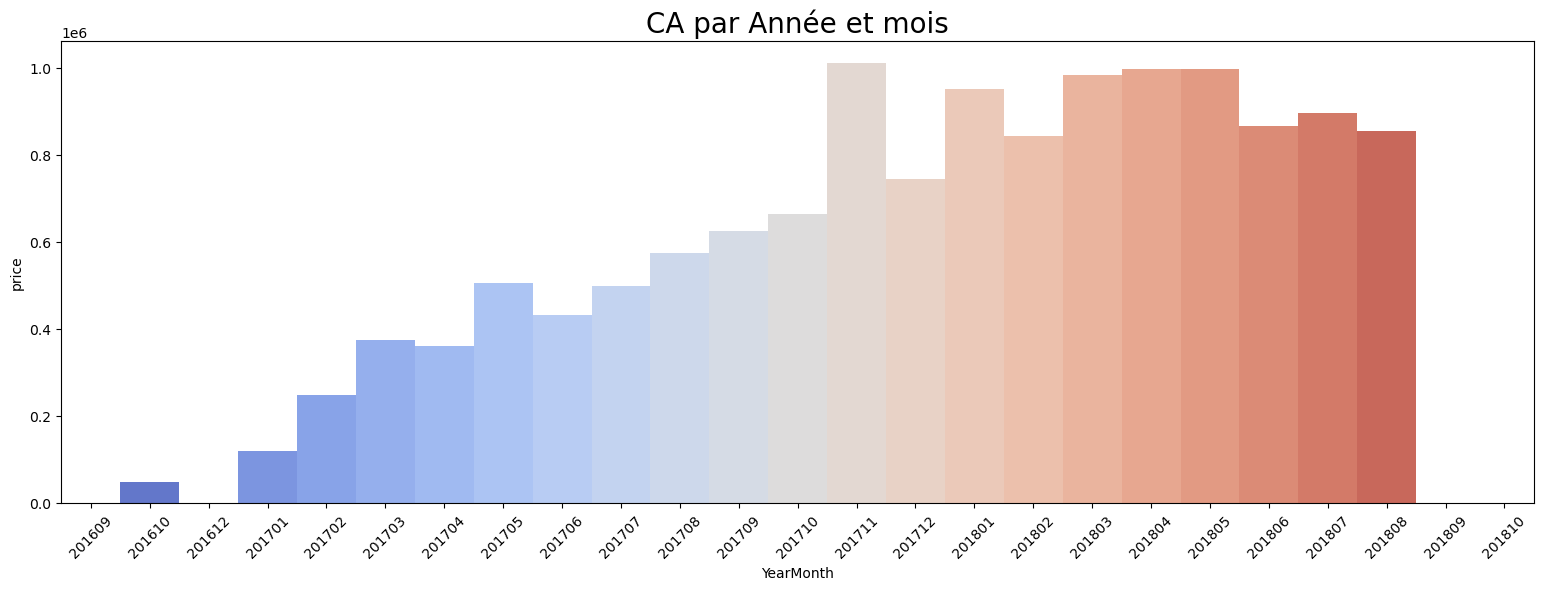

In [173]:
df_full = df_full.sort_values(by="YearMonth")
plt.figure(figsize=(19,6))
plt.xticks(rotation=45)
plt.title("CA par Année et mois", fontsize = 20)
sns.barplot(data=df_full, x='YearMonth', y='price', errorbar=None, estimator=np.sum, #hue='order_status',
            palette = "coolwarm",
            width = 1)

##### 📌 L'évolution du CA est assez corrélée au nombre de client on remarque cependant une baisse de CA légère en 08/2018 alors que le nombre de commande remontait doucement, sûrement une stratégie de pricing pour faire remonter le nombre de clients.

---

## 📍 Nombre de commandes par Années :

---

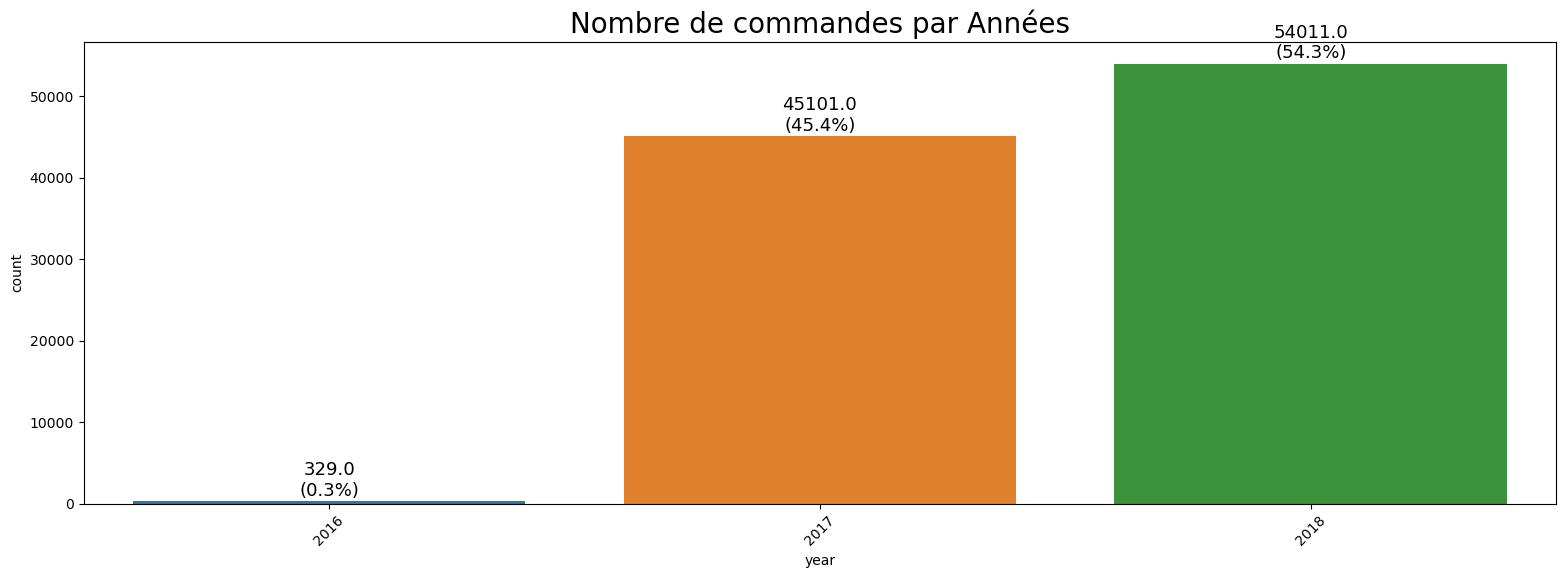

In [174]:
fig, ax = plt.subplots(figsize =(19,6))
Advanced_CountPlot(data=customer_orders, x='year', axis=ax)
plt.xticks(rotation=45)
plt.title("Nombre de commandes par Années", fontsize = 20)
plt.show()

##### 📌 Entre 2016 et 2018 le nombre de commandes a augmenté.

---

## 📍 Nombre de commandes par Année et par Mois :

---

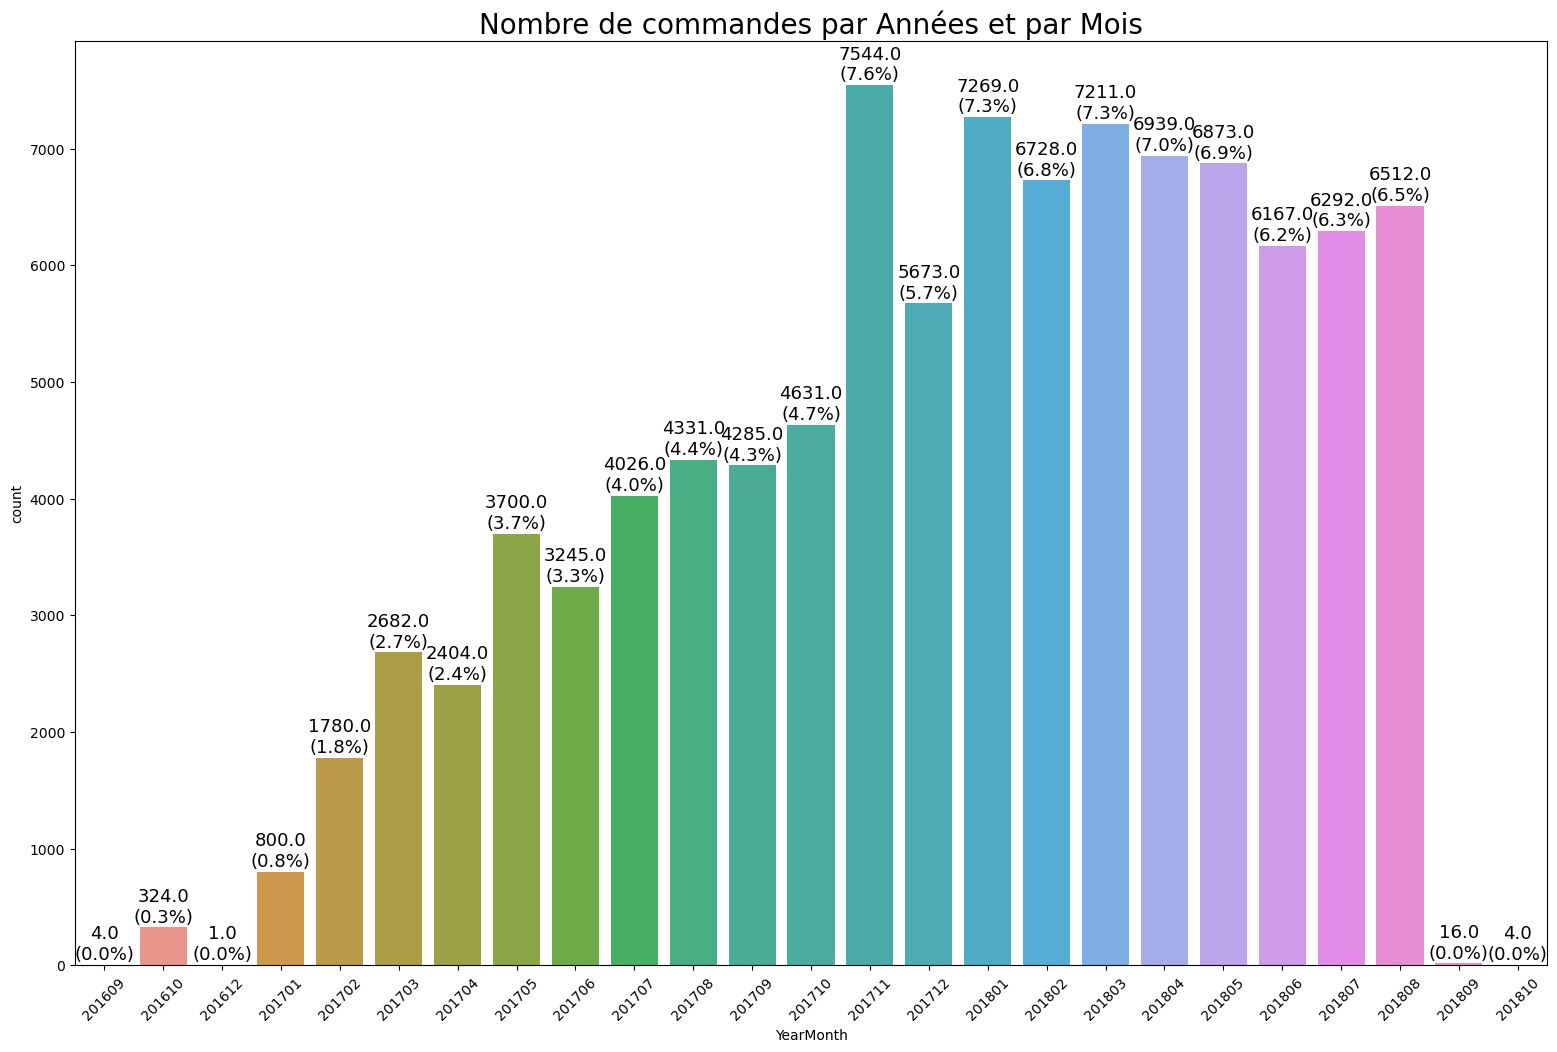

In [175]:
fig, ax = plt.subplots(figsize =(19,12))
customer_orders = customer_orders.sort_values(by = "YearMonth")
Advanced_CountPlot(data=customer_orders, x='YearMonth', axis=ax)
plt.title("Nombre de commandes par Années et par Mois", fontsize = 20)
plt.xticks(rotation=45)
plt.show()

##### 📌 09/2016 et 01/2017 : Période assez difficile.
##### 📌 02/2017 à 10/2017 : Montée progressive du nombre de commandes.
##### 📌 11/2017 : Meilleure performance de toute la période d'exercice !
##### 📌 12/2017 et 01/2018 : Reprise de l'augmentation du nombre de commandes sur une base comparable avant le pic maximal.
##### 📌 02/2018 à 05/2018 : Stagnation du nombre de commandes voir légère baisse de performances.
##### 📌 06/2018 à 08/2018 : Après une baisse légère du nombre de commande stabilisation d'une remontée progressive.
##### 📌 🚧 09/2018 et 10/2018 🚧 : Blackout du nombre des commandes, problème technique? défaut d'actualisation? suppression des données des relevées pour mesurer le système de clustering créé?

---

## 📍 Nombre de commandes par jour de la semaine :

---

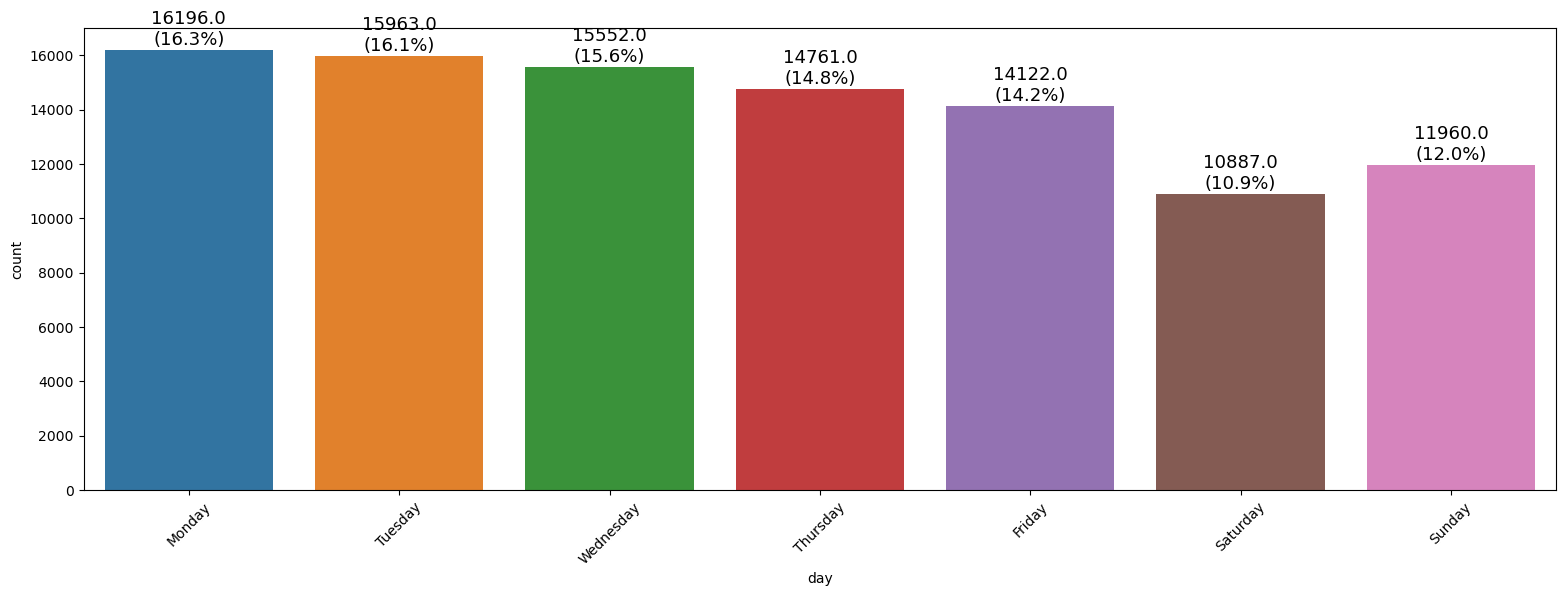

In [176]:
fig, ax = plt.subplots(figsize =(19,6))
customer_orders = customer_orders.sort_values(by="dayOfWeek")
Advanced_CountPlot(data=customer_orders, x='day', axis=ax)
plt.xticks(rotation=45)
plt.show()

##### 📌 La majeure partie des commandes est effectuée en début de semaine, recul notoire du nombre de commandes en fin de semaine.

---

## 📍 Cycle des heures de la journée où les commandes sont passées :

---

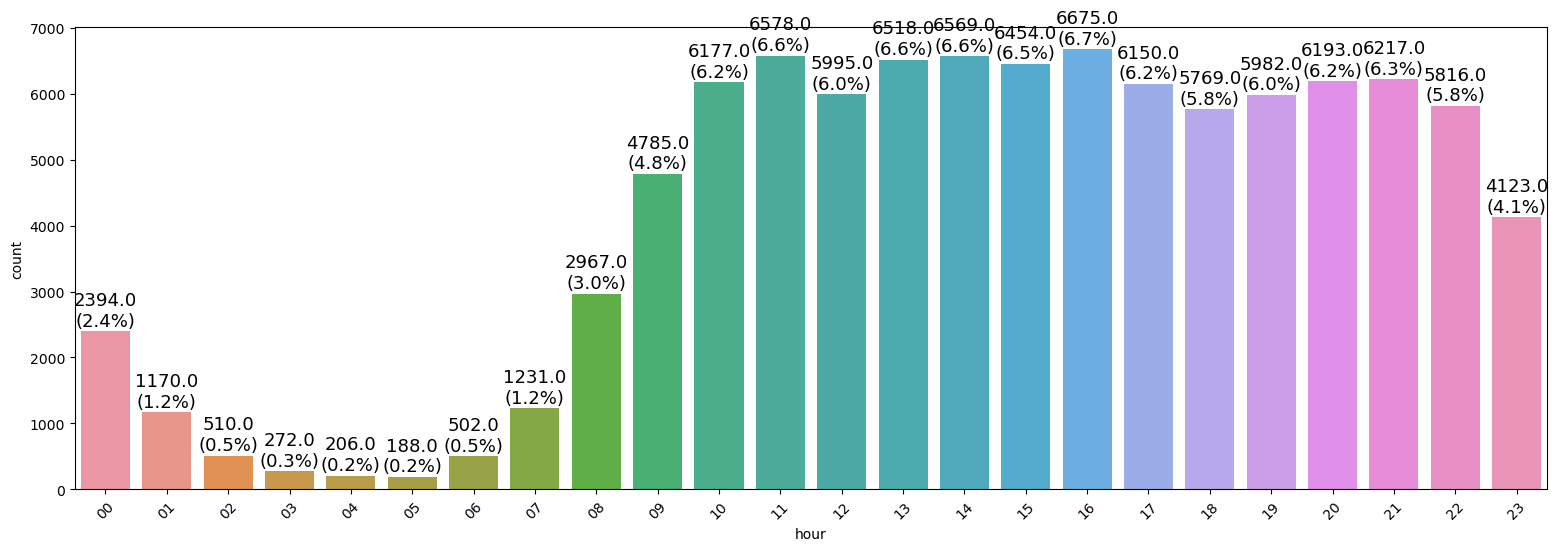

In [177]:
fig, ax = plt.subplots(figsize =(19,6))
customer_orders = customer_orders.sort_values(by="hour")
Advanced_CountPlot(data=customer_orders, x='hour', axis=ax)
plt.xticks(rotation=45)
plt.show()

##### 📌 Entre 01h00 et 07h00 très peu de commandes.
##### 📌 La majeure partie des commandes sont passées entre 9h et 00h.
##### 📌 Maximas entre 10h et 12h puis entre 13h et 17h.

---

## 📍 Commandes par statuts :

---

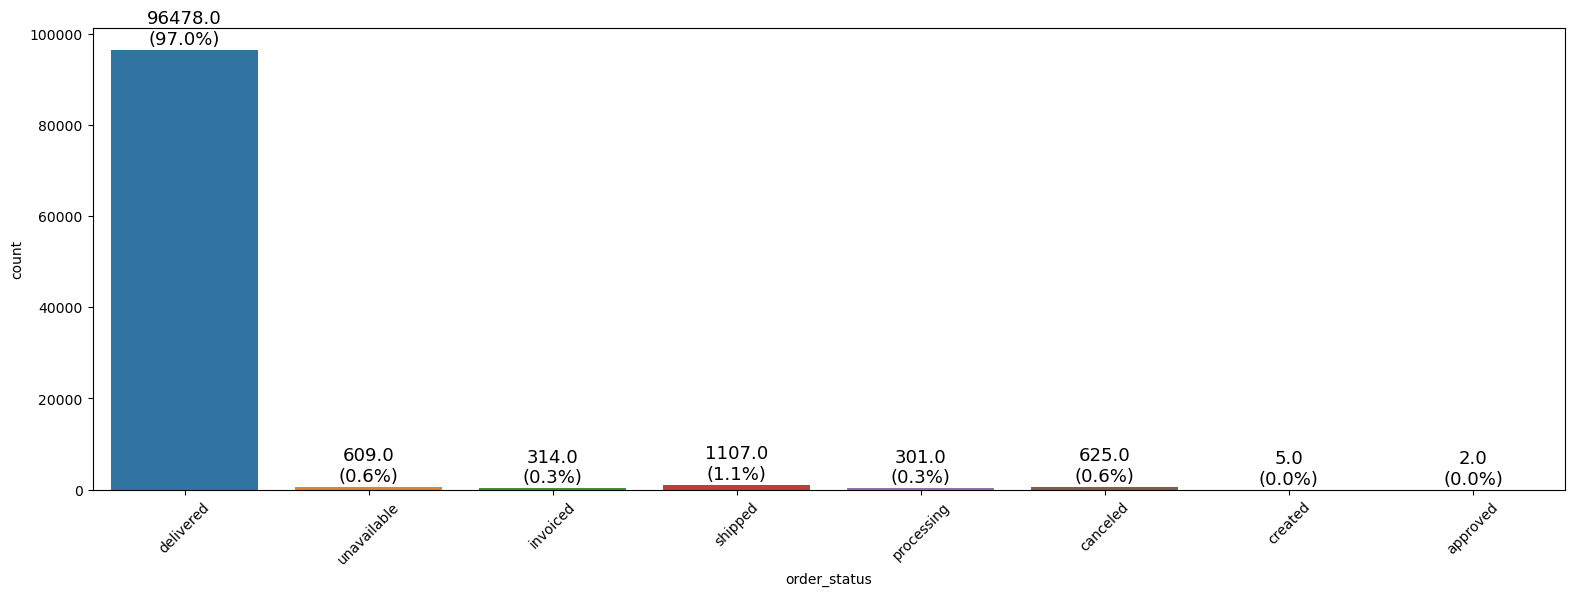

In [178]:
fig, ax = plt.subplots(figsize =(19,6))
customer_orders = customer_orders.sort_values(by="dayOfWeek")
Advanced_CountPlot(data=customer_orders, x='order_status', axis=ax)
plt.xticks(rotation=45)
plt.show()

##### 📌 1.2% des commandes sont annulées (0.6%) ou non disponibles (0.6%).
##### 📌 97% des commandes ont été délivrées.

---

## 📍 Focus sur le statut des commandes passées les deux derniers mois :

---

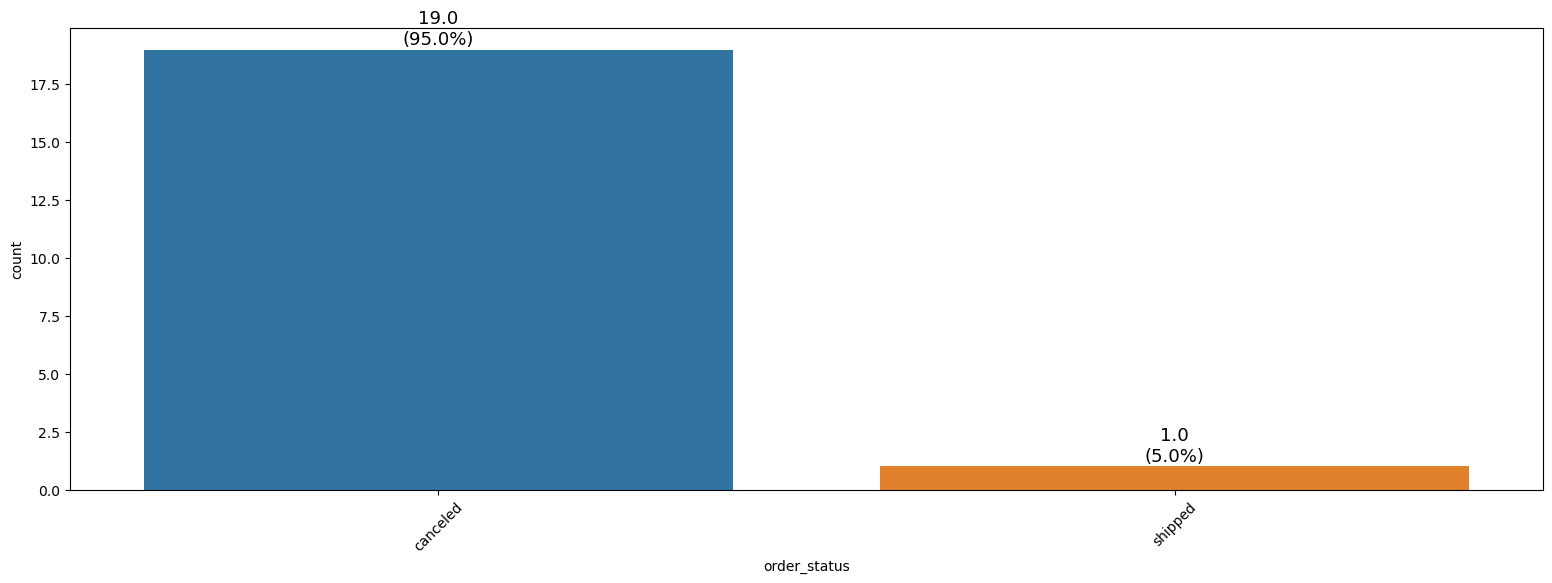

In [179]:
fig, ax = plt.subplots(figsize =(19,6))
customer_orders = customer_orders.sort_values(by="dayOfWeek")
Advanced_CountPlot(data=customer_orders.loc[(customer_orders["YearMonth"] == "201810") |
                                            (customer_orders["YearMonth"] == "201809"),:], x='order_status', axis=ax)
plt.xticks(rotation=45)
plt.show()

##### 📌 ⚠🚧🚧🚧⚠ Les deux derniers mois nous n'avons qu'une commande envoyée et 19 annulées.

### 📌 Exploration du problème détecté :

In [180]:
customer_orders = customer_orders.sort_values(by="order_purchase_timestamp", ascending = False)
customer_orders.loc[(customer_orders["YearMonth"] == "201810") |
                    (customer_orders["YearMonth"] == "201809"),:]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,YearMonth,year,month,day,dayOfWeek,numdayOfMonth,numdayOfWeek,hour,HourMin,Sum_orders_by_client
62500,10a045cdf6a5650c21e9cfeb60384c16,a4b417188addbc05b26b72d5e44837a1,canceled,2018-10-17 17:30:18,NaT,NaT,NaT,2018-10-30,87ab9fec999db8bd5774917de3cdf01c,18077,...,201810,2018,10,Wednesday,2,17,2,17,1730,1
69793,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,NaT,NaT,NaT,2018-11-12,262e1f1e26e92e86375f86840b4ffd63,64600,...,201810,2018,10,Tuesday,1,16,1,20,2016,2
19247,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16,af5454198a97379394cacf676e1e96cb,11900,...,201810,2018,10,Wednesday,2,3,2,18,1855,3
18109,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23,634420a0ea42302205032ed44ac7fccc,27175,...,201810,2018,10,Monday,0,1,0,15,1530,2
52107,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15,9bb92bebd4cb7511e1a02d5e50bc4655,7176,...,201809,2018,9,Saturday,5,29,5,09,0913,1
25745,869997fbe01f39d184956b5c6bccfdbe,55c9dad94ec1a2ba57998bdb376c230a,canceled,2018-09-26 08:40:15,NaT,NaT,NaT,2018-10-25,ba84da8c159659f116329563a0a981dd,25635,...,201809,2018,9,Wednesday,2,26,2,08,0840,3
35569,5aac76cf7b07dd06fa4d50bf461d2f40,7a8a02e54cf3472df427e927f8b9c046,canceled,2018-09-25 11:59:18,NaT,NaT,NaT,2018-10-11,9c3af16efacb7aa06aa3bc674556c5d6,30170,...,201809,2018,9,Tuesday,1,25,1,11,1159,2
1938,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17,08642cd329066fe11ec63293f714f2f8,33030,...,201809,2018,9,Thursday,3,20,3,13,1354,2
17401,bd35b677fd239386e9861d11ae98ab56,ad2eb5d02c0808bcd8743117f6383cf6,canceled,2018-09-17 17:21:16,NaT,NaT,NaT,2018-10-01,ef0103e9602d12594d19c2b666219bc1,30810,...,201809,2018,9,Monday,0,17,0,17,1721,3
5534,ea844c92cf978ea23321fa7fe5871761,6ddc45ad08e6a2c885ca2255fc52d6df,canceled,2018-09-13 09:56:12,NaT,NaT,NaT,2018-09-27,c1ee153508c6b785b491443a95ff364e,89300,...,201809,2018,9,Thursday,3,13,3,09,0956,1


### Observations :
#### 📌 Toutes les dernières commandes recensées ont le statuts "CANCELED".
#### 📌 Dernière commande recensée avec le statut "CANCELED" : 2018-10-17 17:30:18
#### 📌 Dernière commande recensée avec le statut "SHIPPED" : 2018-09-03 09:06:57

---

## 📍 Nombre de commande par client :

---

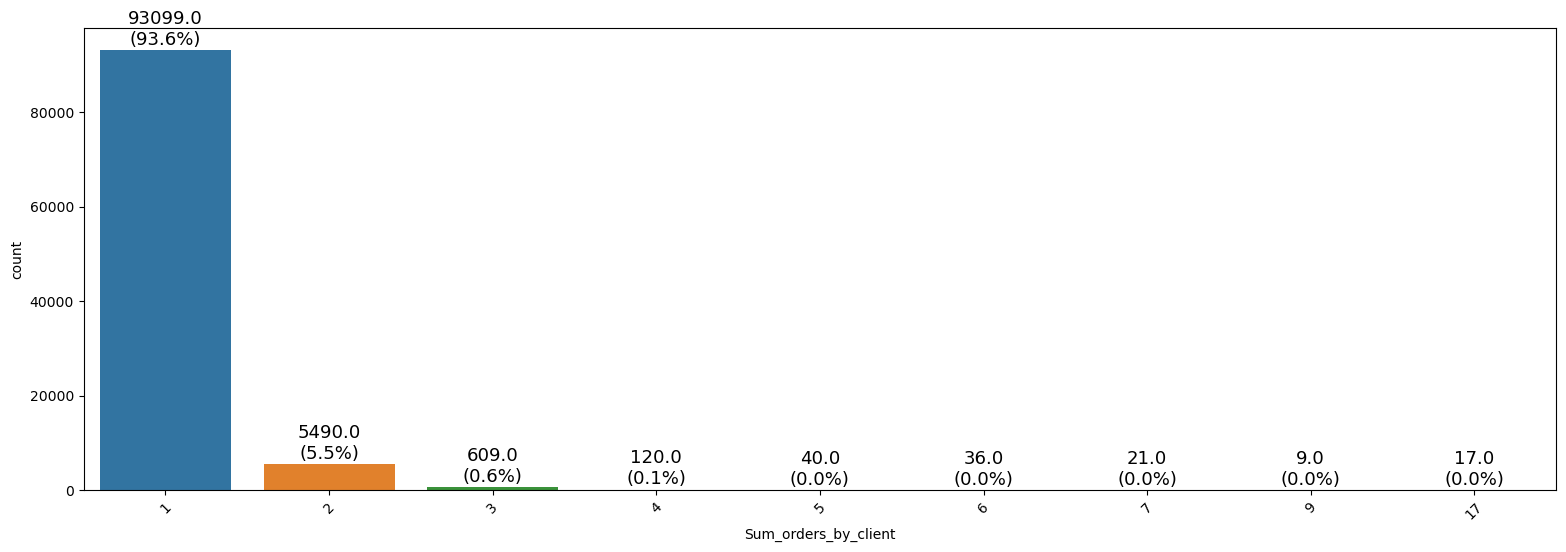

In [181]:
fig, ax = plt.subplots(figsize =(19,6))
customer_orders = customer_orders.sort_values(by="Sum_orders_by_client")
Advanced_CountPlot(data=customer_orders, x='Sum_orders_by_client', axis=ax)
plt.xticks(rotation=45)
plt.show()

##### 📌 93.6% des clients ne commandent qu'une seule fois, forte capacité d'amélioration de l'UX et du parcours utilisateur.
##### 📌 6.1% des clients ont passé 2 ou 3 commandes (2 : 5.5%, 3 : 0.6%)

---
---
---
---

# 2 - LES PANIERS MOYENS - Partie Graphique

---

## 📍 Panier moyen d'une commande par année :

---

<AxesSubplot: title={'center': "Panier moyen d'une commande par année"}, xlabel='year', ylabel='price'>

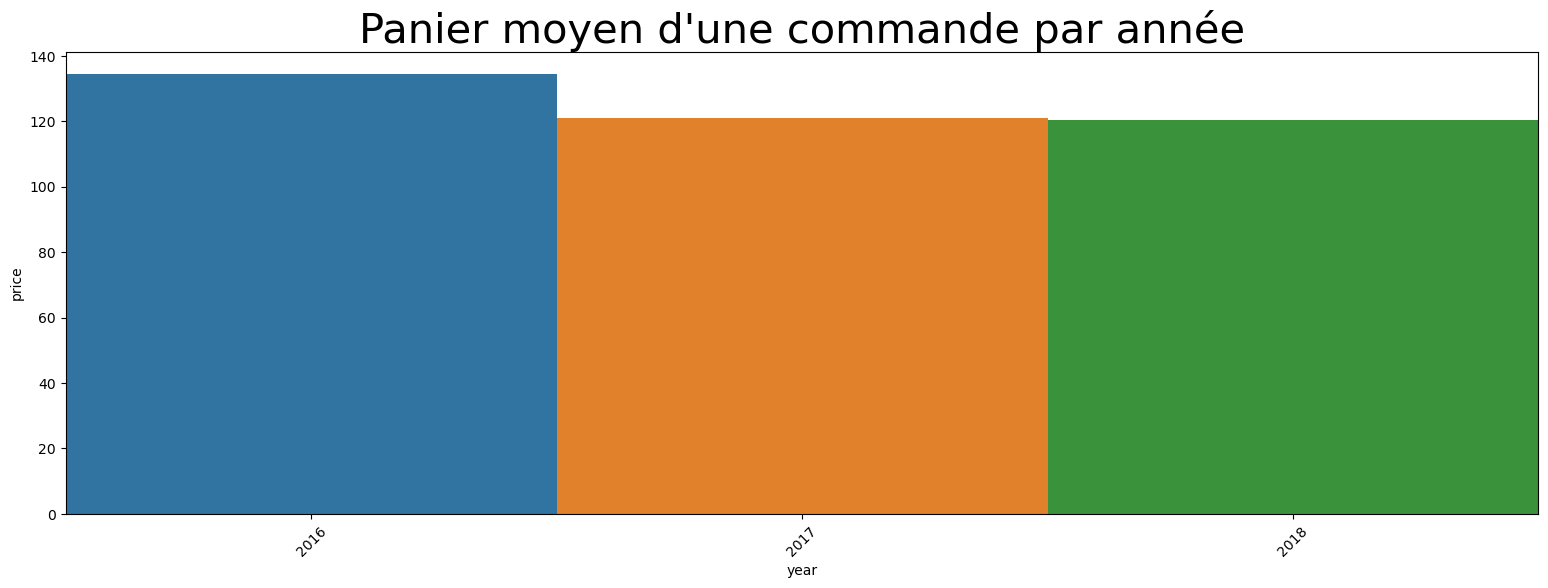

In [182]:
customers_orders_items = customers_orders_items.sort_values(by="YearMonth")
plt.figure(figsize=(19,6))
plt.xticks(rotation=45)
plt.title("Panier moyen d'une commande par année", fontsize = 30)
sns.barplot(data=customers_orders_items, x='year', y='price', errorbar=None, estimator=np.mean, #hue='order_status',
            #palette = "PuBu",
            width = 1)

##### 📌 Le panier moyen se situe aux alentours de 136 dollars en 2016.
##### 📌 Le panier moyen se situe aux alentours de 118 dollars en 2017 et baisse très légèremment de nouveau en 2018.

---

## 📍 Panier moyen d'une commande par mois :

---

<AxesSubplot: title={'center': "Panier moyen d'une commande par mois"}, xlabel='month', ylabel='price'>

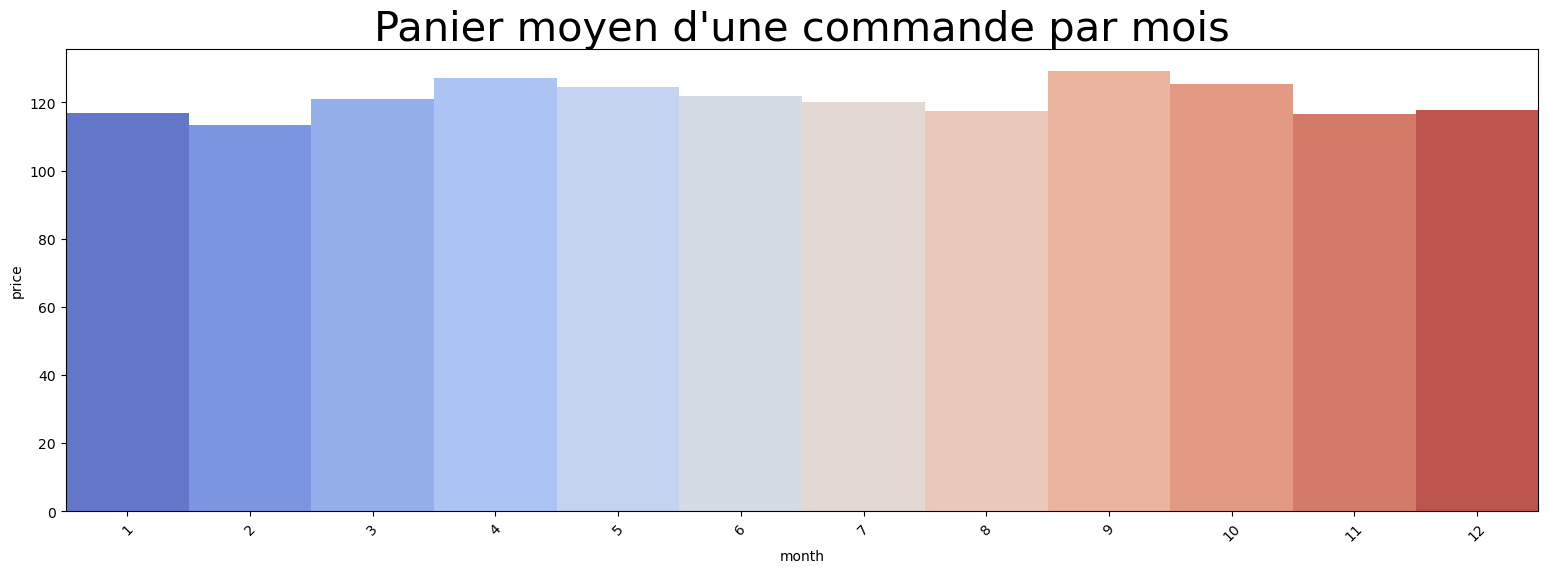

In [183]:
customers_orders_items = customers_orders_items.sort_values(by="dayOfWeek")
plt.figure(figsize=(19,6))
plt.xticks(rotation=45)
plt.title("Panier moyen d'une commande par mois", fontsize = 30)
sns.barplot(data=customers_orders_items, x='month', y='price', errorbar=None, estimator=np.mean, #hue='order_status',
            palette = "coolwarm",
            width = 1)

##### 📌 Augmentation légère du panier moyen en Avril et en Mai ainsi qu'un pic de valeur des commandes en Septembre et en Octobre.

---

## 📍 Panier moyen d'une commande par jour du mois :

---

<AxesSubplot: title={'center': "Panier moyen d'une commande par jour du mois"}, xlabel='numdayOfMonth', ylabel='price'>

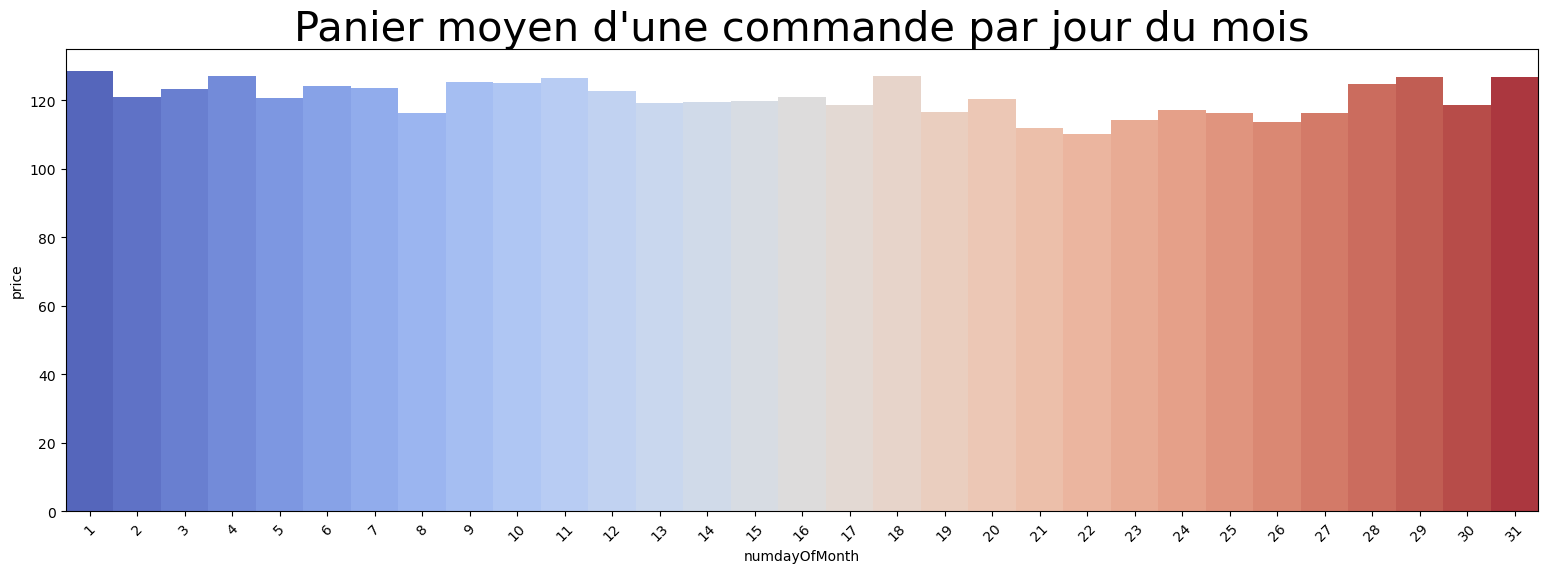

In [184]:
customers_orders_items = customers_orders_items.sort_values(by="dayOfWeek")
plt.figure(figsize=(19,6))
plt.xticks(rotation=45)
plt.title("Panier moyen d'une commande par jour du mois", fontsize = 30)
sns.barplot(data=customers_orders_items, x='numdayOfMonth', y='price', errorbar=None, estimator=np.mean, #hue='order_status',
            palette = "coolwarm",
            width = 1)

##### 📌 Pic de panier moyen des commandes le 18 du mois en général.
##### 📌 Entre le 28 et le le 1er du mois les paniers moyens sont légèremment plus élevés.

---

## 📍 Panier moyen d'une commande par jour de la semaine :

---

<AxesSubplot: title={'center': "Panier moyen d'une commande par jour de la semaine"}, xlabel='day', ylabel='price'>

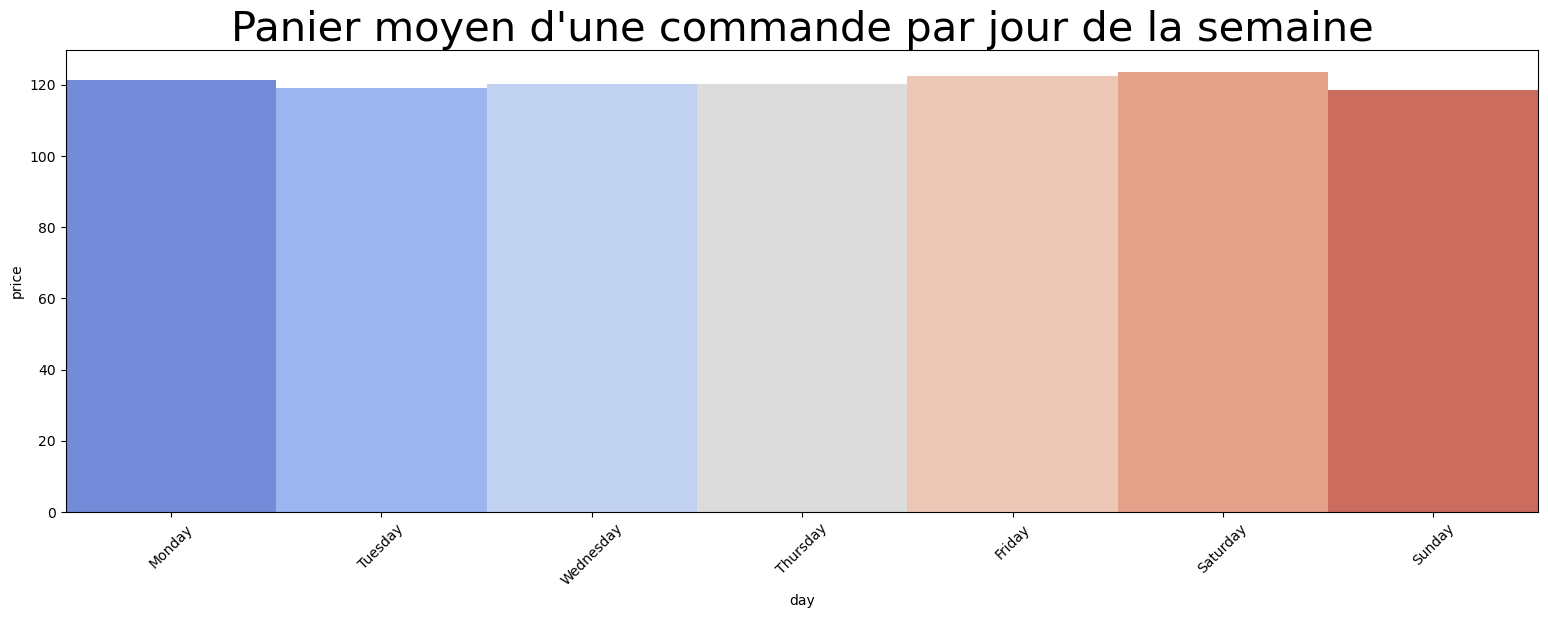

In [185]:
customers_orders_items = customers_orders_items.sort_values(by="numdayOfWeek")
plt.figure(figsize=(19,6))
plt.xticks(rotation=45)
plt.title("Panier moyen d'une commande par jour de la semaine", fontsize = 30)
sns.barplot(data=customers_orders_items, x='day', y='price', errorbar=None, estimator=np.mean, #hue='order_status',
            palette = "coolwarm",
            width = 1)

##### 📌 Extrême stabilité des paniers moyens selon le jour de la semaine.
##### 📌 Très légère augmentation du panier moyen des commandes le vendredi et le samedi.

---
---

### 📍 Capter les timestamp de chaque achat dans les commandes multi-achats pourrait être bénéfique :

In [186]:
customers_orders_items.loc[customers_orders_items["order_id"] == "2c6c5c881336bcec2d8c89cb05184a81", "order_purchase_timestamp"]

29276   2018-03-26 18:45:21
29277   2018-03-26 18:45:21
Name: order_purchase_timestamp, dtype: datetime64[ns]

### ⭐ Récupérer les variables timestamp de chaque item composant un commande multiple lors de sa sélection  permettrait de voir les items "d'appel" et de "contagion" dans les commandes contenant plusieurs produits.

---
---
---
---

# 3 - LES PRODUITS - Partie Graphique

---

## 📍 Extraction de nouvelles variables :
---
#### 📌 Moyennes de Prix par produits.
#### 📌 Somme de Prix par produits.

In [187]:
ProductCategory_MeanPrice = df_full.groupby('product_category_name_english', as_index = False).agg({'price':'mean'}).rename(columns = {
              'price':'ProductCategory_MeanPrice'})

ProductCategory_SumPrice = df_full.groupby('product_category_name_english', as_index = False).agg({'price':'sum'}).rename(columns = {
              'price':'ProductCategory_SumPrice'})

df_full = df_full.merge(ProductCategory_MeanPrice, on ="product_category_name_english", how="inner")
df_full = df_full.merge(ProductCategory_SumPrice, on ="product_category_name_english", how="inner")

---

## 📍 CA réalisé par catégories de produits vendus :

---

<AxesSubplot: title={'center': 'CA réalisé par typologie de produits vendus'}, xlabel='product_category_name_english', ylabel='price'>

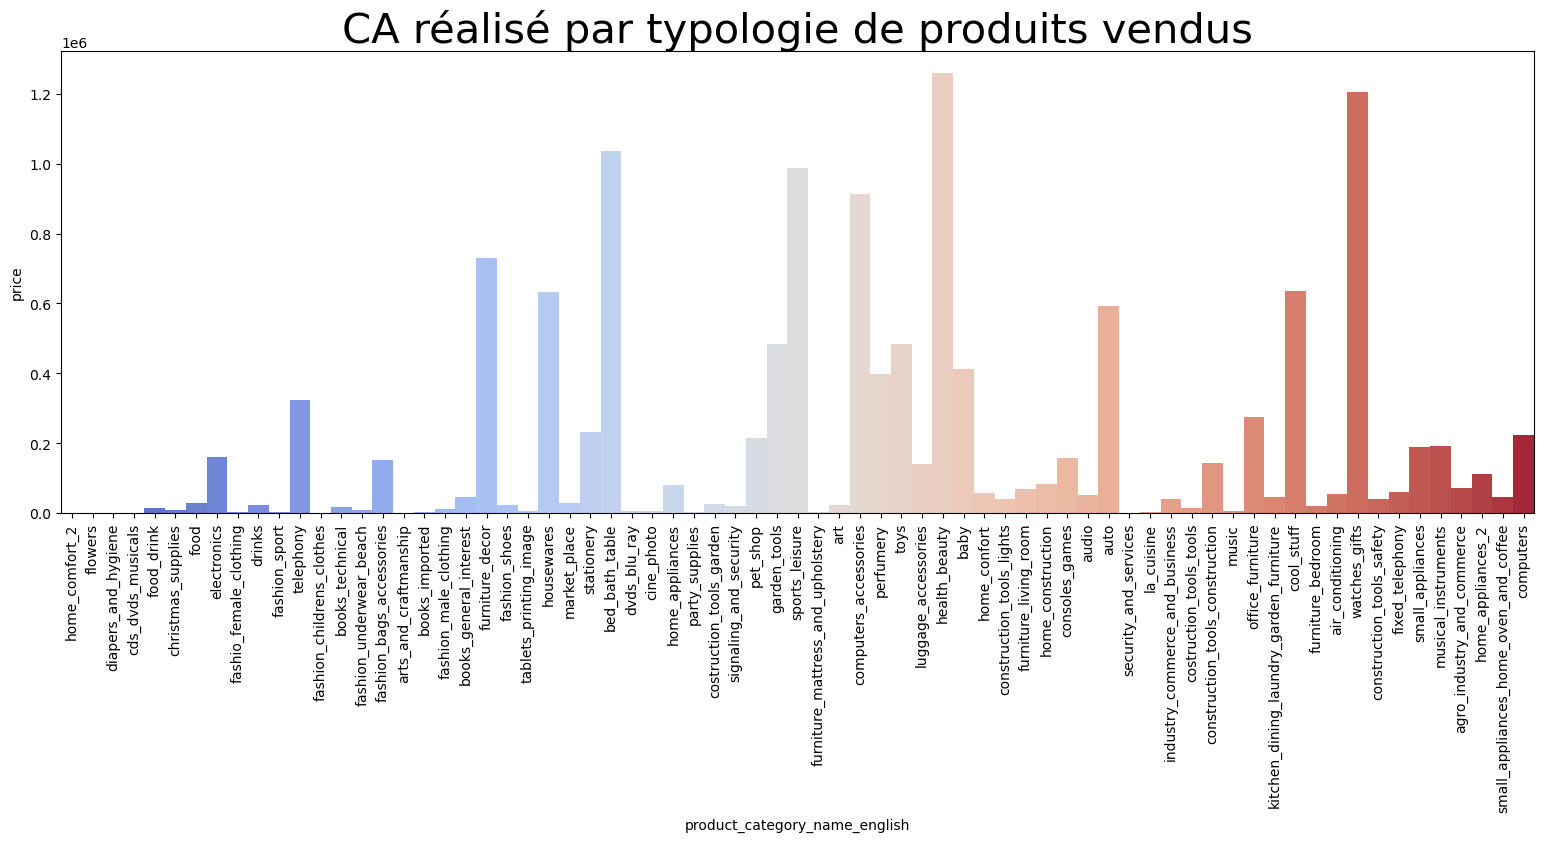

In [188]:
df_full = df_full.sort_values(by="ProductCategory_MeanPrice")
plt.figure(figsize=(19,6))
plt.xticks(rotation=90)
plt.title("CA réalisé par typologie de produits vendus", fontsize = 30)
sns.barplot(data=df_full, x='product_category_name_english', y='price', errorbar=None, estimator=np.sum, #hue='order_status',
            palette = "coolwarm", width = 1)

#### 📌 Les catégories furniture_decor, housewares, bed_bath_table, sports_leisure, computer_accesories, health_beauty, auto, cool_stuff, watches_gifts sont les catégories de produits les plus génératices de CA.

---

## 📍 Prix moyen par catégories de produits vendus :

---

<AxesSubplot: title={'center': 'Prix moyen par typologie de produits vendus'}, xlabel='product_category_name_english', ylabel='ProductCategory_MeanPrice'>

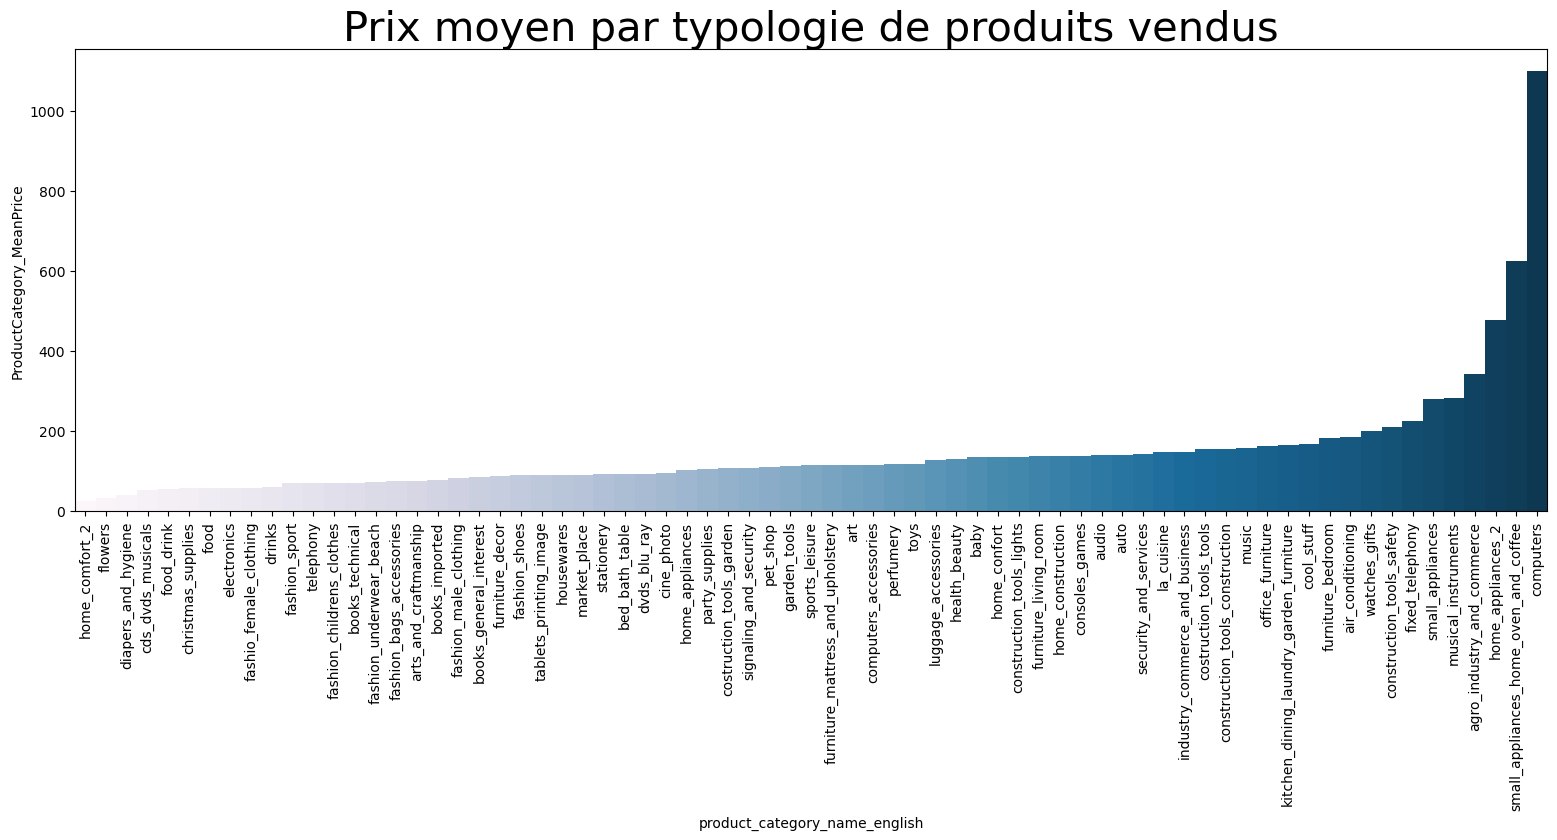

In [189]:
df_full = df_full.sort_values(by="ProductCategory_MeanPrice")
plt.figure(figsize=(19,6))
plt.xticks(rotation=90)
plt.title("Prix moyen par typologie de produits vendus", fontsize = 30)
sns.barplot(data=df_full, x='product_category_name_english', y='ProductCategory_MeanPrice', errorbar=None, #estimator=np.mean, #hue='order_status',
            palette = "PuBu", width = 1)

#### 📌 Les paniers moyens sont particlièrement plus élevés dans les catégories computers, small_appliances_home_oven_and_coffee, home_appliances_2, agro_industry_and_commerce. 

---

## 📍 Regroupement typologique des catégories de produits :

---

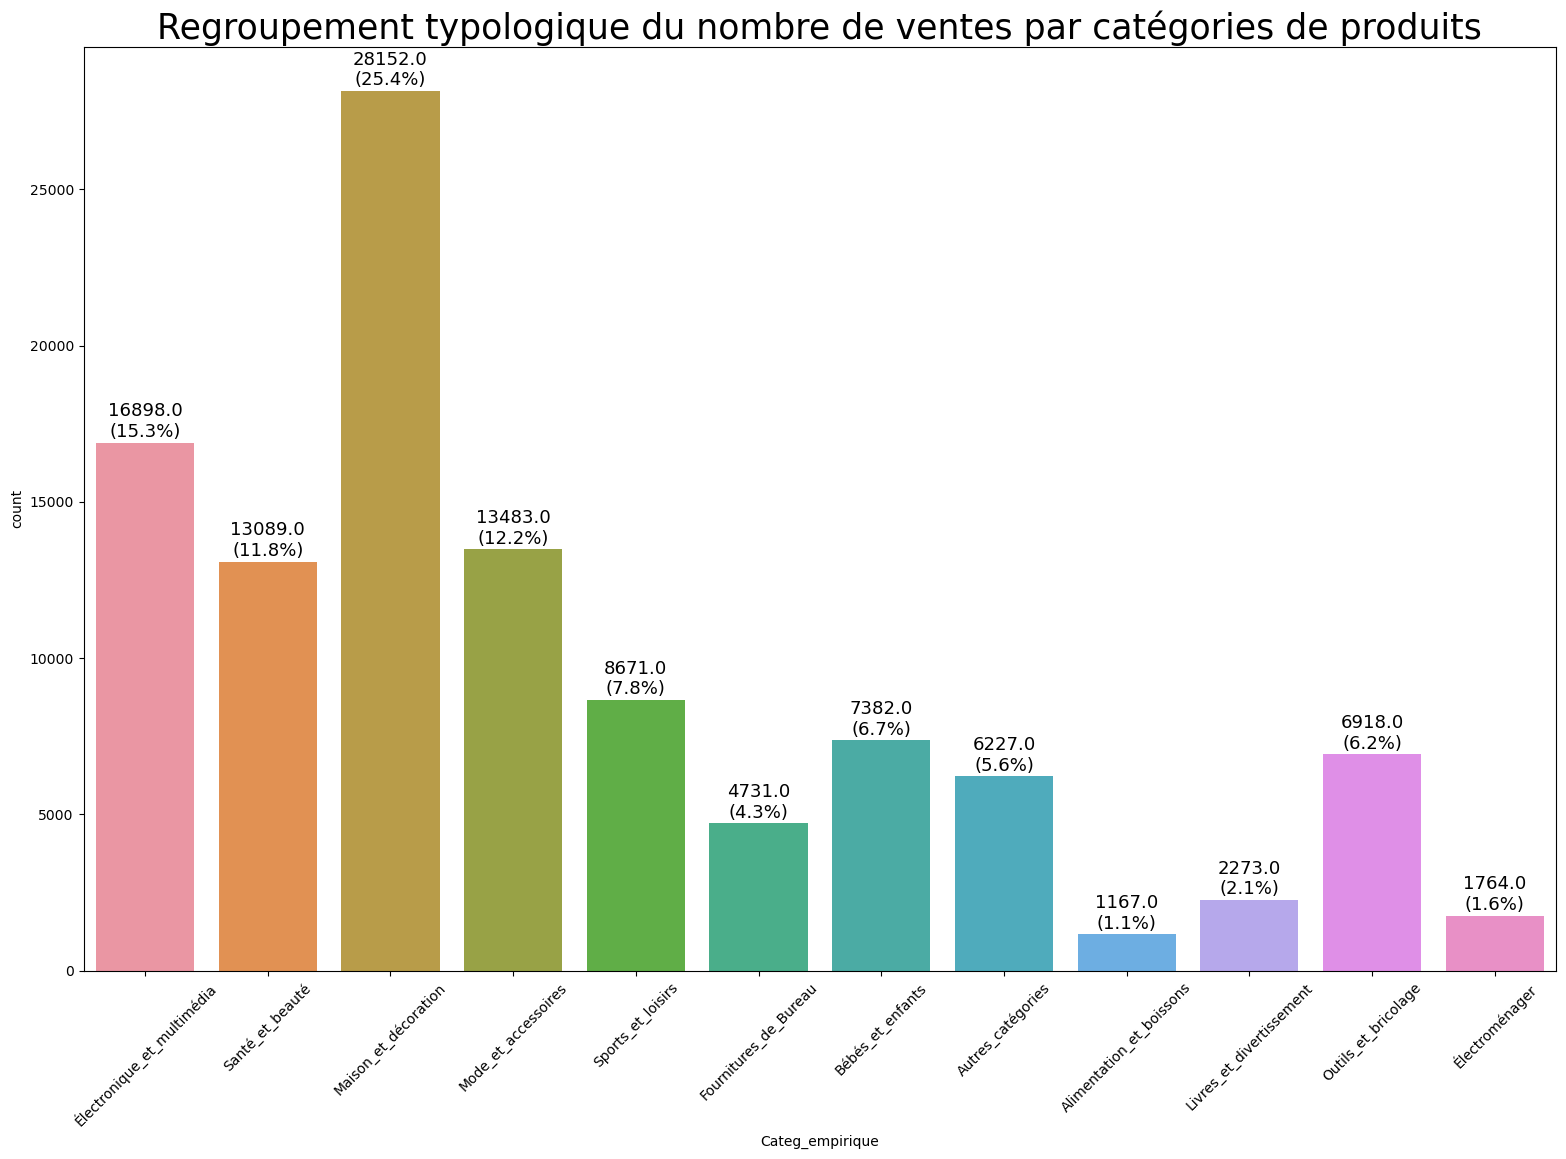

In [190]:
fig, ax = plt.subplots(figsize =(19,12))
df_full = df_full.sort_values(by = "YearMonth")
Advanced_CountPlot(data=df_full, x='Categ_empirique', axis=ax)
plt.title("Regroupement typologique du nombre de ventes par catégories de produits", fontsize = 25)
plt.xticks(rotation=45)
plt.show()

---

## 📍 CA réalisé par typologie de produits vendus :

---

<AxesSubplot: title={'center': 'CA réalisé par typologie de produits vendus'}, xlabel='Categ_empirique', ylabel='price'>

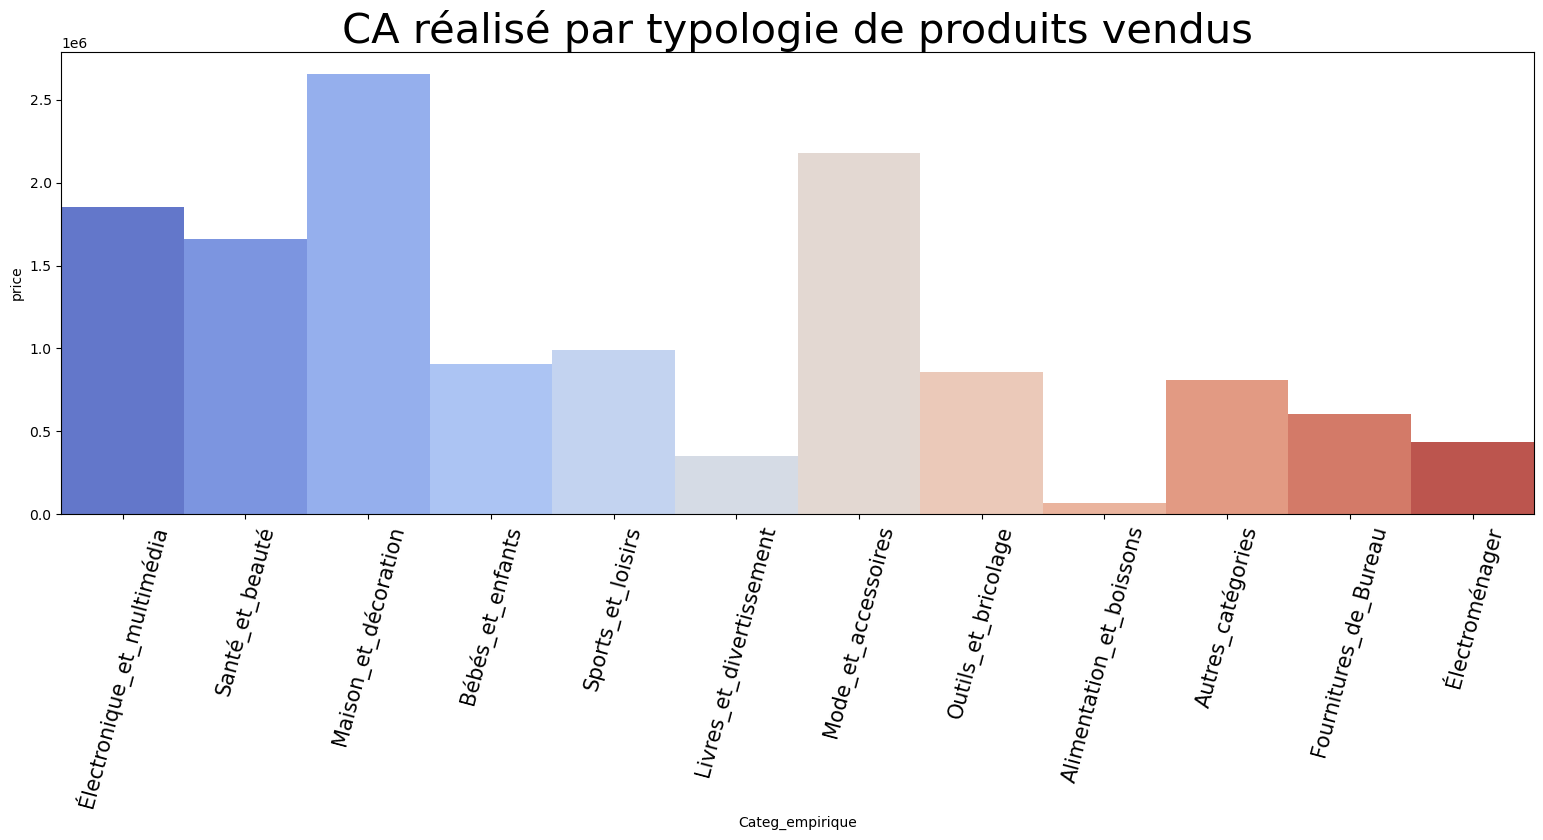

In [191]:
df_full = df_full.sort_values(by="YearMonth")
plt.figure(figsize=(19,6))
plt.xticks(rotation=75, fontsize = 15)
plt.title("CA réalisé par typologie de produits vendus", fontsize = 30)
sns.barplot(data=df_full, x='Categ_empirique', y='price', errorbar=None, estimator=np.sum, #hue='order_status',
            palette = "coolwarm", width = 1)

---

## 📍 Prix moyen par typologie de produits vendus :

---

<AxesSubplot: title={'center': 'Prix moyen par typologie de produits vendus'}, xlabel='Categ_empirique', ylabel='price'>

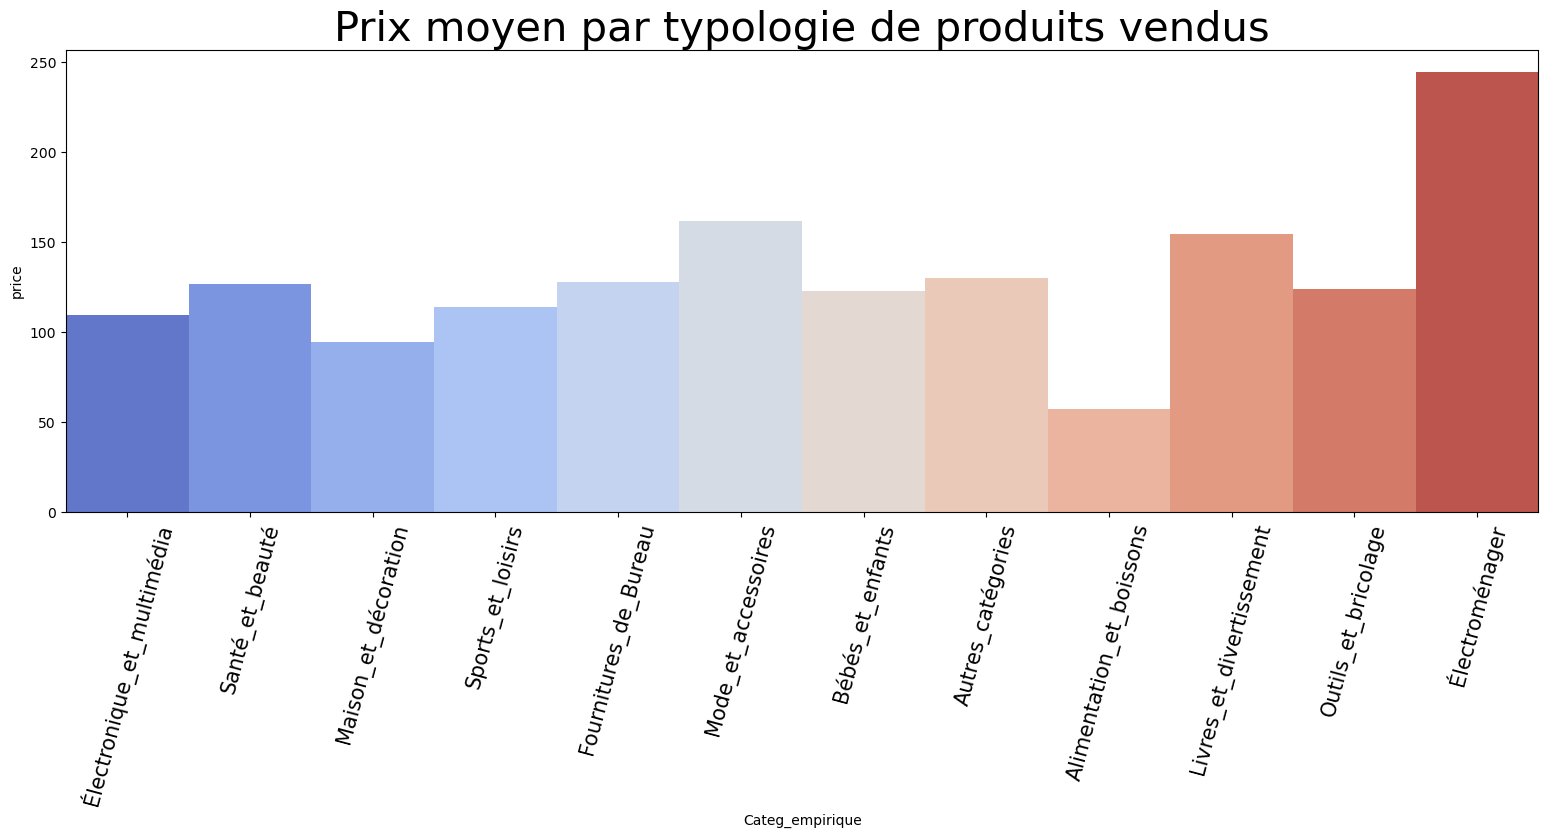

In [192]:
df_full = df_full.sort_values(by="YearMonth")
plt.figure(figsize=(19,6))
plt.xticks(rotation=75, fontsize = 15)
plt.title("Prix moyen par typologie de produits vendus", fontsize = 30)
sns.barplot(data=df_full, x='Categ_empirique', y='price', errorbar=None, estimator=np.mean, #hue='order_status',
            palette = "coolwarm", width = 1)

---

# 4 - LES CLIENTS - Partie Graphique

---

## 📍 Évolution du nombre de commande par client :

---

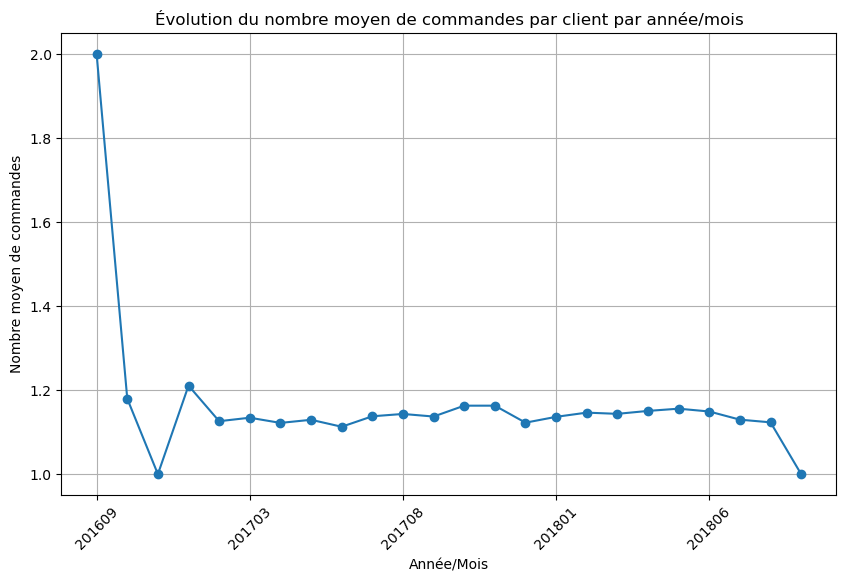

In [193]:
# Calculer le nombre de commandes par client pour chaque année/mois
orders_per_customer = df_full.groupby(['YearMonth', 'customer_id'])['order_id'].count().reset_index()
avg_orders_per_customer = orders_per_customer.groupby('YearMonth')['order_id'].mean()

# Créer le graphique
plt.figure(figsize=(10, 6))
avg_orders_per_customer.plot(kind='line', marker='o')
plt.title("Évolution du nombre moyen de commandes par client par année/mois")
plt.xlabel("Année/Mois")
plt.ylabel("Nombre moyen de commandes")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

---

## 📍 Évolution du nombre de nouveaux clients :

---

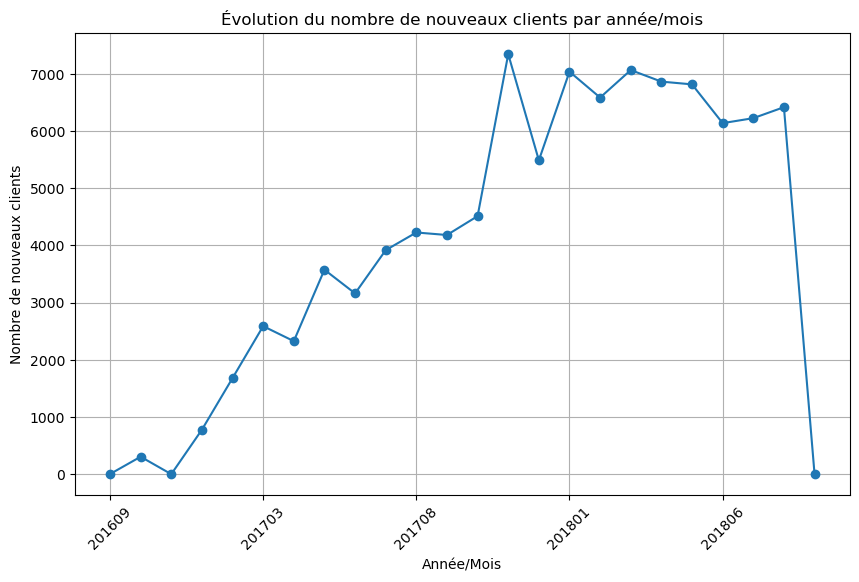

In [194]:
# Calculer le nombre de nouveaux clients pour chaque année/mois
new_customers = df_full.groupby('YearMonth')['customer_id'].nunique()

# Créer le graphique
plt.figure(figsize=(10, 6))
new_customers.plot(kind='line', marker='o')
plt.title("Évolution du nombre de nouveaux clients par année/mois")
plt.xlabel("Année/Mois")
plt.ylabel("Nombre de nouveaux clients")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

---

## 📍 Évolution du nombre de clients passant une deuxième commande :

---

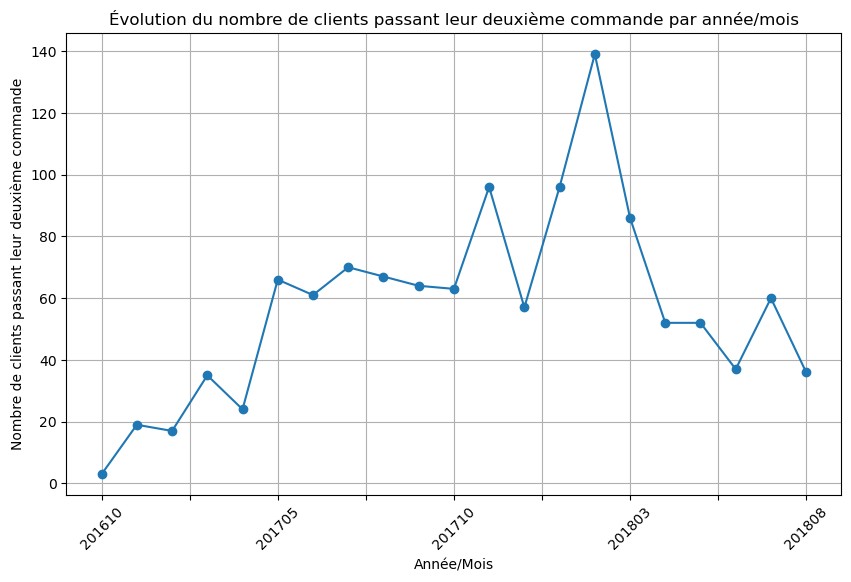

In [195]:
# Identifier les clients et leurs commandes
customer_orders = df_full.groupby(['YearMonth', 'customer_unique_id'])['order_id'].nunique().reset_index()

# Filtrer les clients ayant passé au moins deux commandes
repeat_customers = customer_orders[customer_orders['order_id'] == 2]

# Calculer le nombre de clients passant leur deuxième commande pour chaque année/mois
second_orders_count = repeat_customers.groupby('YearMonth').size()

# Créer le graphique
plt.figure(figsize=(10, 6))
second_orders_count.plot(kind='line', marker='o')
plt.title("Évolution du nombre de clients passant leur deuxième commande par année/mois")
plt.xlabel("Année/Mois")
plt.ylabel("Nombre de clients passant leur deuxième commande")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

---

## 📍 Évolution du nombre de clients passant une troisième commande :

---

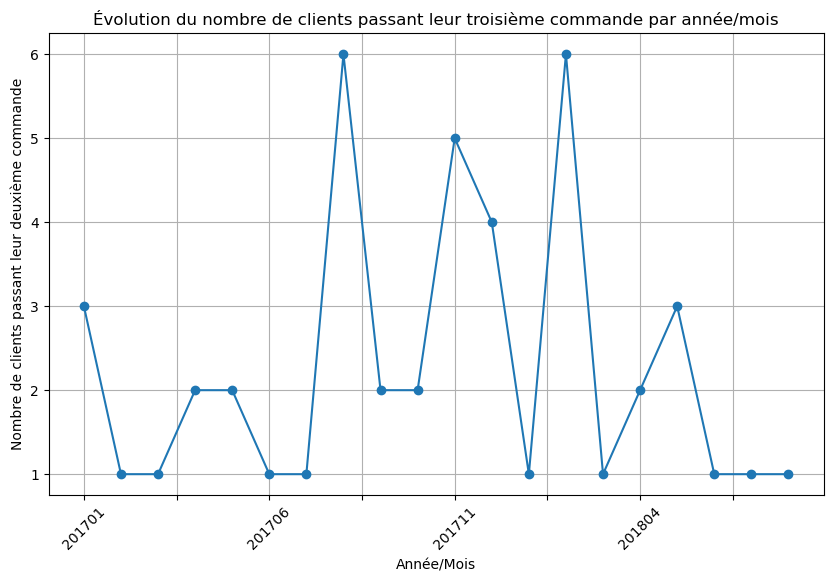

In [196]:
# Identifier les clients et leurs commandes
customer_orders = df_full.groupby(['YearMonth', 'customer_unique_id'])['order_id'].nunique().reset_index()

# Filtrer les clients ayant passé au moins deux commandes
repeat_customers = customer_orders[customer_orders['order_id'] == 3]

# Calculer le nombre de clients passant leur deuxième commande pour chaque année/mois
second_orders_count = repeat_customers.groupby('YearMonth').size()

# Créer le graphique
plt.figure(figsize=(10, 6))
second_orders_count.plot(kind='line', marker='o')
plt.title("Évolution du nombre de clients passant leur troisième commande par année/mois")
plt.xlabel("Année/Mois")
plt.ylabel("Nombre de clients passant leur deuxième commande")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

---
---

## 📍 Étude de préférence de paiement des clients :

---

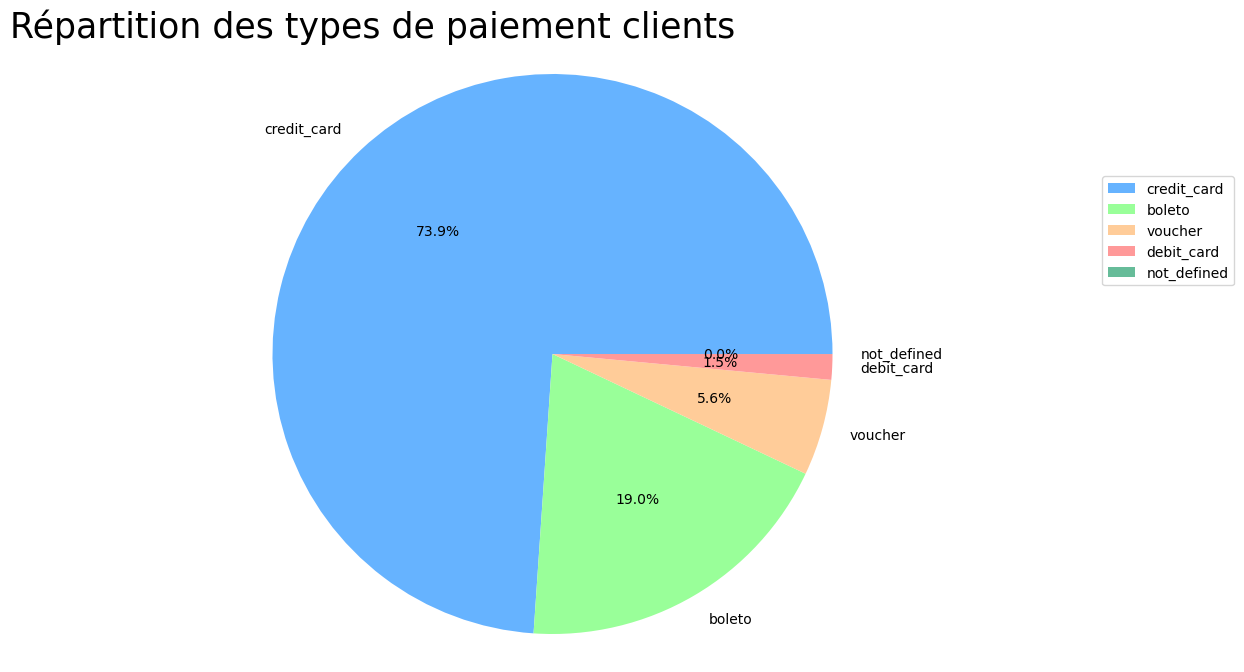

In [197]:
payment_counts = order_payments_data['payment_type'].value_counts()
plt.figure(figsize=(14,8))
plt.pie(payment_counts, labels=payment_counts.index,autopct='%1.1f%%',startangle=0, 
        colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999', '#66bc99'])
plt.legend(bbox_to_anchor=(1, 0.8), loc='upper left')
plt.title("Répartition des types de paiement clients", loc='left',fontsize=25)
plt.axis('equal')
plt.show()

---

## 📍 Préférences en terme de paiement différés des clients :

---

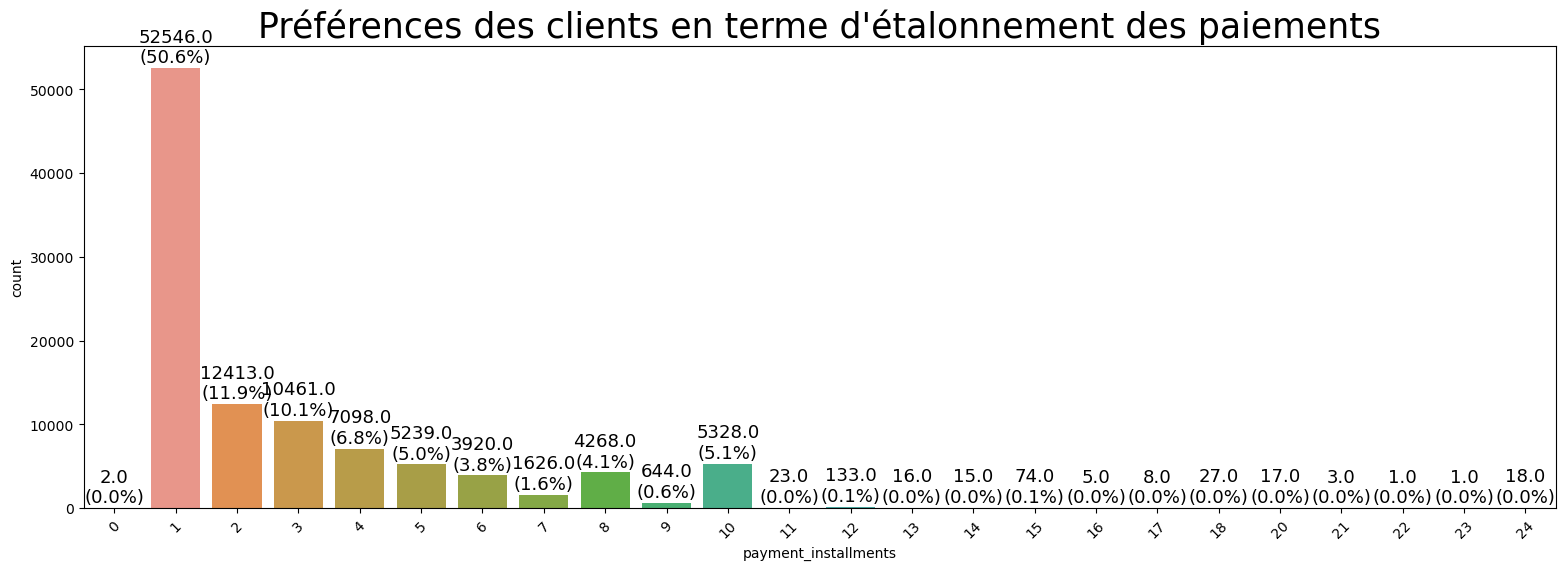

In [198]:
fig, ax = plt.subplots(figsize =(19,6))
Advanced_CountPlot(data=order_payments_data, x='payment_installments', axis=ax)
plt.xticks(rotation=45)
plt.title("Préférences des clients en terme d'étalonnement des paiements", fontsize = 25)
plt.show()

---
---

## 📍 Zones géographique des clients :

---

In [199]:
# Essentiel au Brésil. Nettoyage de la base conseillé pour création de visuels.

---

## 📍 Évolution temporelle de la satisfaction client :

---

In [200]:
order_reviews_mean = order_reviews_data.groupby("order_id")["review_score"].mean()
order_reviews_mean = pd.DataFrame(order_reviews_mean)

order_cust = orders_data.merge(customers_data, left_on = "customer_id", right_on = "customer_id", how = "inner")
order_cust_review = order_cust.merge(order_reviews_mean, left_on = "order_id", right_on = order_reviews_mean.index, how = "inner")

order_cust_review["YearMonth"] = order_cust_review["order_purchase_timestamp"].dt.strftime('%Y%m')
customer_orders = order_cust_review.groupby(['YearMonth', 'customer_unique_id'])['review_score'].mean().reset_index()
second_orders_count = customer_orders.groupby('YearMonth').mean(numeric_only = True)

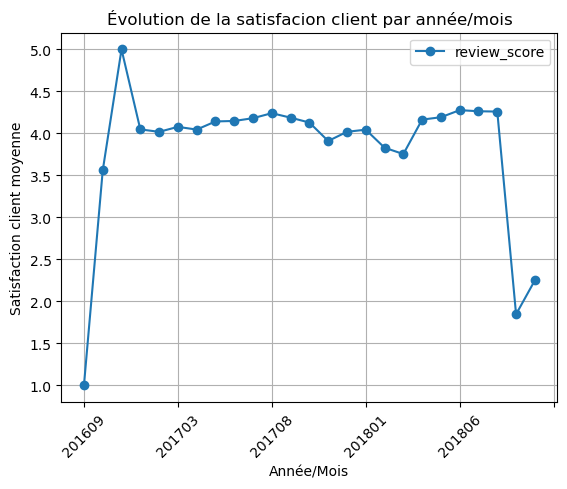

In [201]:
# Créer le graphique
second_orders_count.plot(kind='line', marker='o')
plt.title("Évolution de la satisfacion client par année/mois")
plt.xlabel("Année/Mois")
plt.ylabel("Satisfaction client moyenne")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

---

## 📍 Répartition de la satisfaction client :

---

In [202]:
review_mean_per_customer = pd.DataFrame(order_cust_review.groupby("customer_unique_id")["review_score"].mean())

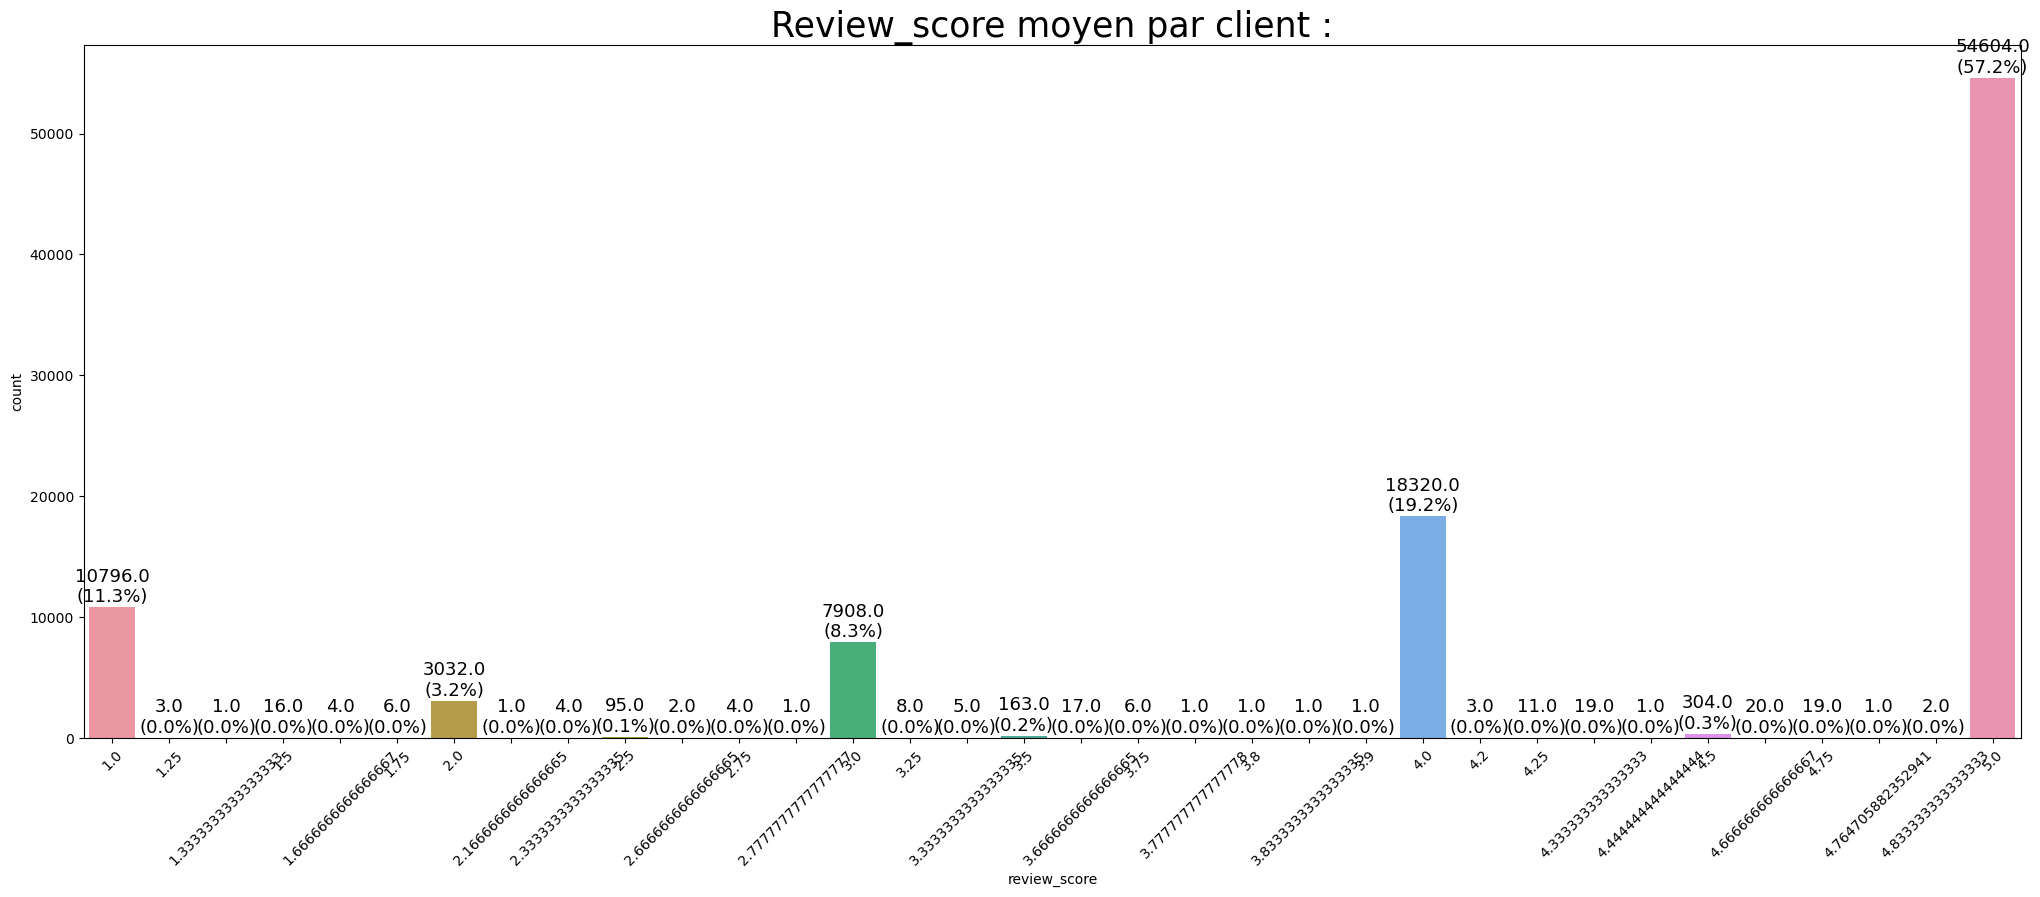

In [203]:
fig, ax = plt.subplots(figsize =(25,9))
Advanced_CountPlot(data=review_mean_per_customer, x='review_score', axis=ax)
plt.xticks(rotation=45)
plt.title("Review_score moyen par client :", fontsize = 25)
plt.show()

---

## 📍 Approfondissement des raisons des notes de satisfaction client :

---

In [213]:
df_satisfaction = order_reviews_data.merge(df_full, left_on = "order_id", right_on = "order_id", how = "inner")
df_satisfaction.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'Review_Treatment_time', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'Date',
       'YearMonth', 'year', 'month', 'day', 'dayOfWeek', 'numdayOfMonth',
       'numdayOfWeek', 'hour', '

---

### 📌 Filtrage des informations qui nous permettront d'analyser la satisfaction clients :

---

In [214]:
df_satisfaction = df_satisfaction[["review_score","review_comment_title", "review_comment_message", "customer_id", "customer_unique_id","order_estimated_delivery_date","order_delivered_customer_date"]]

### 📌 Création d'une variable "nbr_jour_avance_livr_cde" :

In [215]:
df_satisfaction.order_estimated_delivery_date = df_satisfaction.order_estimated_delivery_date.astype(str)
df_satisfaction.order_delivered_customer_date = df_satisfaction.order_delivered_customer_date.astype(str)

df_satisfaction.order_estimated_delivery_date = pd.to_datetime(df_satisfaction['order_estimated_delivery_date'])
df_satisfaction.order_delivered_customer_date = pd.to_datetime(df_satisfaction['order_delivered_customer_date'])

df_satisfaction["nbr_jour_avance_livr_cde"] = df_satisfaction['order_estimated_delivery_date'] - df_satisfaction['order_delivered_customer_date']
df_satisfaction["nbr_jour_avance_livr_cde"] = df_satisfaction["nbr_jour_avance_livr_cde"].dt.days
df_satisfaction["nbr_jour_avance_livr_cde"] = df_satisfaction["nbr_jour_avance_livr_cde"].astype(str).str.replace(".0","", regex = False)

---

## 📍 Clients ayant laissés des commentaires et notes :

In [216]:
print("% de commentaires laissés par les clients ayant noté leur satisfaction 1/5 :", ((df_satisfaction.loc[df_satisfaction["review_score"]==1,:].review_comment_title.notna().sum()/df_satisfaction.loc[df_satisfaction["review_score"]==1,:].review_comment_title.isna().sum()).round(2)*100).astype(int),"%")
print("% de commentaires laissés par les clients ayant noté leur satisfaction 2/5 :", ((df_satisfaction.loc[df_satisfaction["review_score"]==2,:].review_comment_title.notna().sum()/df_satisfaction.loc[df_satisfaction["review_score"]==2,:].review_comment_title.isna().sum()).round(2)*100).astype(int),"%")
print("% de commentaires laissés par les clients ayant noté leur satisfaction 3/5 :", ((df_satisfaction.loc[df_satisfaction["review_score"]==3,:].review_comment_title.notna().sum()/df_satisfaction.loc[df_satisfaction["review_score"]==3,:].review_comment_title.isna().sum()).round(2)*100).astype(int),"%")
print("% de commentaires laissés par les clients ayant noté leur satisfaction 4/5 :", ((df_satisfaction.loc[df_satisfaction["review_score"]==4,:].review_comment_title.notna().sum()/df_satisfaction.loc[df_satisfaction["review_score"]==4,:].review_comment_title.isna().sum()).round(2)*100).astype(int),"%")
print("% de commentaires laissés par les clients ayant noté leur satisfaction 5/5 :", ((df_satisfaction.loc[df_satisfaction["review_score"]==5,:].review_comment_title.notna().sum()/df_satisfaction.loc[df_satisfaction["review_score"]==5,:].review_comment_title.isna().sum()).round(2)*100).astype(int),"%")

% de commentaires laissés par les clients ayant noté leur satisfaction 1/5 : 21 %
% de commentaires laissés par les clients ayant noté leur satisfaction 2/5 : 19 %
% de commentaires laissés par les clients ayant noté leur satisfaction 3/5 : 12 %
% de commentaires laissés par les clients ayant noté leur satisfaction 4/5 : 10 %
% de commentaires laissés par les clients ayant noté leur satisfaction 5/5 : 13 %


---

## 📌 Filtrage sur les clients dont la commande à été livrée :

In [217]:
df_satisfaction = df_satisfaction.loc[df_satisfaction["order_delivered_customer_date"].notna(),:]

In [218]:
df_satisfaction = df_satisfaction.reset_index(drop=True)

---

##### 📌 Suppression des colonnes dont nous n'allons plus avoir besoin :

In [219]:
df_satisfaction = df_satisfaction.drop(columns=["order_estimated_delivery_date","order_delivered_customer_date"])
df_satisf_fuse = df_satisfaction

In [220]:
df_satisfaction = df_satisfaction.set_index("customer_id")

---
---

# 🚀 ANALYSE DE FOND sur titre des messages clients :

---

## 📍 Code Regex d'extrapolation sous forme de colonnes des titres des feed-backs clients

---

In [221]:
import re
import pandas as pd

df_en_cours = pd.DataFrame(df_satisfaction["review_comment_title"].astype(str))

# Utilisons une expression régulière pour diviser la chaîne par espace
list_of_lists = df_en_cours.review_comment_title.apply(lambda x: re.split(r'\s+', x))

unique_items = set([item for sublist in list_of_lists if isinstance(sublist, list) for item in sublist])
data = {}

for item in unique_items:
    data[item] = []

for i, sublist in enumerate(list_of_lists):
    for item in unique_items:
        if item in sublist:
            data[item].append(1)
        else:
            data[item].append(0)

df_title = pd.DataFrame(data)

In [ ]:
df_title.shape

#### 📌 3157 mots différents garnissent les titres des quelques 13500 feedbacks

In [ ]:
df_title

#### 📌 Transformation des données afin de pouvoir comprendre pourquoi les clients attribuent leurs notes :

In [223]:
df_fuse = df_satisf_fuse[["review_score", "nbr_jour_avance_livr_cde", "customer_id"]]

In [224]:
df_test = df_title.merge(df_fuse, left_index=True, right_index = True, how = "inner")

---

## Analyses de récurrence des mots composant les titres des messages clients par notes :

---

In [228]:
df_testt = df_test.groupby('review_score', as_index = False).sum()

C:\Users\cyril\AppData\Local\Temp\ipykernel_5196\3022395114.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_testt = df_test.groupby('review_score', as_index = False).sum()


In [229]:
df_testt_review_score_1 = df_testt.loc[df_testt["review_score"]==1,:]
df_testt_review_score_2 = df_testt.loc[df_testt["review_score"]==2,:]
df_testt_review_score_3 = df_testt.loc[df_testt["review_score"]==3,:]
df_testt_review_score_4 = df_testt.loc[df_testt["review_score"]==4,:]
df_testt_review_score_5 = df_testt.loc[df_testt["review_score"]==5,:]

---

# ⭐ Note 1/5 :

---

In [230]:
df_testt_review_score_1.T.nlargest(50, 0)

,0
nan,10161
,442
Produto,285
Não,284
não,228
produto,225
recebi,212
recomendo,141
o,127
de,88


In [ ]:
nan - non
Produto - Produit
Não - Non
não - non
produto - produit
recebi - j'ai reçu
recomendo - je recommande
o - le
de - de
Entrega - Livraison
com - avec
nao - non
entregue - livré
errado - incorrect
chegou - est arrivé
faltando - manquant
Ruim - mauvais
entrega - livraison
incompleto - incomplet
defeito - défectueux
NÃO - NON
veio - est venu
Falta - manque
Péssimo - très mauvais
e - et
Recebi - J'ai reçu
Pedido - Commande
Nao - Non
do - de
foi - a été
errada - incorrecte
Ainda - encore
incompleta - incomplète
na - dans
PRODUTO - PRODUIT
Péssima - très mauvaise
O - Le
ruim - mauvais
a - un
meu - mon
pedido - commande
RECOMENDO - JE RECOMMANDE
ainda - encore
Comprei - J'ai acheté
Veio - est venu
um - un
os - les
produtos - produits

---

# ⭐ Note 2/5 :

---

In [231]:
df_testt_review_score_2.T.nlargest(50, 1)

,1
nan,3061
,93
Produto,54
Não,53
produto,50
não,45
recomendo,34
Entrega,28
o,28
de,25


In [ ]:
nan - non
93 - 93
Produto - Produit
Não - Non
produto - produit
não - non
recomendo - je recommande
Entrega - Livraison
o - le
de - de
recebi - j'ai reçu
com - avec
Ruim - mauvais
a - un
PRODUTO - PRODUIT
incompleto - incomplet
Recebi - J'ai reçu
Faltou - Il manquait
Pedido - Commande
entrega - livraison
errado - incorrect
foi - a été
defeito - défectueux
Bom - Bon
Falta - manque
um - un
veio - est venu
entregue - livré
bom - bon
nao - non
Veio - est venu
3 - 3
e - et
faltando - manquant
Regular - Moyen
que - que
só - seulement
mercadoria - marchandise
peça - pièce
na - dans
é - est
RECOMENDO - JE RECOMMANDE
da - de
chegou - est arrivé
ENTREGA - LIVRAISON
O - Le
metade - moitié
recomendado - recommandé
diferente - différent
1 - 1

---

# ⭐ Note 3/5 :

---

In [232]:
df_testt_review_score_3.T.nlargest(50, 2)

,2
nan,8164
,166
produto,97
Bom,85
Produto,62
recomendo,49
não,48
de,46
bom,43
recebi,42


In [ ]:
nan - non
8164 - 8164
produto - produit
Bom - Bon
Produto - Produit
recomendo - je recommande
não - non
de - de
bom - bon
recebi - j'ai reçu
o - le
Não - Non
Recomendo - Je recommande
Entrega - Livraison
entrega - livraison
com - avec
entregue - livré
Pedido - Commande
Incompleto - Incomplet
um - un
do - de
Faltou - Il manquait
Boa - Bonne
a - un
Muito - Très
1 - 1
na - dans
chegou - est arrivé
Ainda - Encore
veio - est venu
muito - beaucoup
O - Le
Ótimo - Excellent
diferente - différent
errado - incorrect
Recebi - J'ai reçu
item - article
foi - a été
falta - manque
3 - 3
e - et
parcial - partiel
no - dans
RECOMENDO - JE RECOMMANDE
ainda - encore
prazo - délai
da - de
produt - produit
nao - non
qualidade - qualité

---

# ⭐ Note 4/5 :

---

In [233]:
df_testt_review_score_4.T.nlargest(50, 3)

,3
nan,18904
,263
recomendo,209
bom,197
Recomendo,182
Bom,180
Muito,113
Produto,73
Ótimo,71
produto,69


In [ ]:
nan - non
18904 - 18904
recomendo - je recommande
bom - bon
Recomendo - Je recommande
Bom - Bon
Muito - Très
Produto - Produit
Ótimo - Excellent
produto - produit
Entrega - Livraison
Boa - Bonne
muito - beaucoup
super - super
de - de
RECOMENDO - JE RECOMMANDE
Super - Super
o - le
boa - bonne
entrega - livraison
Tudo - Tout
Excelente - Excellent
do - de
Gostei - J'ai aimé
prazo - délai
Ótima - Excellente
recomendado - recommandé
a - un
loja - magasin
8 - 8
compra - achat
com - avec
e - et
Otimo - Excellent
ok - d'accord
certo - sûr
9 - 9
rápida - rapide
rápido - rapide
um - un
Frete - Frais de port
ótimo - excellent
bom! - bon !
excelente - excellent
Ok - D'accord
otimo - excellent
Loja - Magasin
OK - D'accord
desproporcional - disproportionné
Satisfeito - Satisfait

---

# ⭐ Note 5/5 :

---

In [234]:
df_testt_review_score_5.T.nlargest(50, 4)

,4
nan,55124
,1282
recomendo,851
Ótimo,568
Muito,556
Excelente,495
bom,492
Recomendo,438
super,428
Super,411


In [ ]:
nan - non
55124 - 55124
recomendo - je recommande
Ótimo - Excellent
Muito - Très
Excelente - Excellent
bom - bon
Recomendo - Je recommande
super - super
Super - Super
Bom - Bon
10 - 10
Otimo - Excellent
produto - produit
Entrega - Livraison
muito - beaucoup
Produto - Produit
Ótima - Excellente
Tudo - Tout
otimo - excellent
recomendado - recommandé
RECOMENDO - JE RECOMMANDE
e - et
excelente - excellent
de - de
do - de
SUPER - SUPER
Perfeito - Parfait
rápida - rapide
boa - bonne
Boa - Bonne
prazo - délai
ok - d'accord
a - un
entrega - livraison
Nota - Note
ótimo - excellent
o - le
antes - avant
compra - achat
5 - 5
loja - magasin
bom! - bon !
Gostei - J'ai aimé
Ok - D'accord
certo - sûr
Top - Top
no - dans
perfeito - parfait
com - avec

---
---

# 🚀 ANALYSE DE FOND sur contenu message clients

---

In [235]:
df_satisfaction = order_reviews_data.merge(df_full, left_on = "order_id", right_on = "order_id", how = "inner")
df_satisfaction = df_satisfaction[["review_score","review_comment_title", "review_comment_message", "customer_id", "customer_unique_id","order_estimated_delivery_date","order_delivered_customer_date"]]
df_satisfaction = df_satisfaction.loc[df_satisfaction["order_delivered_customer_date"].notna(),:]
df_satisfaction = df_satisfaction.reset_index(drop=True)
df_satisfaction = df_satisfaction.drop(columns=["order_estimated_delivery_date","order_delivered_customer_date"])
df_satisf_fuse = df_satisfaction
df_satisfaction = df_satisfaction.set_index("customer_id")

In [236]:
import re
import pandas as pd

df_en_cours = pd.DataFrame(df_satisfaction["review_comment_message"].astype(str))

# Utilisons une expression régulière pour diviser la chaîne par espace
list_of_lists = df_en_cours.review_comment_message.apply(lambda x: re.split(r'\s+', x))

unique_items = set([item for sublist in list_of_lists if isinstance(sublist, list) for item in sublist])
data = {}

for item in unique_items:
    data[item] = []

for i, sublist in enumerate(list_of_lists):
    for item in unique_items:
        if item in sublist:
            data[item].append(1)
        else:
            data[item].append(0)

df_title = pd.DataFrame(data)

MemoryError: Unable to allocate 847. KiB for an array with shape (108457,) and data type uint64

In [ ]:
df_title.shape

#### 📌 3157 mots différents garnissent les titres des quelques 46000 feedbacks

In [ ]:
df_title

#### 📌 Transformation des données afin de pouvoir comprendre pourquoi les clients attribuent leurs notes :

In [ ]:
df_fuse = df_satisf_fuse[["review_score", "nbr_jour_avance_livr_cde", "customer_id"]]

In [ ]:
df_test = df_title.merge(df_fuse, left_index=True, right_index = True, how = "inner")

---

## 📌 Analyses de récurrence des mots composant les messages clients par notes :

---

In [ ]:
df_testt = df_test.groupby('review_score', as_index = False).sum()

In [ ]:
df_testt_review_score_1 = df_testt.loc[df_testt["review_score"]==1,:]
df_testt_review_score_2 = df_testt.loc[df_testt["review_score"]==2,:]
df_testt_review_score_3 = df_testt.loc[df_testt["review_score"]==3,:]
df_testt_review_score_4 = df_testt.loc[df_testt["review_score"]==4,:]
df_testt_review_score_5 = df_testt.loc[df_testt["review_score"]==5,:]

---

# ⭐ Note 1/5 :

---

In [ ]:
df_testt_review_score_1.T.nlargest(50, 0)

---

# ⭐ Note 2/5 :

---

In [ ]:
df_testt_review_score_2.T.nlargest(50, 1)

---

# ⭐ Note 3/5 :

---

In [ ]:
df_testt_review_score_3.T.nlargest(50, 2)

---

# ⭐ Note 4/5 :

---

In [ ]:
df_testt_review_score_4.T.nlargest(50, 3)

---

# ⭐ Note 5/5 :

---

In [ ]:
df_testt_review_score_5.T.nlargest(50, 4)

---
---

# --- Fin d'analyse exploratoire rapide ---

---
---
---
---
---
---
---
---
---
---
---
---
---
---

# BROUILLON de différentes recherches réalisées :

# CONSERVÉ LE NOTEBOOK NON CLEANÉ (COMME DEMANDÉ DANS LE SUJET DE LA SOUTENANCE)

---
---

#### Découpage des prices afin de pouvoir observer les tendances de prix :

In [231]:
customers_orders_items.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'Date', 'YearMonth', 'year', 'month', 'day',
       'dayOfWeek', 'numdayOfMonth', 'numdayOfWeek', 'hour', 'HourMin',
       'Sum_orders_by_client', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [232]:
customers_orders_items.price.mean()

120.65373901464713

In [233]:
customers_orders_items.price.median()

74.99

In [234]:
customers_orders_items.price.std()

183.63392805025208

In [235]:
price_more_3000 = customers_orders_items.loc[customers_orders_items["price"]>3000, :]
price_2000_3000 = customers_orders_items.loc[(customers_orders_items["price"]<=3000) &
                                             (customers_orders_items["price"]>2000), :]
price_1000_2000 = customers_orders_items.loc[(customers_orders_items["price"]<=2000) &
                                             (customers_orders_items["price"]>1000), :]

price_0_1000 = customers_orders_items.loc[(customers_orders_items["price"]<=1000) &
                                          (customers_orders_items["price"]>0), :]

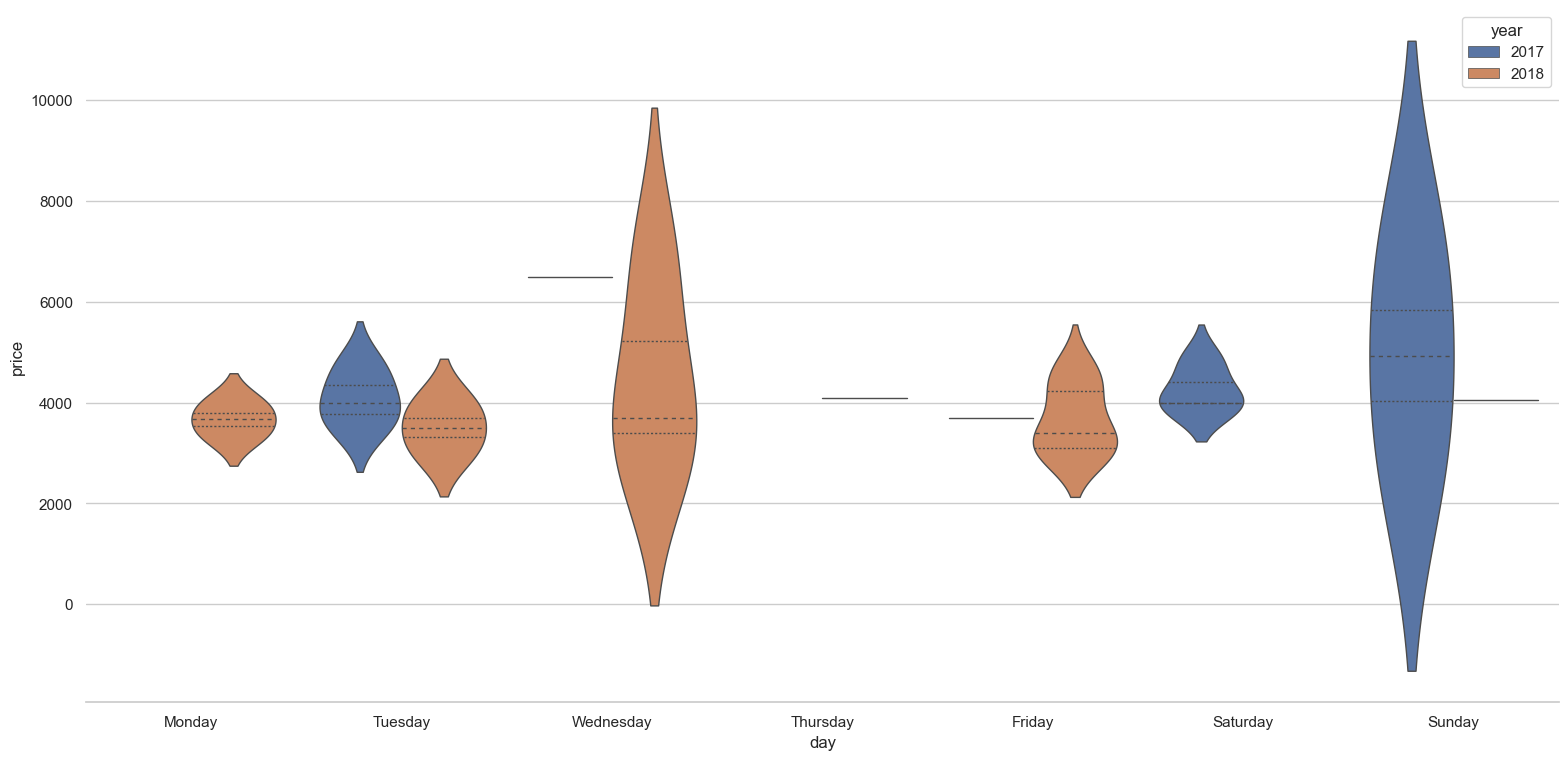

In [236]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(19,9))
sns.violinplot(data=price_more_3000, x="day", y="price", hue="year",inner="quart", linewidth=1,)
sns.despine(left=True)

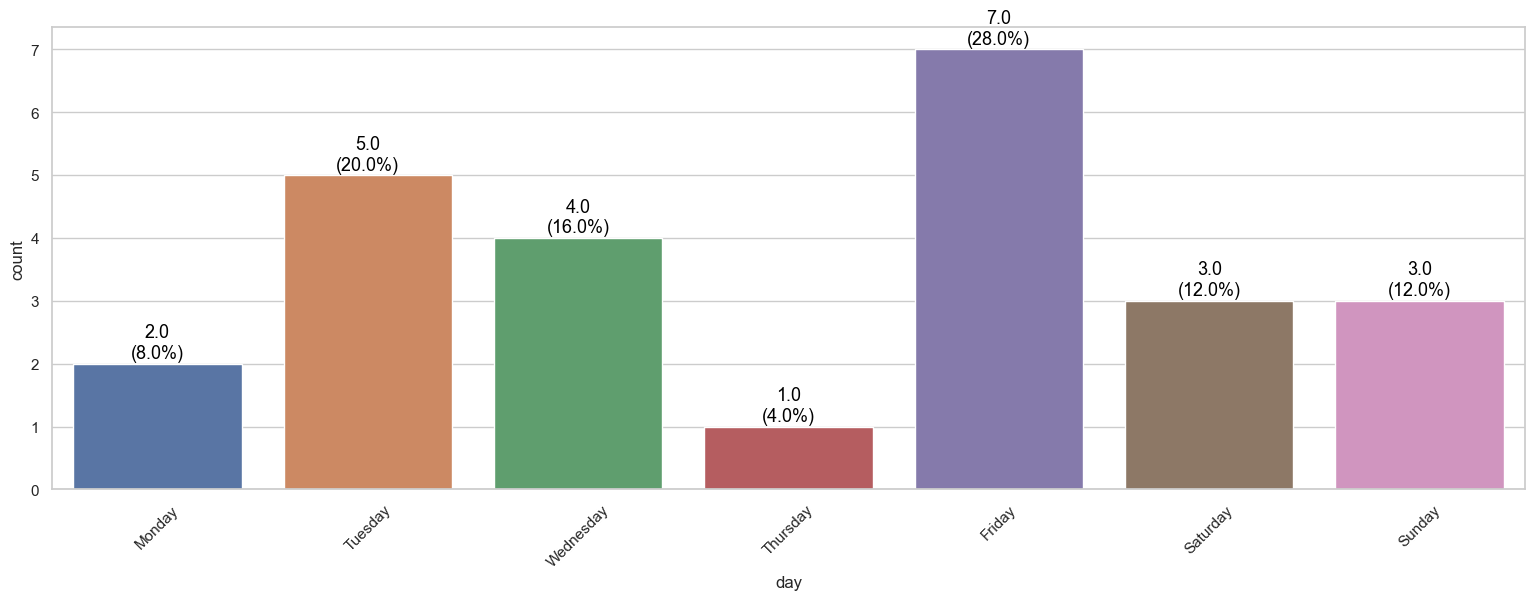

In [237]:
fig, ax = plt.subplots(figsize =(19,6))
customer_orders = customer_orders.sort_values(by="Sum_orders_by_client")
Advanced_CountPlot(data=price_more_3000, x='day', axis=ax)
plt.xticks(rotation=45)
plt.show()

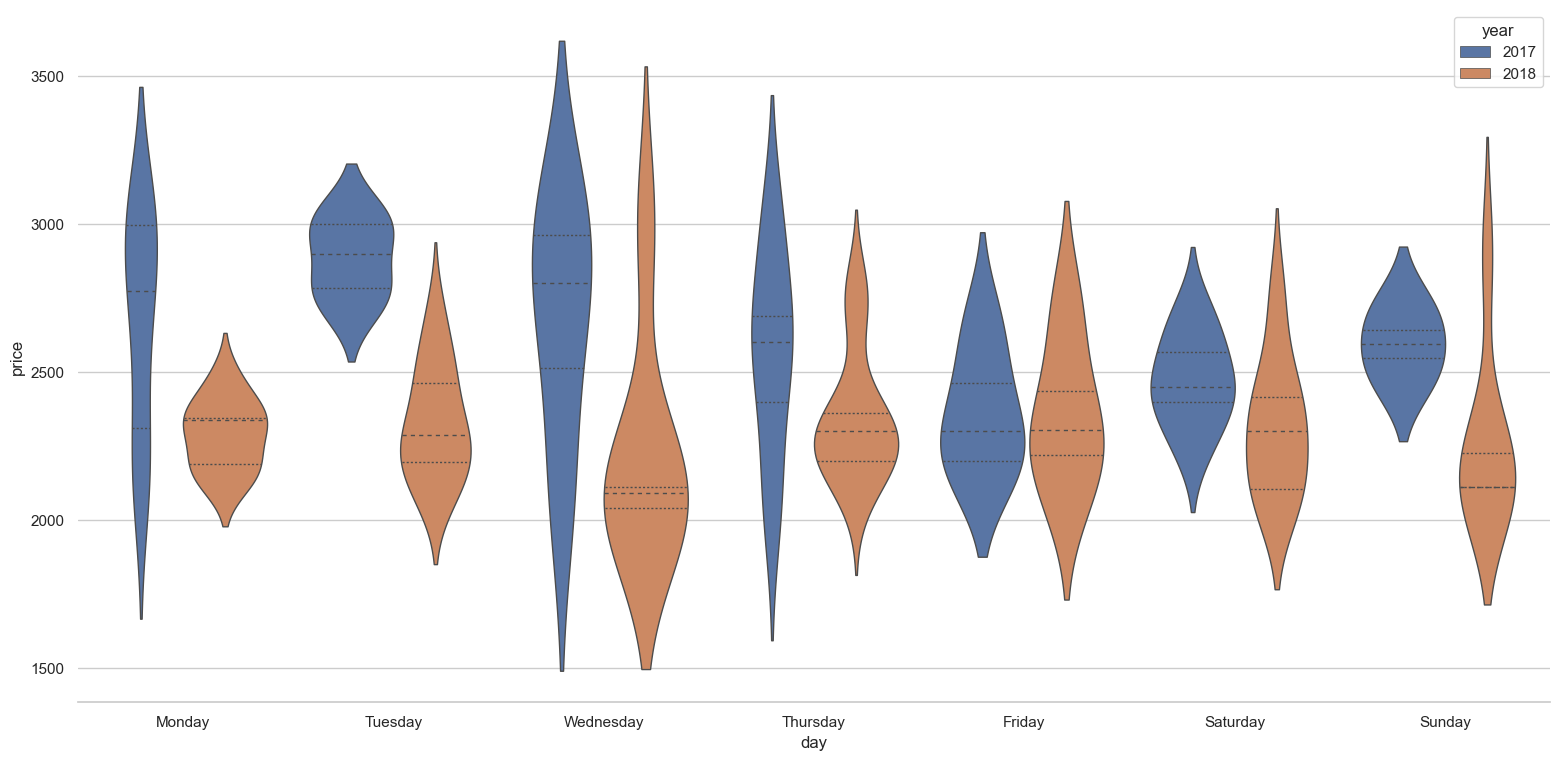

In [238]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(19,9))
sns.violinplot(data=price_2000_3000, x="day", y="price", hue="year",inner="quart", linewidth=1,)
sns.despine(left=True)

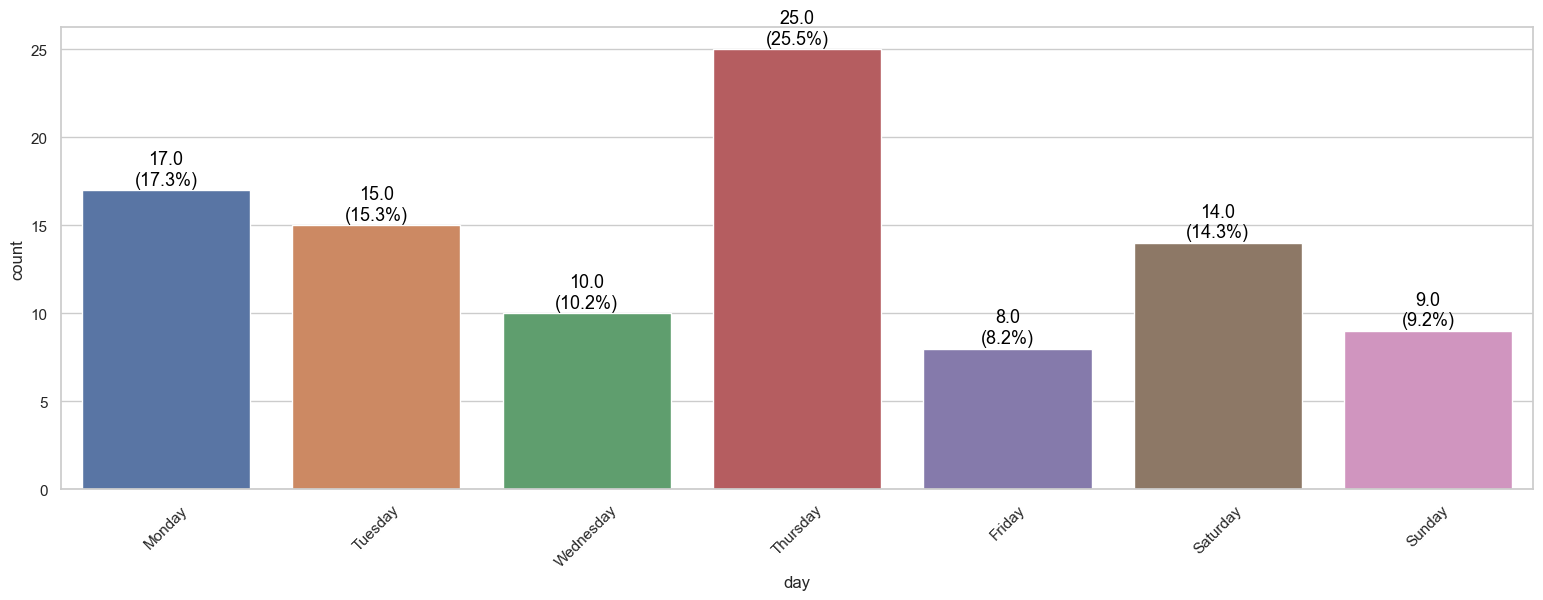

In [239]:
fig, ax = plt.subplots(figsize =(19,6))
customer_orders = customer_orders.sort_values(by="Sum_orders_by_client")
Advanced_CountPlot(data=price_2000_3000, x='day', axis=ax)
plt.xticks(rotation=45)
plt.show()

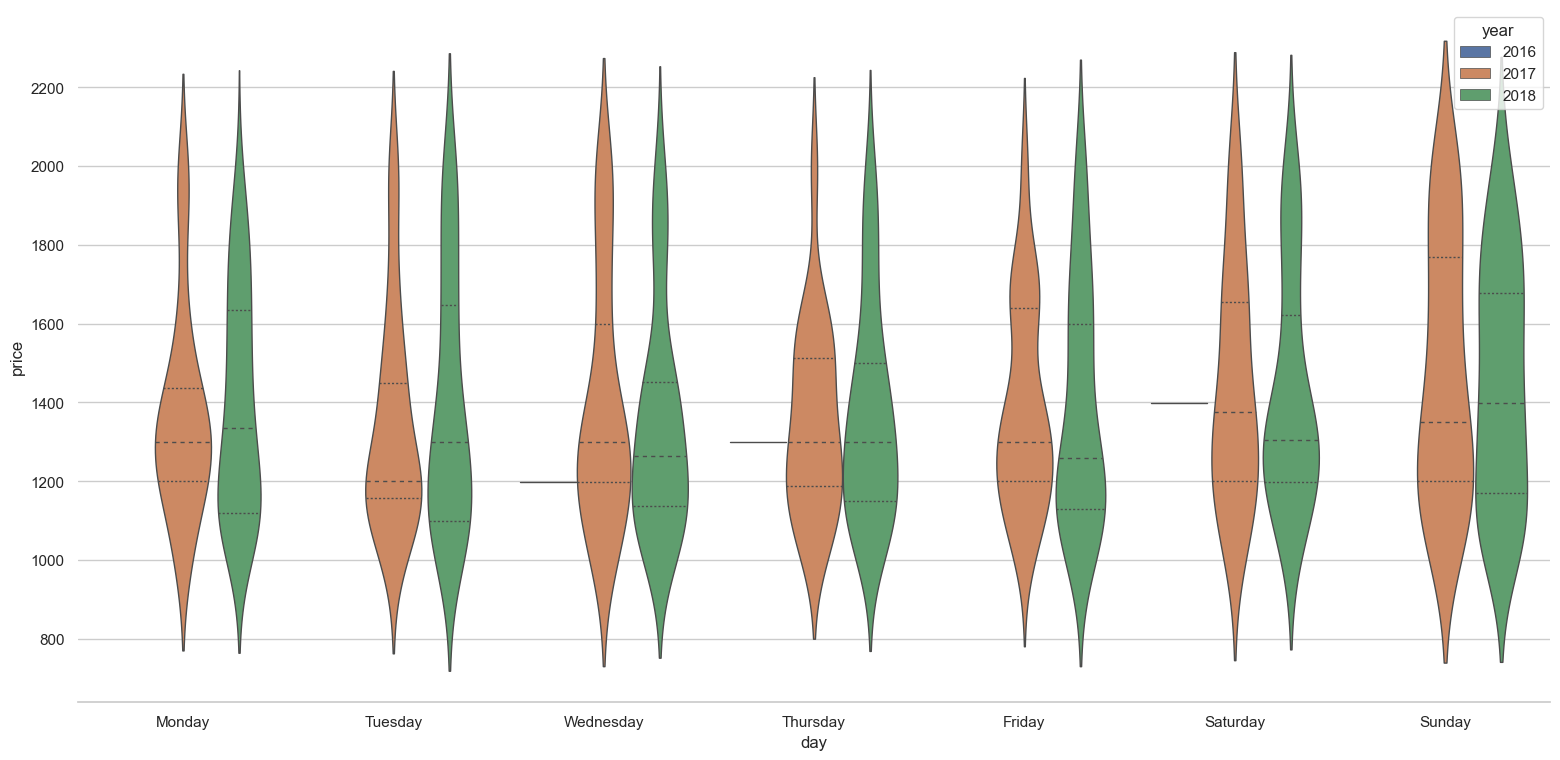

In [240]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(19,9))
sns.violinplot(data=price_1000_2000, x="day", y="price", hue="year",inner="quart", linewidth=1,)
sns.despine(left=True)

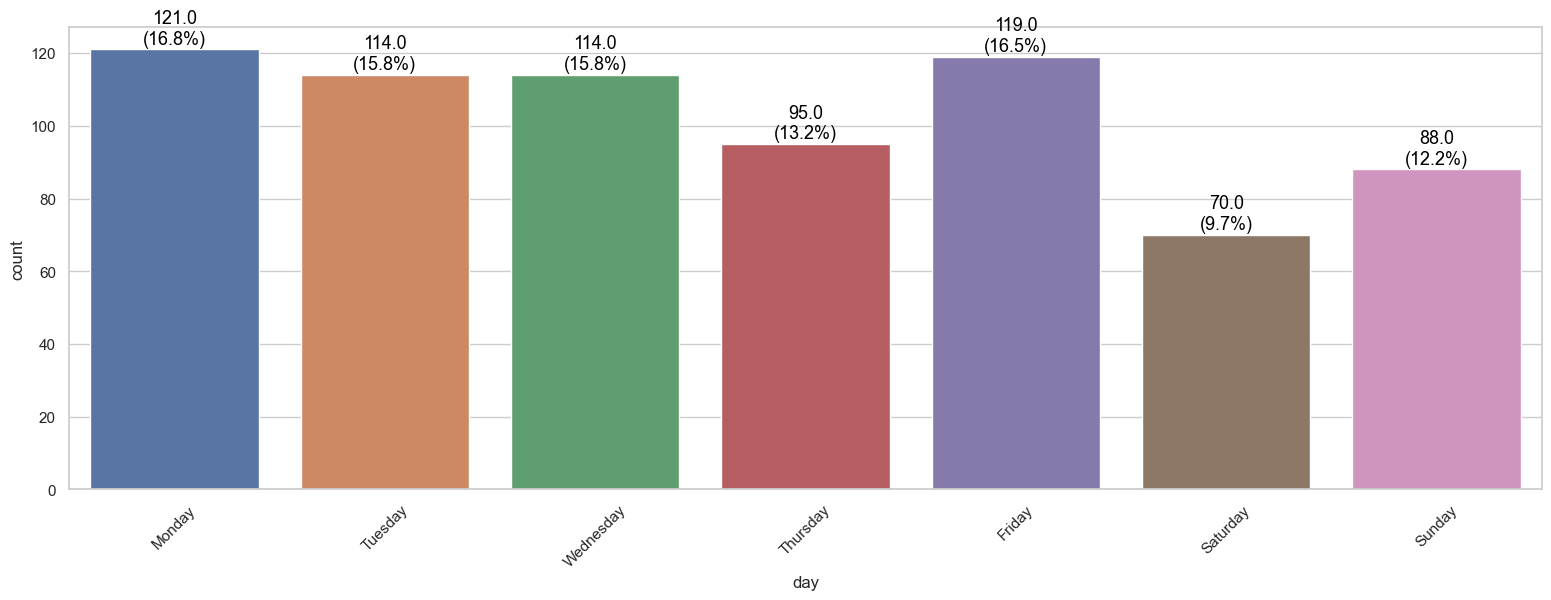

In [241]:
fig, ax = plt.subplots(figsize =(19,6))
customer_orders = customer_orders.sort_values(by="Sum_orders_by_client")
Advanced_CountPlot(data=price_1000_2000, x='day', axis=ax)
plt.xticks(rotation=45)
plt.show()

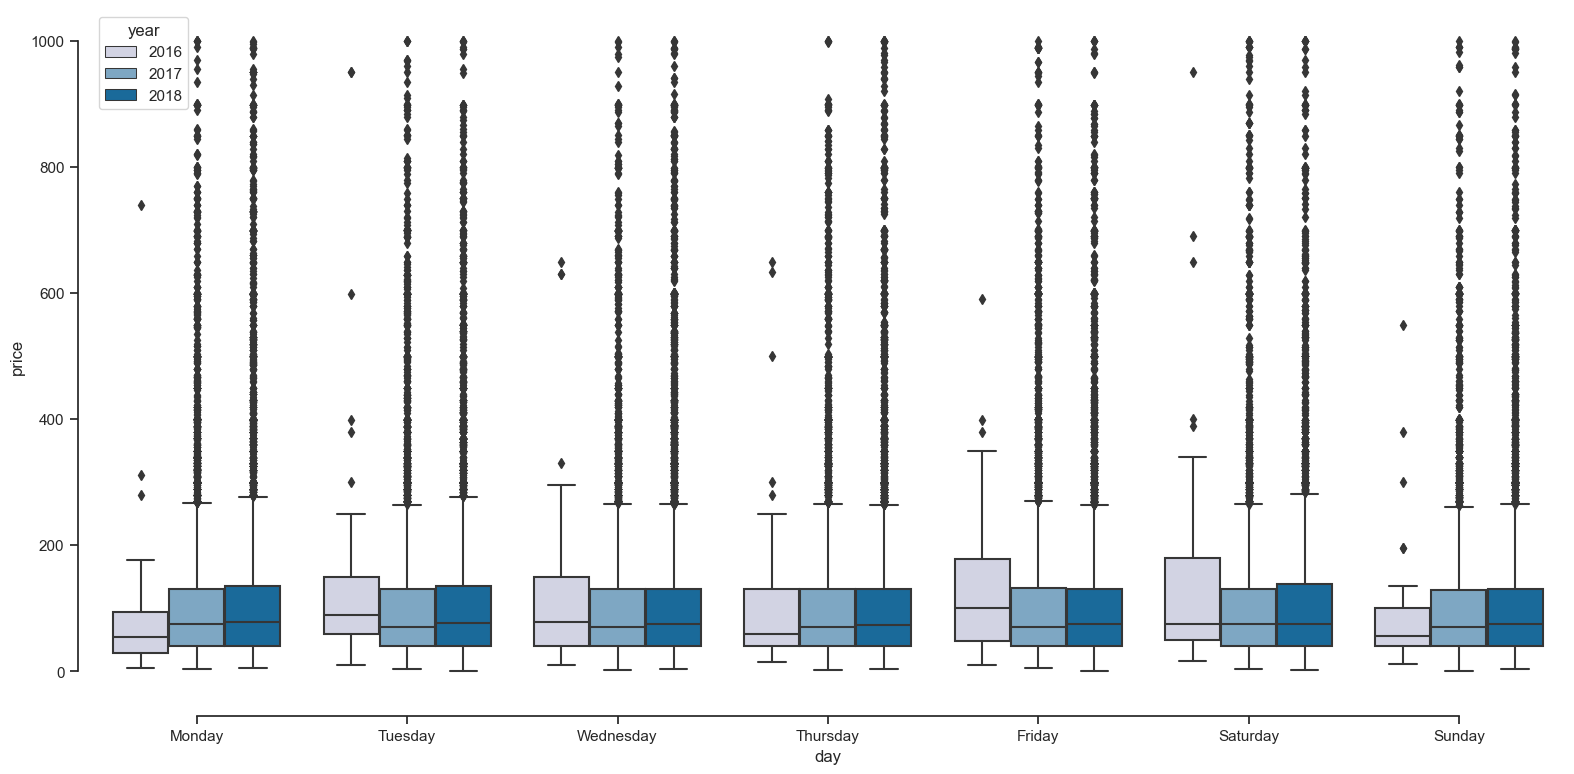

In [242]:
sns.set_theme(style="ticks", palette="pastel")

plt.figure(figsize=(19,9))
sns.boxplot(x="day", y="price",
            hue="year", palette="PuBu",
            data=price_0_1000)
sns.despine(offset=10, trim=True)

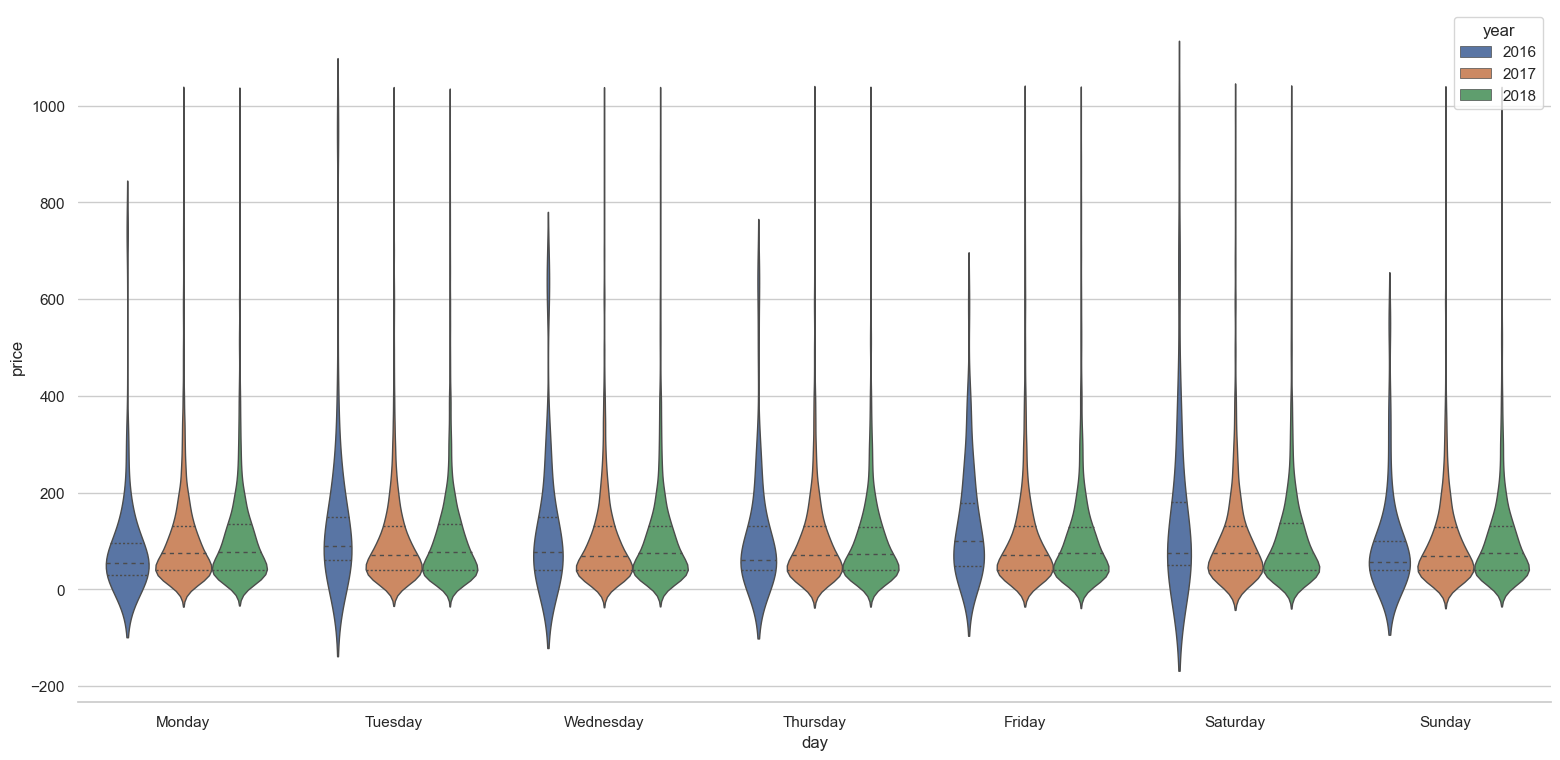

In [243]:
sns.set_theme(style="whitegrid")

tips = sns.load_dataset("tips")
plt.figure(figsize=(19,9))
sns.violinplot(data=price_0_1000, x="day", y="price", hue="year",inner="quart", linewidth=1,
              )
sns.despine(left=True)

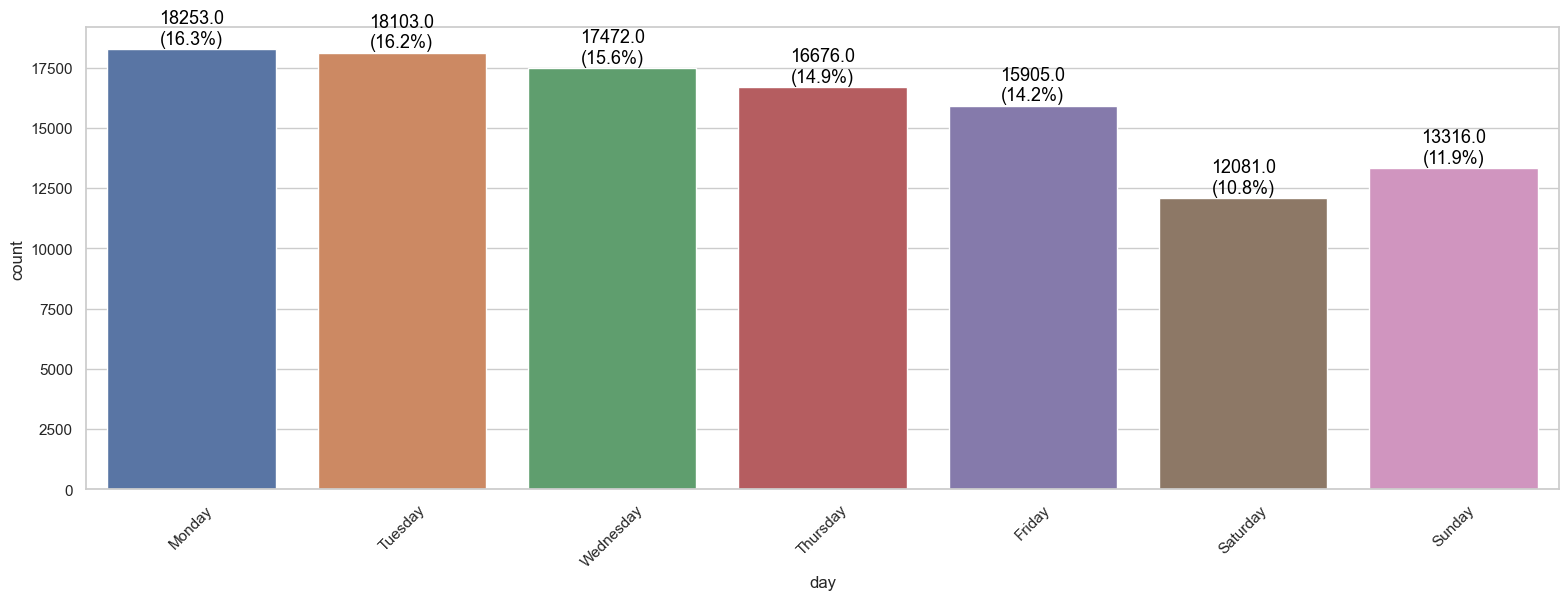

In [244]:
fig, ax = plt.subplots(figsize =(19,6))
customer_orders = customer_orders.sort_values(by="Sum_orders_by_client")
Advanced_CountPlot(data=price_0_1000, x='day', axis=ax)
plt.xticks(rotation=45)
plt.show()

## Répartition géographique des clients :

In [ ]:
import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.express as px

In [ ]:
df_iso_alpha = pd.read_csv("iso_map_formats_internationaux.csv")

In [ ]:
df_iso_alpha

In [ ]:
customer_orders.columns

In [ ]:
customer_orders.customer_state.unique()

In [ ]:
geolocation_data.geolocation_state.unique()

In [ ]:
geolocation_data.geolocation_city.unique()

In [ ]:
geolocation_data.columns

In [ ]:
customer_orders_geo = customer_orders.merge(df_iso_alpha, left_on = "customer_state", right_on = "ISO 3166-1 alpha-2", how = "inner")

In [ ]:
customer_orders_geo2 = customer_orders.merge(df_iso_alpha, left_on = "customer_state", right_on = "ISO 3166-1 alpha-2", how = "inner")
customer_orders_geo2 = customer_orders_geo.groupby("customer_state").agg({'customer_id':'count', 'Pays':'unique'})

In [ ]:
customer_orders_geo = customer_orders_geo.groupby("customer_state").agg({'customer_id':'count',
                                                                         'Pays':'unique',
                                                                         'ISO 3166-1 alpha-3':'unique',
                                                                        })
customer_orders_geo["Pays"] = customer_orders_geo["Pays"].astype(str)
customer_orders_geo["ISO 3166-1 alpha-3"] = customer_orders_geo["ISO 3166-1 alpha-3"].astype(str)
customer_orders_geo["Pays"] = customer_orders_geo["Pays"].str.replace("'","")
customer_orders_geo["Pays"] = customer_orders_geo["Pays"].str.replace("[","")
customer_orders_geo["Pays"] = customer_orders_geo["Pays"].str.replace("]","")
customer_orders_geo["ISO 3166-1 alpha-3"] = customer_orders_geo["ISO 3166-1 alpha-3"].str.replace("'","")
customer_orders_geo["ISO 3166-1 alpha-3"] = customer_orders_geo["ISO 3166-1 alpha-3"].str.replace("[","")
customer_orders_geo["ISO 3166-1 alpha-3"] = customer_orders_geo["ISO 3166-1 alpha-3"].str.replace("]","")

In [ ]:
customer_orders_geo

In [ ]:
fig = px.scatter_geo(customer_orders_geo,
                     locations="ISO 3166-1 alpha-3",
                     color="Pays",
                     hover_name="Pays",
                     size="customer_id",
                     #animation_frame="year",
                     projection="natural earth",
                    )
fig.show()

In [ ]:
customers_data

In [ ]:
import pandas as pd
import plotly.express as px

# Charger les données des `customer_id` avec les informations de géolocalisation


# Agréger les données par pays et compter le nombre de `customer_id`
customer_count_by_country = customers_data.groupby('customer_city').size().reset_index(name='customer_count')

# Créer une carte choroplèthe avec Plotly Express
fig = px.choropleth(customer_count_by_country, locations='customer_city', locationmode='city names',
                    color='customer_count', hover_name='customer_city', title='Répartition des Customer_ID par pays')

# Afficher la carte
fig.show()

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.bluemarble()
plt.show()

KeyError: 'YearMonth'

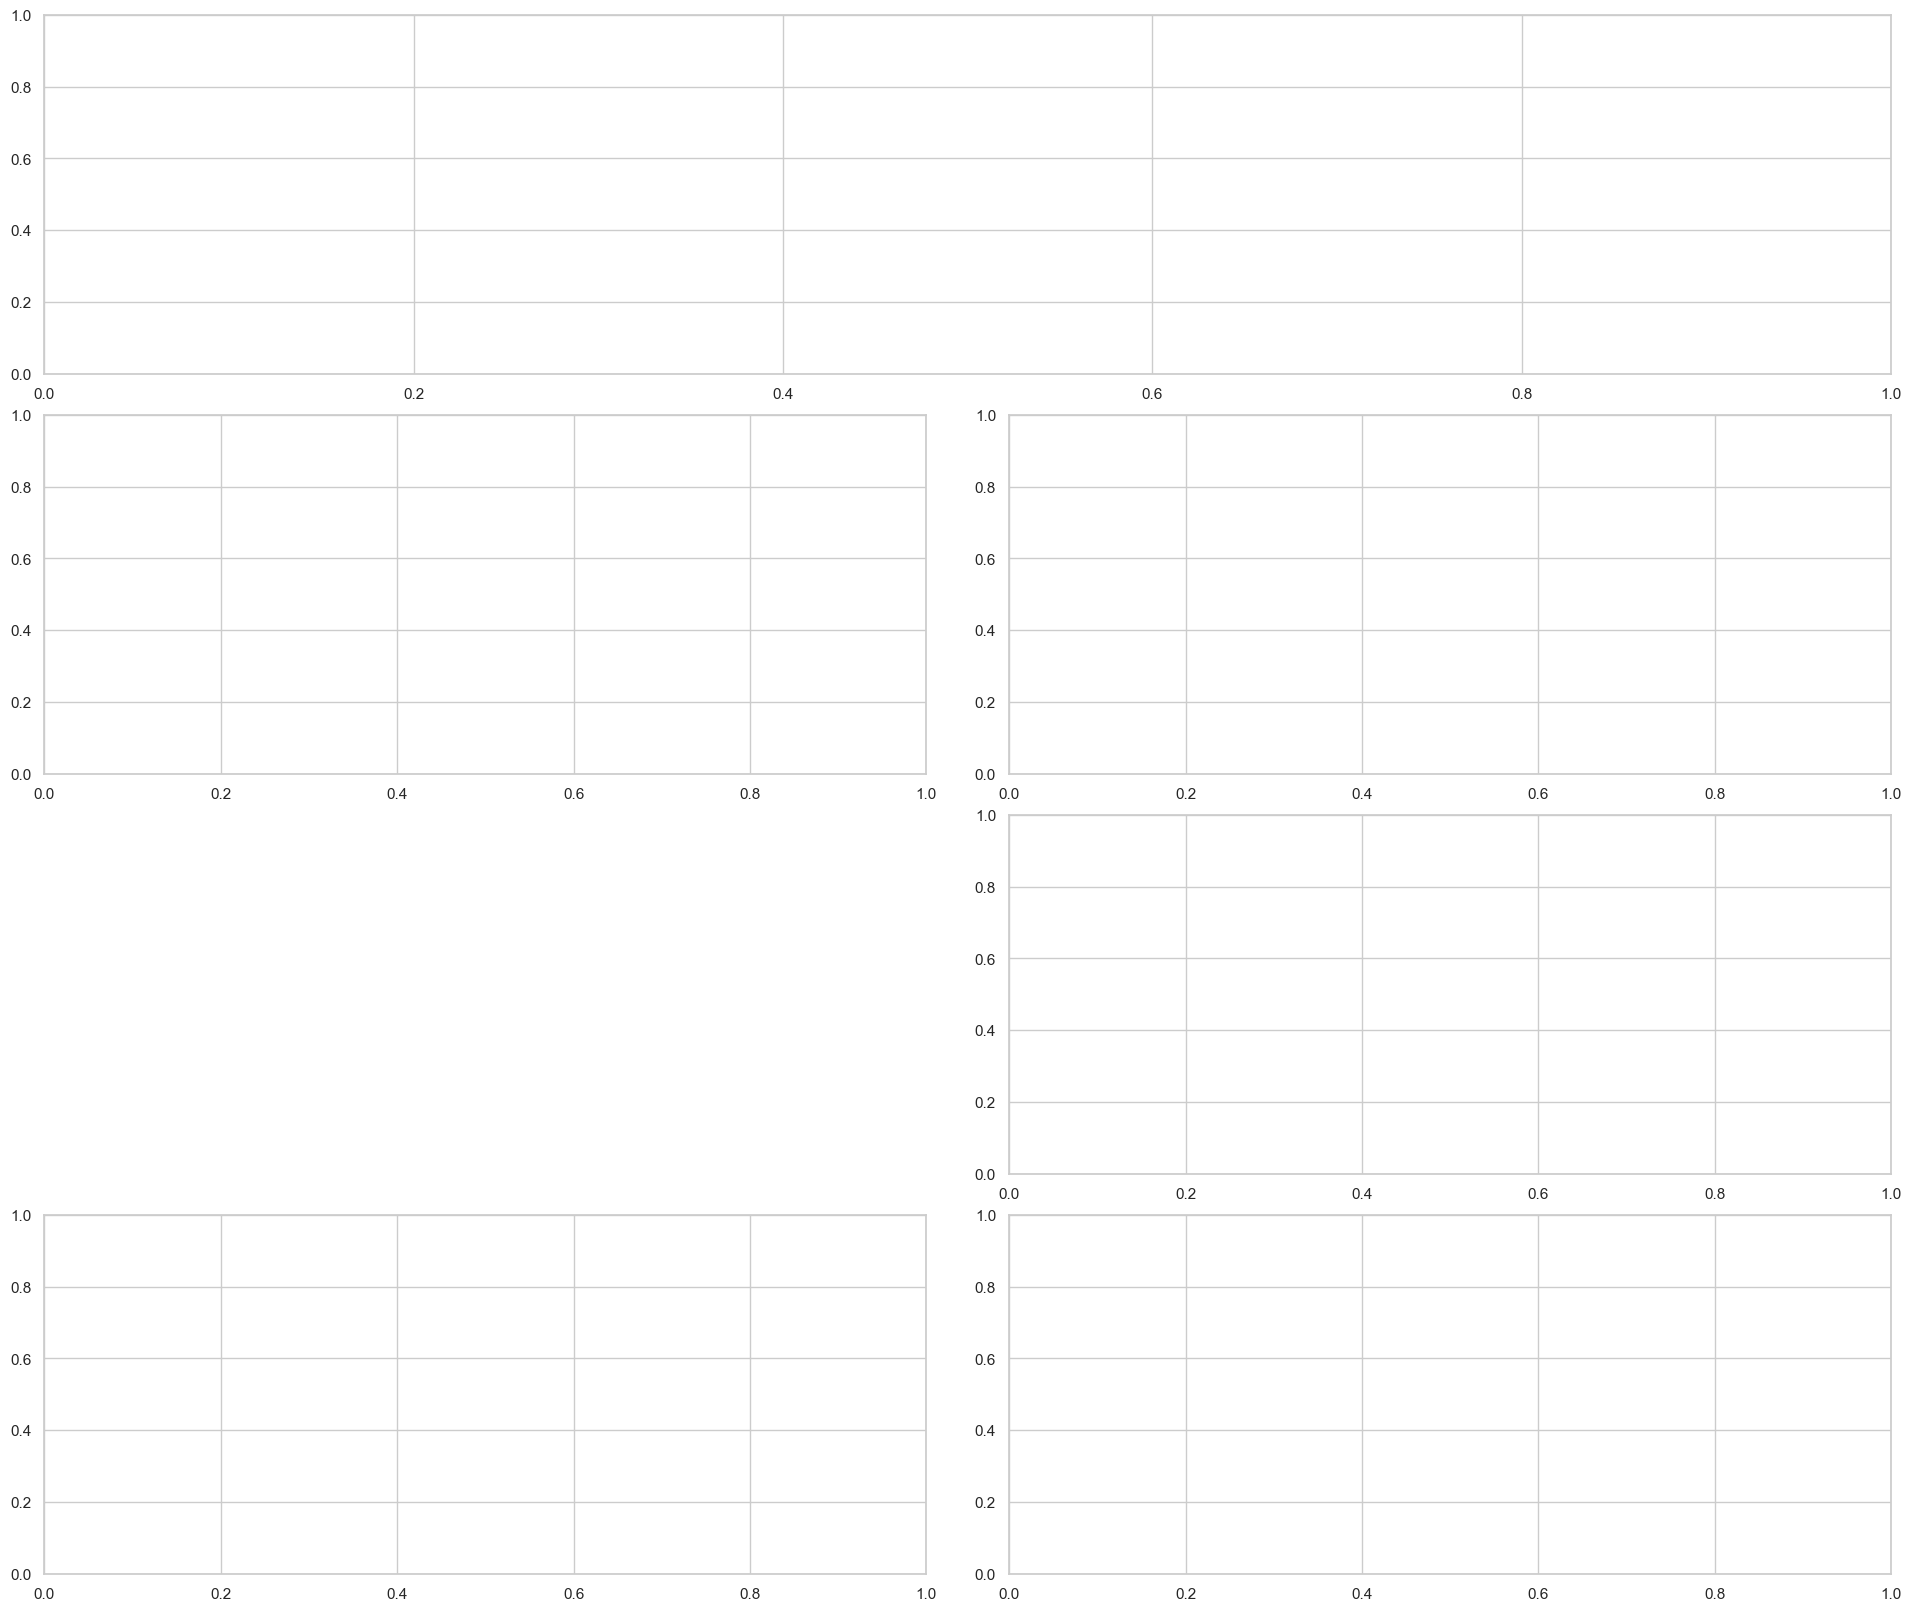

In [249]:
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)

fig = plt.figure(constrained_layout=True, figsize=(19, 16))

# Axis definition
gs = GridSpec(4, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 1])
ax5 = fig.add_subplot(gs[3, 0])
ax6 = fig.add_subplot(gs[3, 1])

# Lineplot - Evolution of e-commerce orders along time 
sns.lineplot(data=df_ORDERS_PRODUCTS_et_customers_data_et_sellers_data["YearMonth"].value_counts().sort_index(), ax=ax1, 
             color='darkslateblue', linewidth=2)
ax1.annotate(f'Highest orders \nreceived', (13, 7500), xytext=(-75, -25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
ax1.annotate(f'Noise on data \n(huge decrease)', (23, 0), xytext=(48, 25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
#gs.spines(ax1, right_border=False)  
for tick in ax1.get_xticklabels():
    ax1.set_title('Evolution of Total Orders in Brazilian E-Commerce', size=14, color='dimgrey')

# Barchart - Total of orders by day of week
Advanced_CountPlot(df_ORDERS_PRODUCTS_et_customers_data_et_sellers_data, x='day', axis=ax2)
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticklabels(weekday_label)
ax2.set_title('Total Orders by Day of Week', size=14, color='dimgrey', pad=20)

# Barchart - Total of orders by time of the day
#day_color_list = ['darkslateblue', 'deepskyblue', 'darkorange']
Advanced_CountPlot(df_ORDERS_PRODUCTS_et_customers_data_et_sellers_data, x='year', axis=ax3)
ax3.set_title('Total Orders by Time of the Day',
              #size=14,
              color='dimgrey',
              #pad=20
             )

plt.tight_layout()
plt.show()

# 👨‍💻 Approche par le transformer CHATGPT 3-5 :

---

# Étude pour 5 clusters de catégories de produits :

---

---

# Étude pour 10 clusters de catégories de produits : 🚀

---

In [ ]:
new_df = pd.get_dummies(df_ORDERS_PRODUCTS_CUSTOMERS_SELLERS["customer_id"])
#"customer_id"

In [ ]:
new_df = new_df.merge(df_ORDERS_PRODUCTS_CUSTOMERS_SELLERS["customer_id"], left_index = True, right_index = True, how = "inner")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
corr_matrix = new_df.corr()

# Créer le graphique de corrélation
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Afficher le graphique
plt.title('Matrice de corrélation')
plt.show()

---

# 👨‍🚀👩‍🚀 Par une approche de logique naturelle une sègmentation en 10 catégories paraît très pertinente.

---